In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats,statsmodels.api as sm
from ydata_profiling import ProfileReport
import math
from scipy.stats import shapiro, spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Carregando os dados:

In [2]:
dataset = "Vehicle Price.csv"
df = pd.read_csv(dataset, sep=",")

## Conhecendo nosso dataset:

In [3]:
# Quantidade de linhas
df.shape[0]

1002

In [4]:
# Quantidade de colunas 
df.shape[1]

17

In [5]:
# Colunas
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [6]:
# Quantidade de registros 
df.shape[0] * df.shape[1]

17034

In [7]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [8]:
# Exibindo 5 primeiras linhas
df.head(5)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [9]:
# Exibindo as 5 ultimas linhas
df.tail(5)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


## Bom se trata de um dataset de carros com suas informações e seu respectivo preço. Nossas colunas representam.
### name: Nome completo do veiculo, marca, modelo e o acapamento
### description: Breve descrição do veiculo
### make: A marca do veiculo
### model: O modelo do veiculo
### year: Ano de fabricação do veiculo
### price: Preço do veiculo em dolár
### engine: Detalhes sobre o motor
### cylinders: O número de cilindradas do motor
### fuel: Tipo de combustível do veiculo
### mileage: Quilometragem do veiculo (em milhas)
### transmission: Tipo de transmissão do veiculo
### trim: Acapamento do veiculo (pacote)
### body: Carroceria do veiculo
### doors: Quantidade de portas do veiculo
### exterior_color: Cor exterior do veiculo
### interior_color: Cor interor do veiculo
### drivetrain: O trem de força do veiculo

# Limpeza e Transformação:

In [10]:
# Vamos excluir as colunas "description" pois não representa uma coluna de valor para a nossa analise
df.drop(columns = "description", inplace=True)

In [11]:
# Verificando tipos de dados das colunas
df.dtypes

name               object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [12]:
# Informações mais completas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   make            1002 non-null   object 
 2   model           1002 non-null   object 
 3   year            1002 non-null   int64  
 4   price           979 non-null    float64
 5   engine          1000 non-null   object 
 6   cylinders       897 non-null    float64
 7   fuel            995 non-null    object 
 8   mileage         968 non-null    float64
 9   transmission    1000 non-null   object 
 10  trim            1001 non-null   object 
 11  body            999 non-null    object 
 12  doors           995 non-null    float64
 13  exterior_color  997 non-null    object 
 14  interior_color  964 non-null    object 
 15  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 125.4+ KB


Podemos ver que temos registros nulos.

In [13]:
df.isnull().sum().sum()

227

Temos 227 registros nulos

In [14]:
# Visualizando as linhas com registros nulos
df[df.isnull().any(axis=1)]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
27,2024 Chrysler Pacifica Touring-L,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,2024 Kia EV6 GT,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,2024 Ford Mustang Mach-E Premium,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2024 Kia EV6 Wind,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive
967,2024 Kia Sportage X-Line,Kia,Sportage,2024,35795.0,16V PDI DOHC,4.0,Gasoline,41.0,8-Speed Automatic,X-Line,SUV,4.0,Wolf Gray,NaN,All-wheel Drive
971,2024 Kia Sportage X-Line,Kia,Sportage,2024,35400.0,16V PDI DOHC,4.0,Gasoline,141.0,8-Speed Automatic,X-Line,SUV,4.0,Jungle Green,NaN,All-wheel Drive
978,2024 Kia EV6 Wind,Kia,EV6,2024,43439.0,c,NaN,Electric,14.0,Automatic,Wind,SUV,4.0,Aurora Black Pearl,Black,All-wheel Drive


Podemos ver também que além dos registros nulos, temos os registros sujos que não representa informação nenhuma ou seja pode ser considerado registro nulo também.
Exemplo: Engine tem um registro de "c", o que isso significa? Não é uma informação do motor, portanto consideramos registro nulo (sujo)

In [15]:
df.loc[[978,14],]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
978,2024 Kia EV6 Wind,Kia,EV6,2024,43439.0,c,NaN,Electric,14.0,Automatic,Wind,SUV,4.0,Aurora Black Pearl,Black,All-wheel Drive
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive


Vamos verificar se temos mais registros sujos (em todas as colunas)

In [16]:
# Coluna Price
df[df["price"].isnull()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
248,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,16V MPFI OHV,8.0,Gasoline,28.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive
283,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Velvet Red Pearlcoat,Black,Rear-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
417,2024 RAM 3500 Tradesman,RAM,3500,2024,NaN,16V MPFI OHV,8.0,Gasoline,98.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive
434,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Gloss Black,Black,Rear-wheel Drive
443,2024 Jeep Compass Limited,Jeep,Compass,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,0.0,8-Speed Automatic,Limited,SUV,4.0,Metallic,NaN,Four-wheel Drive
500,2024 Ford Edge SE,Ford,Edge,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,823.0,8-Speed Automatic,SE,SUV,4.0,Oxford White,Ebony,All-wheel Drive
506,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,24V MPFI DOHC,6.0,Gasoline,21.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive


In [17]:
# Coluna Engine
df[df["engine"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [18]:
# Coluna Cylinders       
df[df["cylinders"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,2024 Kia EV6 GT,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,2024 Ford Mustang Mach-E Premium,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
49,2024 Hyundai IONIQ 5 SE Standard Range,Hyundai,IONIQ 5,2024,44195.0,c,NaN,Electric,14.0,1-Speed Automatic,SE Standard Range,SUV,4.0,Atlas,Gray,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2024 BMW i7 M70,BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
941,2024 Hyundai IONIQ 5 SE,Hyundai,IONIQ 5,2024,38201.0,c,NaN,Electric,12.0,Automatic,SE,SUV,4.0,Teal,Gray,Rear-wheel Drive
944,2024 Kia EV6 Wind,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive


In [19]:
# Coluna Fuel
df[df["fuel"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [20]:
# Coluna Mileage
df[df["mileage"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
27,2024 Chrysler Pacifica Touring-L,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive
47,2024 Subaru Outback Wilderness,Subaru,Outback,2024,44354.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,Automatic CVT,Wilderness,SUV,4.0,Magnetite,Gray,All-wheel Drive
63,2024 Jeep Grand Cherokee L Limited,Jeep,Grand Cherokee L,2024,51360.0,24V MPFI DOHC,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Bright White Clearcoat,Beige / Black,Rear-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
84,2024 Jeep Grand Cherokee L Limited,Jeep,Grand Cherokee L,2024,49390.0,OHV,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Diamond Black,Global Black,Four-wheel Drive
87,2024 Buick Envista Avenir,Buick,Envista,2024,31805.0,12V GDI DOHC Turbo,3.0,Gasoline,NaN,6-Speed Automatic,Avenir,SUV,4.0,Ocean Blue Metallic,Ebony,Front-wheel Drive
93,2024 Ford Ranger XL,Ford,Ranger,2024,38740.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,10-Speed Automatic,XL,Pickup Truck,4.0,Carbonized Gray Metallic,Ebony,Four-wheel Drive
177,2024 Lincoln Nautilus Reserve,Lincoln,Nautilus,2024,64370.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,8-Speed Automatic,Reserve,SUV,4.0,Gray Metallic,Black Onyx,All-wheel Drive
217,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,2024,50755.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive


In [21]:
# Coluna transmission
df[df["transmission"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
725,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive


In [22]:
# Coluna Trim 
df[df["trim"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [23]:
# Coluna Body
df[df["body"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [24]:
# Coluna Doors
df[df["doors"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [25]:
# Coluna Exterior_color 
df[df["exterior_color"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
117,2024 Jeep Wrangler 4-Door Sahara 4x4,Jeep,Wrangler,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,114850.0,c,NaN,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,NaN,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,NaN,NaN,Rear-wheel Drive


In [26]:
# Coluna Interior_color  
df[df["interior_color"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
44,2024 Acura MDX Advance,Acura,MDX,2024,65595.0,24V GDI SOHC,6.0,Gasoline,16.0,10-Speed Automatic,Advance,SUV,4.0,Gray,NaN,All-wheel Drive
48,2024 Volkswagen Atlas Cross Sport 2.0T SEL,Volkswagen,Atlas Cross Sport,2024,51721.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,11.0,8-speed automatic,2.0T SEL,SUV,4.0,Silver Mist Metallic,NaN,All-wheel Drive
71,2024 Acura MDX Base,Acura,MDX,2024,51645.0,24V GDI SOHC,6.0,Gasoline,5.0,10-Speed Automatic,Base,SUV,4.0,Black,NaN,Front-wheel Drive
77,2024 Acura MDX Base,Acura,MDX,2024,51645.0,24V GDI SOHC,6.0,Gasoline,5.0,10-Speed Automatic,Base,SUV,4.0,White,NaN,Front-wheel Drive
134,2024 GMC Savana 2500 Work Van,GMC,Savana 2500,2024,44595.0,"6 gasoline direct injection, variable valve co...",6.0,Gasoline,3.0,Automatic,Work Van,Cargo Van,3.0,Summit White,NaN,Rear-wheel Drive
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
161,2024 Acura MDX Technology,Acura,MDX,2024,56155.0,24V GDI SOHC,6.0,Gasoline,3.0,10-Speed Automatic,Technology,SUV,4.0,White,NaN,All-wheel Drive
169,2024 GMC Savana 2500 Work Van,GMC,Savana 2500,2024,44620.0,"6 gasoline direct injection, variable valve co...",6.0,Gasoline,12.0,Automatic,Work Van,Cargo Van,3.0,SILVER,NaN,Rear-wheel Drive
245,2024 Acura MDX Base,Acura,MDX,2024,52950.0,24V GDI SOHC,6.0,Gasoline,3.0,10-Speed Automatic,Base,SUV,4.0,Gray,NaN,All-wheel Drive
286,2024 Acura MDX Technology,Acura,MDX,2024,56345.0,24V GDI SOHC,6.0,Gasoline,5.0,10-Speed Automatic,Technology,SUV,4.0,Gray,NaN,Front-wheel Drive


### Certo vamos verificar se temos linhas duplicadas e remover, pois pode ajudar a diminuir registros nulos

In [27]:
df[df.duplicated()].shape

(31, 16)

### Certo temos 31 linhas duplicadas

In [28]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

In [29]:
df[df.duplicated()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [30]:
df.isnull().sum().sum()

223

### Certo diminuimos um pouco o número de registros nulos
### Vamos agora antes de limpar os registros nulos, tentar achar registros sujos (que não tem informação), em colunas com tipo string

In [31]:
linhas_com_valores_sujos = []

In [32]:
for coluna in df.columns:
    if df[coluna].dtype == "object":
        registros_suspeitos = df[df[coluna].str.len() <= 4].copy()
        try:
            registro_sujo = registros_suspeitos[~registros_suspeitos.isnull().any(axis=1)].index[0]
            linhas_com_valores_sujos.append(registro_sujo)
        except:
            print(f"Coluna {coluna} sem registro sujo")

Coluna name sem registro sujo
Coluna fuel sem registro sujo
Coluna drivetrain sem registro sujo


### Utilizamos de uma técnica de filtar valores string que sejam menor que 4 caracteres, que podem indicar um registro sujo, fizemos em todas as colunas com tipo "object"

In [33]:
linhas_com_valores_sujos

[0, 4, 1, 69, 6, 0, 18, 5]

In [34]:
df.loc[linhas_com_valores_sujos,]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
69,2024 Nissan Kicks SV,Nissan,Kicks,2024,24500.0,"4 DOHC, CVTCS variable valve control, regular ...",4.0,Gasoline,10.0,CVT,SV,SUV,4.0,Aspen White Tricoat,Charcoal,Front-wheel Drive
6,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
18,2024 Volkswagen Taos 1.5T SE,Volkswagen,Taos,2024,32751.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,25.0,7-Speed DSG Automatic with Tiptronic,1.5T SE,SUV,4.0,Blue,Black Cloud,All-wheel Drive
5,2024 Nissan Murano Platinum,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive


### Vamos fazer a mesma técnica com colunas númerica, portando colocando para filtar valores que são menores que 0

In [35]:
for coluna in df.columns:
    if df[coluna].dtype == "float64" or df[coluna].dtype == "int64":
        registros_suspeitos = df[df[coluna] <= 0].copy()
        try:
            registro_sujo = registros_suspeitos[~registros_suspeitos.isnull().any(axis=1)].index[0]
            linhas_com_valores_sujos.append(registro_sujo)
        except:
            print(f"Coluna {coluna} sem registro sujo")

Coluna year sem registro sujo
Coluna doors sem registro sujo


In [36]:
df.loc[linhas_com_valores_sujos,]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
69,2024 Nissan Kicks SV,Nissan,Kicks,2024,24500.0,"4 DOHC, CVTCS variable valve control, regular ...",4.0,Gasoline,10.0,CVT,SV,SUV,4.0,Aspen White Tricoat,Charcoal,Front-wheel Drive
6,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
18,2024 Volkswagen Taos 1.5T SE,Volkswagen,Taos,2024,32751.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,25.0,7-Speed DSG Automatic with Tiptronic,1.5T SE,SUV,4.0,Blue,Black Cloud,All-wheel Drive
5,2024 Nissan Murano Platinum,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
94,2024 Audi SQ5 Premium Plus,Audi,SQ5,2024,0.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive
925,2023 Volvo C40 Recharge Pure Electric Twin Ult...,Volvo,C40 Recharge Pure Electric,2023,62240.0,c Motor,0.0,Electric,0.0,Automatic,Twin Ultimate,SUV,4.0,Gray,Charcoal,All-wheel Drive


### Certo as linhas que estão com registros sujos é a 94 que estão com o preço do carro como 0 e a 925 que o engine não representa uma informação. Então vamos remover essas linhas

In [37]:
df.drop([94,925],inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            969 non-null    object 
 1   make            969 non-null    object 
 2   model           969 non-null    object 
 3   year            969 non-null    int64  
 4   price           946 non-null    float64
 5   engine          967 non-null    object 
 6   cylinders       866 non-null    float64
 7   fuel            962 non-null    object 
 8   mileage         937 non-null    float64
 9   transmission    967 non-null    object 
 10  trim            968 non-null    object 
 11  body            966 non-null    object 
 12  doors           962 non-null    float64
 13  exterior_color  964 non-null    object 
 14  interior_color  931 non-null    object 
 15  drivetrain      969 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 128.7+ KB


### Certo agora vamos limpar os valores nulos
### Vamos tentar preencher alguns registros com informações de veiculos similares

In [39]:
df.isnull().sum()

name                0
make                0
model               0
year                0
price              23
engine              2
cylinders         103
fuel                7
mileage            32
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [40]:
df[df["engine"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [41]:
df[df["model"] == "CR-V Hybrid"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
109,2024 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,2024 Honda CR-V Hybrid Sport,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [42]:
df.loc[614,"engine"] = "16V GDI DOHC Hybrid"
df.loc[614,"doors"] = 4.0

In [43]:
df[df["model"] == "Wagoneer"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
6,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
92,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,60555.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Rear-wheel Drive
234,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,65928.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
250,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
261,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive
399,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,75888.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
650,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,84935.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series II,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
686,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,77473.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,14.0,8-Speed Automatic,Base,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


In [44]:
df.loc[803, "engine"] = "24V GDI DOHC Twin Turbo"

In [45]:
df.isnull().sum()

name                0
make                0
model               0
year                0
price              23
engine              0
cylinders         103
fuel                7
mileage            32
transmission        2
trim                1
body                3
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [46]:
df[df["fuel"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [47]:
df[df["model"] == "Prologue"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive


In [48]:
df[df["model"] == "Solterra"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive


In [49]:
df[df["model"] == "Equinox EV"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive


In [50]:
df[df["model"] == "I-PACE"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [51]:
df[df["transmission"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
725,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive


In [52]:
df[df["model"]=="EQS 450"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
146,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,109545.0,c,NaN,Electric,10.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,Black,Black,All-wheel Drive
253,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,110395.0,c,NaN,Electric,5.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,NaN,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,114850.0,c,NaN,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive
413,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,114160.0,c,NaN,Electric,5.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,Alpine Gray,Black,All-wheel Drive
484,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,117985.0,c,NaN,Electric,1.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
725,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive


In [53]:
df.isnull().sum()

name                0
make                0
model               0
year                0
price              23
engine              0
cylinders         103
fuel                7
mileage            32
transmission        2
trim                1
body                3
doors               6
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [54]:
df[df["trim"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [55]:
df[df["model"]== "Transit-350"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
793,2023 Ford Transit-350 Base,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive
897,2024 Ford Transit-350 Base,Ford,Transit-350,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive


In [56]:
df.loc[805,"trim"] = "Base"

In [57]:
df[df["body"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [58]:
df[df["name"]== "2024 Dodge Hornet R/T EAWD"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
55,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,42855.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,SUV,4.0,8 Ball,Black,All-wheel Drive
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive


In [59]:
df.loc[[164,235],"body"] = "SUV"

In [60]:
df[df["name"] == "2024 INFINITI QX50 SPORT"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [61]:
df[df["doors"].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [62]:
df[df["model"]=="Santa Fe"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive


In [63]:
df[df["model"] == "CR-V"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
257,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V,2024,38855.0,"gasoline direct injection, DOHC, i-VTEC variab...",4.0,Hybrid,6.0,Automatic,Hybrid Sport-L,SUV,4.0,Still Night Pearl,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
950,2024 Honda CR-V EX-L,Honda,CR-V,2024,37965.0,16V GDI DOHC Turbo,4.0,Gasoline,0.0,Automatic CVT,EX-L,SUV,4.0,Still Night Pearl,Black,All-wheel Drive


In [64]:
df.loc[893, "engine"] = "16V GDI DOHC Turbo"
df.loc[893, "cylinders"] = 4.0
df.loc[893, "doors"] = 4.0

### Certo deu para recuperar algumas linhas com registros nulos, agora de fato vamos limpar os registros nulos

In [65]:
df.isnull().sum().sum()

215

In [66]:
df.dropna(inplace=True)

### Ultima verificação para encontrarmos registros sujos

In [67]:
df.columns

Index(['name', 'make', 'model', 'year', 'price', 'engine', 'cylinders', 'fuel',
       'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color',
       'interior_color', 'drivetrain'],
      dtype='object')

In [68]:
df[df["name"].str.len() < 2]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [69]:
df[df["make"].str.len() < 2]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [70]:
df[df["engine"].str.len() <= 3]
df.loc[[269,464,465,574,914]]
# Mais registros sujos

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
269,2024 GMC Sierra 3500 SLT,GMC,Sierra 3500,2024,87075.0,der,8.0,Diesel (B20 capable),9.0,10-Speed Shiftable Automatic,SLT,Pickup Truck,4.0,Sterling Metallic,Dark Walnut / Slate,Four-wheel Drive
464,2024 Ford Escape ST-Line,Ford,Escape,2024,33590.0,der,4.0,Hybrid,0.0,CVT,ST-Line,SUV,4.0,Agate Black,Ebony W/Red Stitching,Front-wheel Drive
465,2024 Ford Escape S,Ford,Escape,2024,41765.0,der,4.0,Hybrid,0.0,CVT,S,SUV,4.0,Star White Metallic Tri-Coat,Ebony,Front-wheel Drive
574,2024 Ford Escape Active,Ford,Escape,2024,30278.0,der,3.0,Gasoline,0.0,8-Speed Shiftable Automatic,Active,SUV,4.0,Iconic Silver,Ebony,Front-wheel Drive
914,2025 Mazda CX-70 3.3 Turbo S Premium,Mazda,CX-70,2025,54620.0,o,6.0,Gasoline,0.0,8-Speed Automatic,3.3 Turbo S Premium,SUV,4.0,41w,Red,All-wheel Drive


In [71]:
df[df["model"] == "Sierra 3500"]
df.loc[720,"engine"] = "32V DDI OHV Turbo Diesel"
df[df["model"] == "CX-70"] # Como só temos um modelo desse veiculo e não conseguimos nos basear em outros veiculos similares,
# vamos ter que remover
df.drop(914, inplace=True)

In [72]:
df[df["model"] == "Escape"] # Como não temos um modelo desse veiculo semelhante, vamos ter que remover
df.drop([464,465,574], inplace=True)

In [73]:
df[df["fuel"].str.len() <= 3]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [74]:
df["transmission"][df["transmission"].str.len() <= 3].value_counts()

CVT    7
A/T    1
Name: transmission, dtype: int64

In [75]:
df[df["trim"].str.len() <= 1]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
76,2024 Kia Sportage S,Kia,Sportage,2024,27969.0,"4 port/direct injection, DOHC, CVVT variable v...",4.0,Gasoline,0.0,8-Speed Automatic,S,SUV,4.0,Gravity Gray,Black,Front-wheel Drive
309,2024 Kia Sportage S,Kia,Sportage,2024,32433.0,"4 port/direct injection, DOHC, CVVT variable v...",4.0,Gasoline,0.0,8-Speed Automatic,S,SUV,4.0,White Pearl,Black,All-wheel Drive
318,2024 Kia Sportage S,Kia,Sportage,2024,30034.0,"4 port/direct injection, DOHC, CVVT variable v...",4.0,Gasoline,0.0,8-Speed Automatic,S,SUV,4.0,Gray,Gry Lthette,Front-wheel Drive
330,2024 Kia Sportage S,Kia,Sportage,2024,32198.0,"4 port/direct injection, DOHC, CVVT variable v...",4.0,Gasoline,0.0,8-Speed Automatic,S,SUV,4.0,Ebony,Black,All-wheel Drive
538,2024 BMW 740 i,BMW,740,2024,103045.0,24V GDI DOHC Turbo,6.0,Gasoline,19.0,8-Speed Automatic,i,Sedan,4.0,Black Sapphire Metallic,Black,Rear-wheel Drive
549,2024 Nissan Versa S,Nissan,Versa,2024,17994.0,16V MPFI DOHC,4.0,Gasoline,8.0,Automatic CVT,S,Sedan,4.0,Electric Blue Metallic,Charcoal,Front-wheel Drive
669,2024 Nissan Kicks S,Nissan,Kicks,2024,24305.0,"4 DOHC, CVTCS variable valve control, regular ...",4.0,Gasoline,15.0,CVT,S,SUV,4.0,Gun Metallic,Charcoal,Front-wheel Drive
693,2024 Nissan Versa S,Nissan,Versa,2024,20849.0,16V MPFI DOHC,4.0,Gasoline,6.0,Automatic CVT,S,Sedan,4.0,Cloud White,Charcoal,Front-wheel Drive
951,2024 Kia Soul S,Kia,Soul,2024,21000.0,"DOHC, D-CVVT variable valve control, regular u...",4.0,Gasoline,5.0,Automatic,S,Hatchback,4.0,Midnight Sapphire,Black,Front-wheel Drive
981,2024 Nissan Versa S,Nissan,Versa,2024,20842.0,16V MPFI DOHC,4.0,Gasoline,4.0,Automatic CVT,S,Sedan,4.0,Gun Metallic,Charcoal,Front-wheel Drive


In [76]:
df["body"][df["body"].str.len() <= 3].value_counts()

SUV    531
Name: body, dtype: int64

In [77]:
df["exterior_color"][df["exterior_color"].str.len() <= 4].value_counts()

Gray    14
Blue     7
Red      6
Gold     4
Soul     2
Sky      2
Name: exterior_color, dtype: int64

In [78]:
df["interior_color"][df["interior_color"].str.len() <= 4].value_counts()

Gray    43
Red      2
Ash      1
Tan      1
Bk       1
Dune     1
Java     1
gray     1
Name: interior_color, dtype: int64

In [79]:
df[df["drivetrain"].str.len() < 10]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [80]:
registros_engines = df["engine"].value_counts()

In [81]:
for registro in registros_engines.index:
    print(registro,"\n")

16V GDI DOHC Turbo 

16V GDI DOHC Turbo Hybrid 

24V MPFI DOHC 

16V MPFI OHV 

16V PDI DOHC 

24V GDI DOHC Twin Turbo 

4 gasoline direct injection, DOHC, variable valve control 

24V DDI OHV Turbo Diesel 

ar 3.6L V-6 DOHC, variable valve control, regular unleade 

16V GDI DOHC Hybrid 

16V GDI OHV 

OHV 

16V PDI DOHC Turbo 

16V MPFI DOHC 

gasoline direct injection, DOHC, variable valve control, 

oled Turbo Diesel I-6 6.7 L/408 

DOHC 16V LEV3-SULEV30 

gasoline direct injection, DOHC, intercooled turbo, premi 

24V GDI DOHC Turbo 

TIV-G 2.5L I-4 gasoline direct injection, DOHC, variable 

ne 2L I-4 gasoline direct injection, DOHC, variable valve 

24V PDI DOHC Twin Turbo 

6.7L I-6 diesel direct injection, VVT intercooled turbo, 

4 gasoline direct injection, DOHC, Multiair variable valv 

4 DOHC, CVTCS variable valve control, regular unleaded, e 

12V PDI DOHC Turbo 

t 1.5L I-3 port/direct injection, DOHC, Ti-VCT variable v 

24V GDI DOHC 

24V GDI SOHC 

ream 1.6L I-4 gasoli

In [82]:
df.loc[df["engine"].str.contains("<|>", regex=True)]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
195,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,32485.0,>\n\n \n <dt>VIN</dt>\n ZACNDFAN0R3A...,4.0,Gasoline,48.0,9 Spd Automatic,GT AWD,SUV,4.0,Blu Bayou,Black,All-wheel Drive
685,2025 Ford Explorer Platinum,Ford,Explorer,2025,53915.0,<dt>VIN</dt>\n 1FMUK7HH1SGA05728,4.0,Gasoline,8.0,10-Speed Automatic,Platinum,SUV,4.0,Star White Metallic Tri-Coat,Mojave Dusk/Onyx,Rear-wheel Drive
705,2024 RAM 3500 Big Horn,RAM,3500,2024,78895.0,<dt>VIN</dt>\n 3C63R3HLXRG198198,6.0,Diesel,7.0,Aisin 6-Speed Automatic,Big Horn,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [83]:
df[df["model"]=="Explorer"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
17,2024 Ford Explorer Timberline,Ford,Explorer,2024,53190.0,16V GDI DOHC Turbo,4.0,Gasoline,15.0,10-Speed Automatic,Timberline,SUV,4.0,Star White,Ebony,Four-wheel Drive
25,2024 Ford Explorer XLT,Ford,Explorer,2024,40940.0,16V GDI DOHC Turbo,4.0,Gasoline,7.0,10-Speed Automatic,XLT,SUV,4.0,Star White,Ebony,Rear-wheel Drive
545,2024 Ford Explorer XLT,Ford,Explorer,2024,40145.0,16V GDI DOHC Turbo,4.0,Gasoline,9.0,10-Speed Automatic,XLT,SUV,4.0,Carbonized Gray Metallic,Ebony,Rear-wheel Drive
605,2024 Ford Explorer XLT,Ford,Explorer,2024,40145.0,16V GDI DOHC Turbo,4.0,Gasoline,9.0,10-Speed Automatic,XLT,SUV,4.0,Iconic Silver Metallic,Ebony,Rear-wheel Drive
670,2024 Ford Explorer XLT,Ford,Explorer,2024,46870.0,16V GDI DOHC Turbo,4.0,Gasoline,2500.0,10-Speed Automatic,XLT,SUV,4.0,Star White,Sandstone,Rear-wheel Drive
685,2025 Ford Explorer Platinum,Ford,Explorer,2025,53915.0,<dt>VIN</dt>\n 1FMUK7HH1SGA05728,4.0,Gasoline,8.0,10-Speed Automatic,Platinum,SUV,4.0,Star White Metallic Tri-Coat,Mojave Dusk/Onyx,Rear-wheel Drive
982,2024 Ford Explorer XLT,Ford,Explorer,2024,43685.0,16V GDI DOHC Turbo,4.0,Gasoline,8.0,10-Speed Automatic,XLT,SUV,4.0,Carbonized Gray Metallic,Ebony,Rear-wheel Drive


In [84]:
df.loc[685,"engine"] = "16V GDI DOHC Turbo"

In [85]:
df[df["name"]=="2024 RAM 3500 Big Horn"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
299,2024 RAM 3500 Big Horn,RAM,3500,2024,65774.0,24V DDI OHV Turbo Diesel,6.0,Diesel,13.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Billet Silver Metallic Clearcoat,Black,Four-wheel Drive
336,2024 RAM 3500 Big Horn,RAM,3500,2024,69697.0,24V DDI OHV Turbo Diesel,6.0,Diesel,2.0,Automatic,Big Horn,Pickup Truck,4.0,White,Black / Diesel Gray,Four-wheel Drive
363,2024 RAM 3500 Big Horn,RAM,3500,2024,71167.0,24V DDI OHV Turbo Diesel,6.0,Diesel,9.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
666,2024 RAM 3500 Big Horn,RAM,3500,2024,76300.0,24V DDI OHV Turbo Diesel,6.0,Diesel,6.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Diamond Black,Black,Four-wheel Drive
695,2024 RAM 3500 Big Horn,RAM,3500,2024,67159.0,24V DDI OHV Turbo Diesel,6.0,Diesel,21.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
700,2024 RAM 3500 Big Horn,RAM,3500,2024,72600.0,24V DDI OHV Turbo Diesel,6.0,Diesel,6.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
705,2024 RAM 3500 Big Horn,RAM,3500,2024,78895.0,<dt>VIN</dt>\n 3C63R3HLXRG198198,6.0,Diesel,7.0,Aisin 6-Speed Automatic,Big Horn,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
838,2024 RAM 3500 Big Horn,RAM,3500,2024,67422.0,24V DDI OHV Turbo Diesel,6.0,Diesel,27.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Billet Silver Metallic Clearcoat,Black,Four-wheel Drive


In [86]:
df.loc[705,"engine"] = "24V DDI OHV Turbo Diesel"

In [87]:
df[df["name"]=="2024 Dodge Hornet GT AWD"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
143,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,36532.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,14.0,9-Speed 948TE Automatic,GT AWD,SUV,4.0,Gray Cray,Black,All-wheel Drive
182,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,37430.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,9.0,9-Speed A/T,GT AWD,SUV,4.0,Blu Bayou,Black,All-wheel Drive
195,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,32485.0,>\n\n \n <dt>VIN</dt>\n ZACNDFAN0R3A...,4.0,Gasoline,48.0,9 Spd Automatic,GT AWD,SUV,4.0,Blu Bayou,Black,All-wheel Drive
280,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,34000.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,4440.0,9-speed automatic,GT AWD,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
618,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,36734.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,14.0,9-Speed 948TE Automatic,GT AWD,SUV,4.0,Blu Bayou,Black,All-wheel Drive
646,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,32837.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,10.0,Automatic,GT AWD,SUV,4.0,8 Ball,Black,All-wheel Drive
655,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,34329.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,6.0,Automatic,GT AWD,SUV,4.0,Q Ball,Black,All-wheel Drive
788,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,37498.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,12.0,Automatic,GT AWD,SUV,4.0,8 Ball,Black,All-wheel Drive
822,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,35585.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,0.0,Automatic,GT AWD,SUV,4.0,Blue Steele,Black,All-wheel Drive
852,2024 Dodge Hornet GT AWD,Dodge,Hornet,2024,40880.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,24.0,Automatic,GT AWD,SUV,4.0,Acapulco Gold,Black,All-wheel Drive


In [88]:
df.loc[195,"engine"] = "ne 2L I-4 gasoline direct injection, DOHC, variable valve"

In [89]:
#Quantidade de linhas após o tratamento
df.shape[0]

773

In [90]:
#Quantidade de registros após o tratamento
df.shape[0] * df.shape[1]

12368

### Certo agora só para finalizarmos a etapa de limpeza e tranformação. Vamos só transformar a coluna "doors" para uma variável quantitativa discreta

In [91]:
df["doors"] = df["doors"].astype("int64")

In [92]:
df.isnull().sum()

name              0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            773 non-null    object 
 1   make            773 non-null    object 
 2   model           773 non-null    object 
 3   year            773 non-null    int64  
 4   price           773 non-null    float64
 5   engine          773 non-null    object 
 6   cylinders       773 non-null    float64
 7   fuel            773 non-null    object 
 8   mileage         773 non-null    float64
 9   transmission    773 non-null    object 
 10  trim            773 non-null    object 
 11  body            773 non-null    object 
 12  doors           773 non-null    int64  
 13  exterior_color  773 non-null    object 
 14  interior_color  773 non-null    object 
 15  drivetrain      773 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 118.8+ KB


# Análise Exploratória

In [94]:
#Medidas descritivas das variáveis númericas
df.describe()

,year,price,cylinders,mileage,doors
count,773.000000,773.000000,773.000000,773.000000,773.000000
mean,2023.922380,49003.080207,4.978008,78.011643,3.937904
std,0.286444,17319.608889,1.375501,563.398430,0.285712
min,2023.000000,17994.000000,3.000000,0.000000,2.000000
25%,2024.000000,35683.000000,4.000000,4.000000,4.000000
50%,2024.000000,46835.000000,4.000000,8.000000,4.000000
75%,2024.000000,58840.000000,6.000000,13.000000,4.000000
max,2025.000000,124250.000000,8.000000,9711.000000,4.000000


### Vamos entender como nossas variáveis númerica estão distribuidas

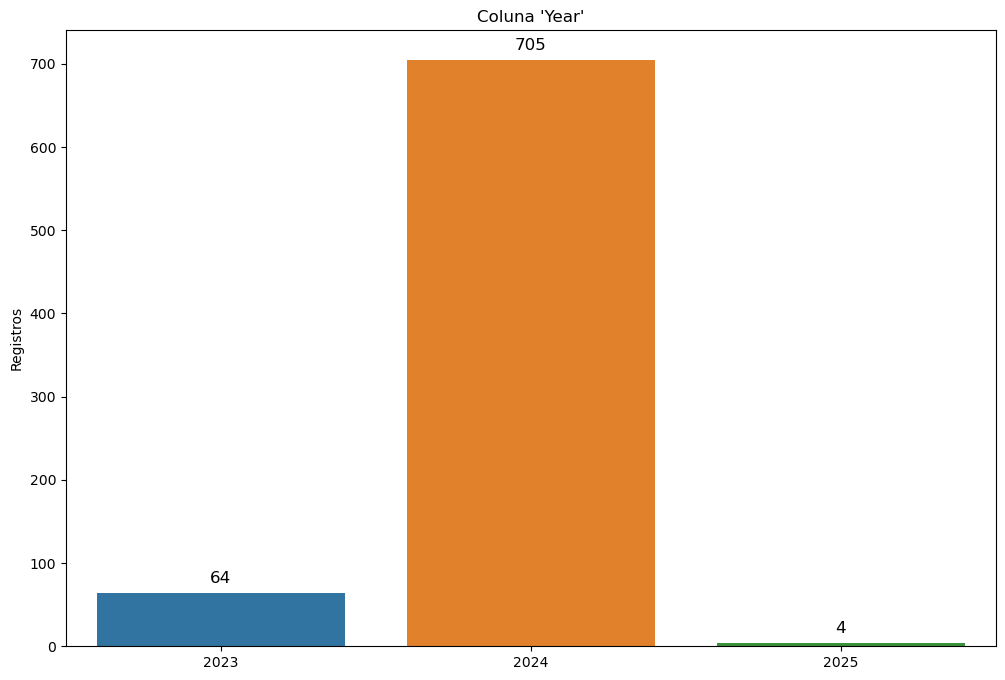

In [95]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "year",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Registros")
plt.title("Coluna 'Year'")
plt.show()

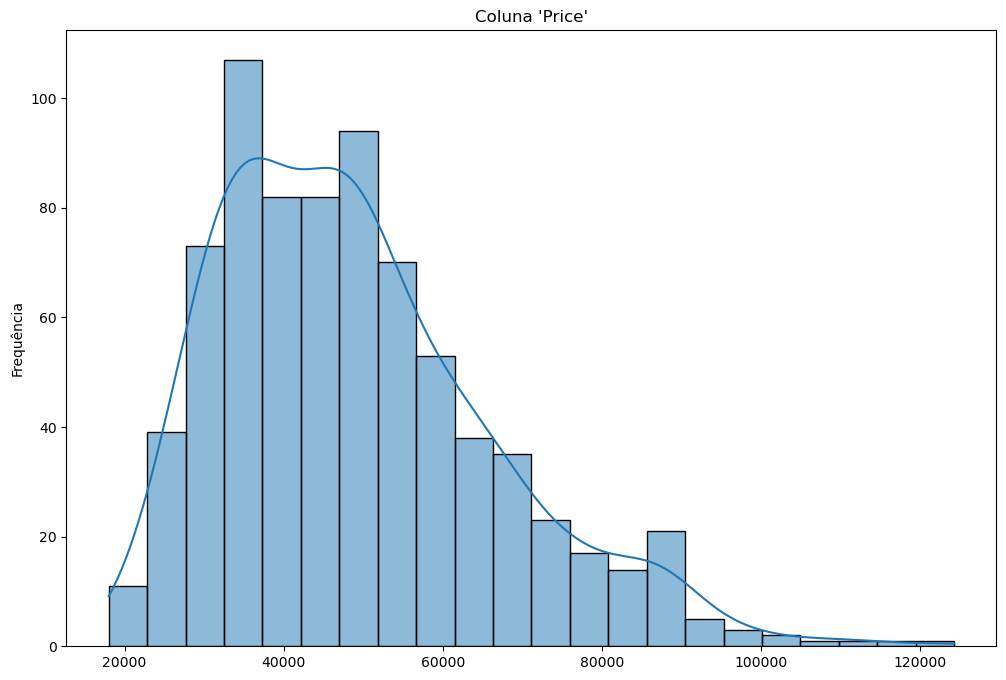

In [96]:
plt.figure(figsize=(12,8))
sns.histplot(data=df["price"], kde = True)
plt.xlabel("")
plt.ylabel("Frequência")
plt.title("Coluna 'Price'")
plt.show()

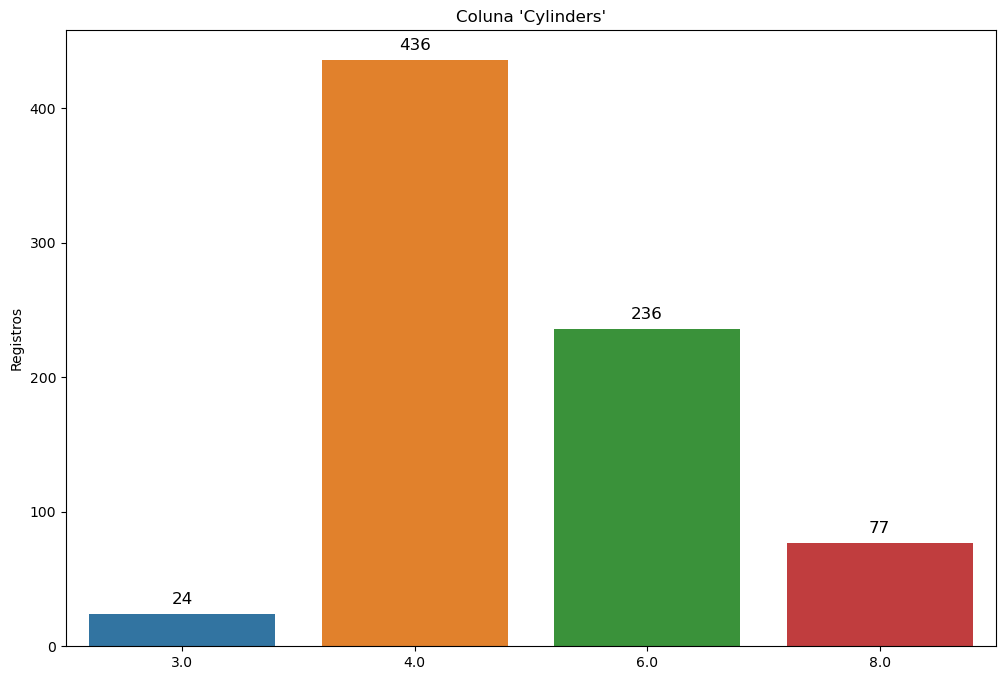

In [97]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "cylinders",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Registros")
plt.title("Coluna 'Cylinders'")
plt.show()

### Como a coluna "mileage" tem muitos valores distintos vamos criar um intervalo

In [98]:
# Calculo para medir o intervalo que vai ser usado
at = df["mileage"].max() - df["mileage"].min()
linhas = round(math.sqrt(df.shape[0]))
ic = (at + 5) / linhas

In [99]:
# Definindo quantos intervalos vão ser usados
bins = [0]
cont = 0
while bins[cont] <= df["mileage"].max():
    aux = bins[cont] + ic
    bins.append(aux)
    cont += 1

In [100]:
# Criando os labels de intervalo
labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins) - 1)]

In [101]:
df["mileage interval"] = pd.cut(
    x=df["mileage"],
    bins=bins,
    labels=labels,
    right=False
)

In [102]:
df_intervalos = pd.DataFrame(df["mileage interval"].value_counts())
df_intervalos = df_intervalos.reset_index()

In [103]:
# Removendo intervalos que não tem registros
remover_intervalos = df_intervalos[df_intervalos["mileage interval"] <= 0].index
df_intervalos.drop(remover_intervalos,inplace=True)

In [104]:
# Exibindo os intervalos de quilometragem e suas respectivas quantidades de registro
df_intervalos.rename(columns ={"index":"mileage interval","mileage interval":"count"})

,mileage interval,count
0,0 - 347,757
1,347 - 694,5
2,4164 - 4511,3
3,1735 - 2082,2
4,3123 - 3470,1
5,5552 - 5899,1
6,4511 - 4858,1
7,3817 - 4164,1
8,9369 - 9716,1
9,2429 - 2776,1


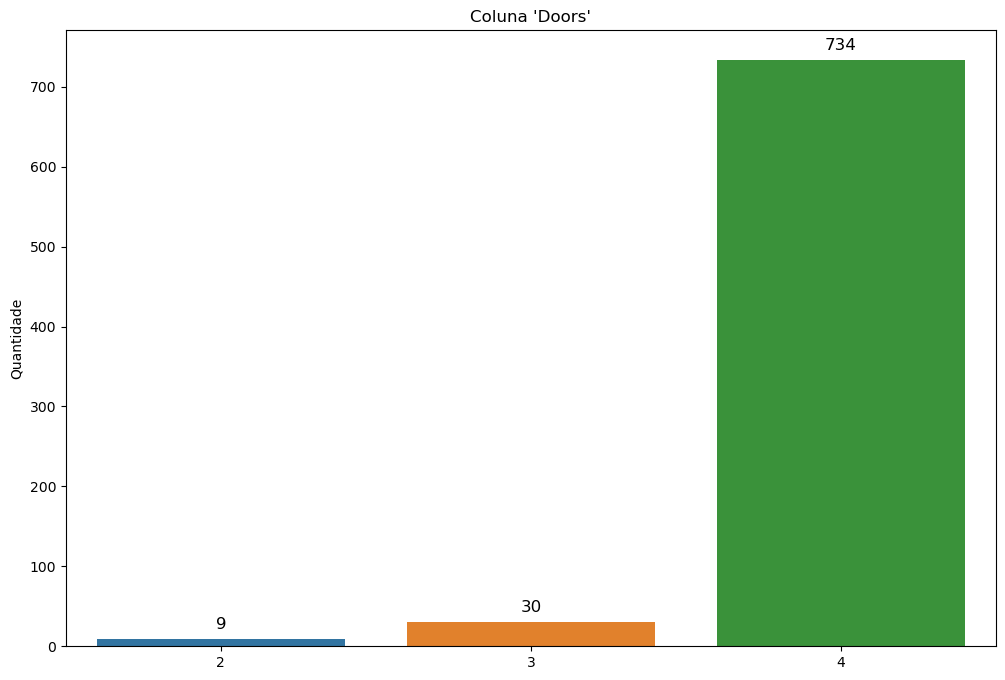

In [105]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "doors",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Coluna 'Doors'")
plt.show()

### Agora vamos para as variáveis categoricas

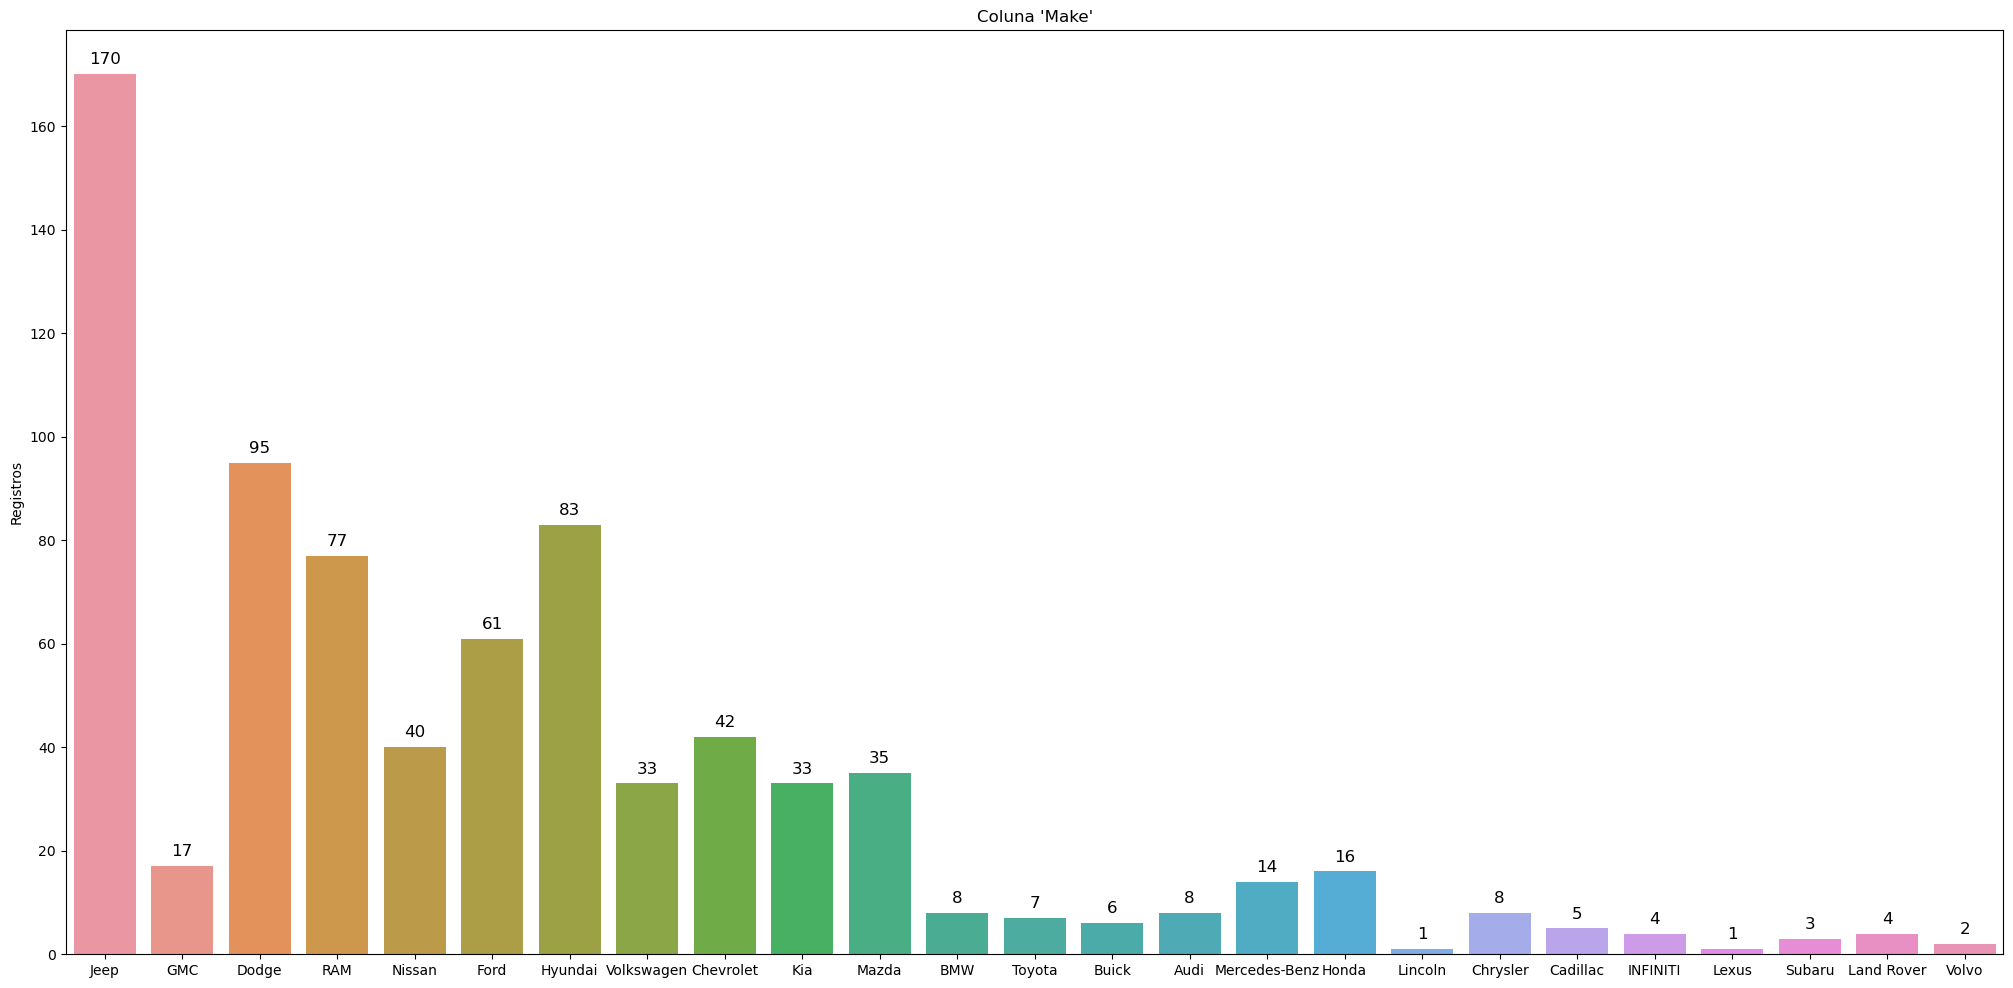

In [106]:
plt.figure(figsize=(25,12))
ax = sns.countplot(x = "make",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Registros")
plt.title("Coluna 'Make'")
plt.show()

In [107]:
df_model = df.groupby(["make","model"])["price"].count().reset_index().sort_values(by="price",ascending=False)

In [108]:
df_model.rename(columns={"price":"count"},inplace=True)

In [109]:
# Visualizando a marca e seus respectivos modelos fabricados
df_model

,make,model,count
25,Dodge,Hornet,56
102,RAM,3500,50
60,Jeep,Compass,40
24,Dodge,Durango,33
83,Mazda,CX-90 PHEV,32
...,...,...,...
79,Land Rover,Range Rover Evoque,1
80,Lexus,RX 500h,1
81,Lincoln,Corsair,1
84,Mazda,MX-5 Miata RF,1


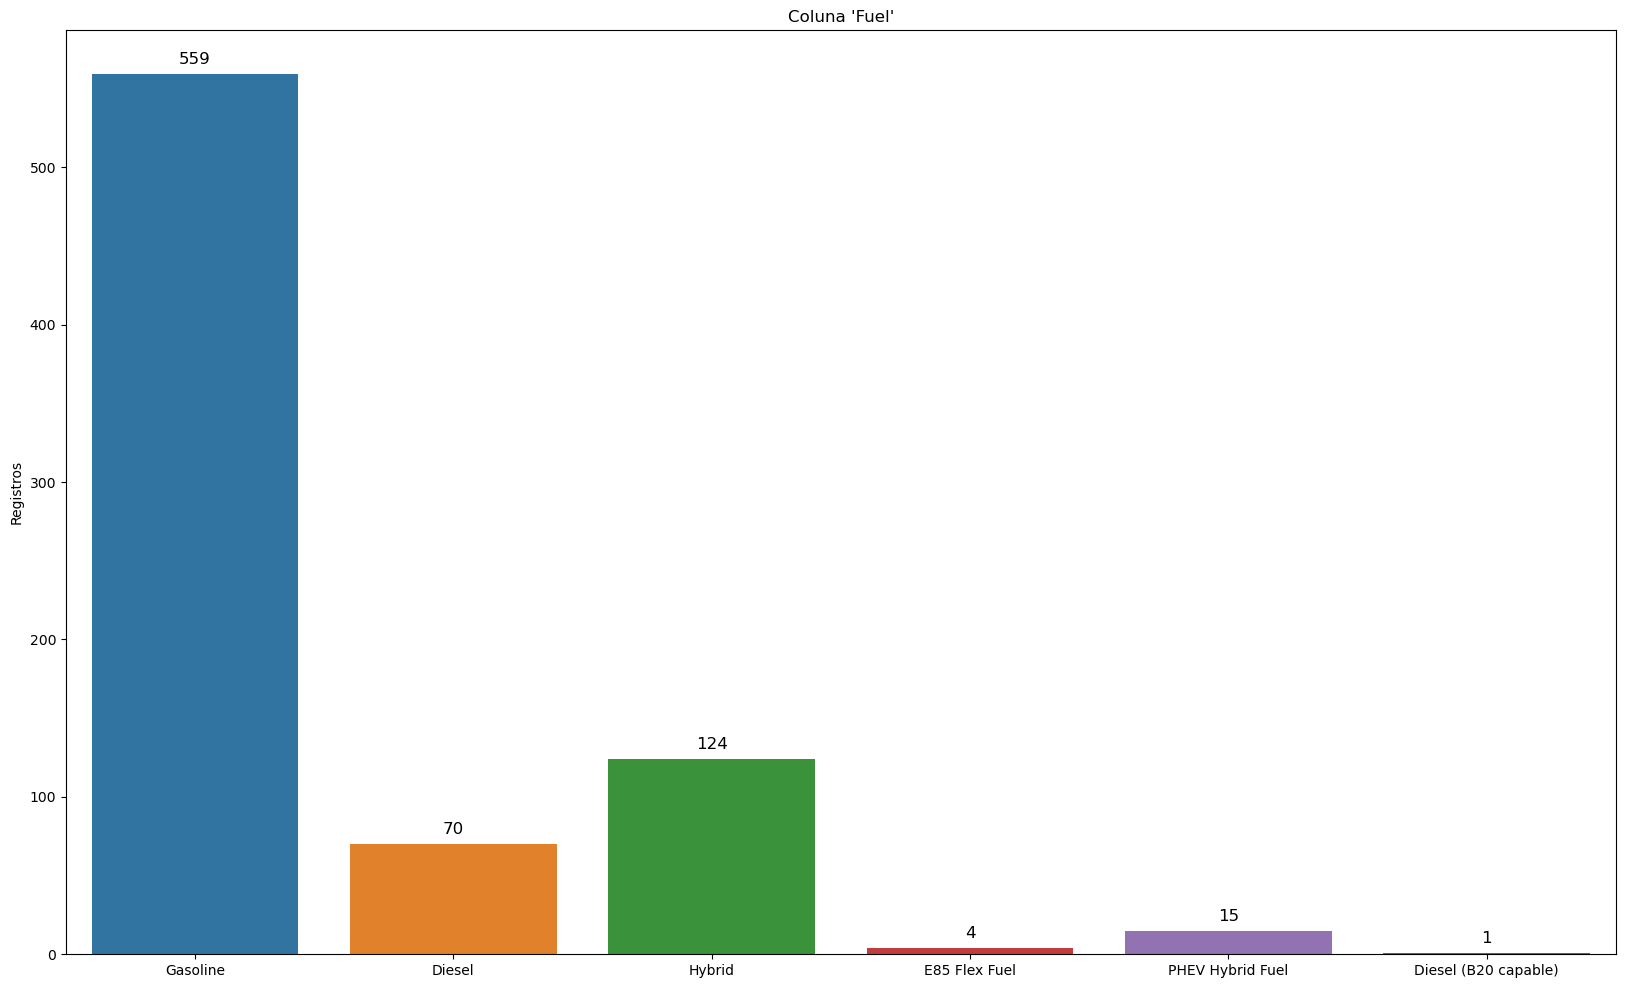

In [110]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x = "fuel",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Registros")
plt.title("Coluna 'Fuel'")
plt.show()

In [111]:
# Registros da coluna transmission
df["transmission"].value_counts()

8-Speed Automatic                              271
Automatic                                      181
6-Speed Automatic                               91
9-Speed Automatic                               55
10-Speed Automatic                              46
Automatic CVT                                   35
8-Speed Automatic with Auto-Shift               16
8-Speed Automatic with Tiptronic                10
7-Speed DSGA? Automatic w/ 4MO                  10
CVT                                              7
6-Spd Aisin F21-250 PHEV Auto Trans              6
7-Speed Automatic S tronic                       4
6-Speed Automatic Electronic with Overdrive      4
9-Speed 948TE Automatic                          4
8-Speed A/T                                      4
7-Speed Automatic with Auto-Shift                4
Variable                                         3
8-speed automatic                                3
7-Speed DSG Automatic with Tiptronic             3
Aisin 6-Speed Automatic        

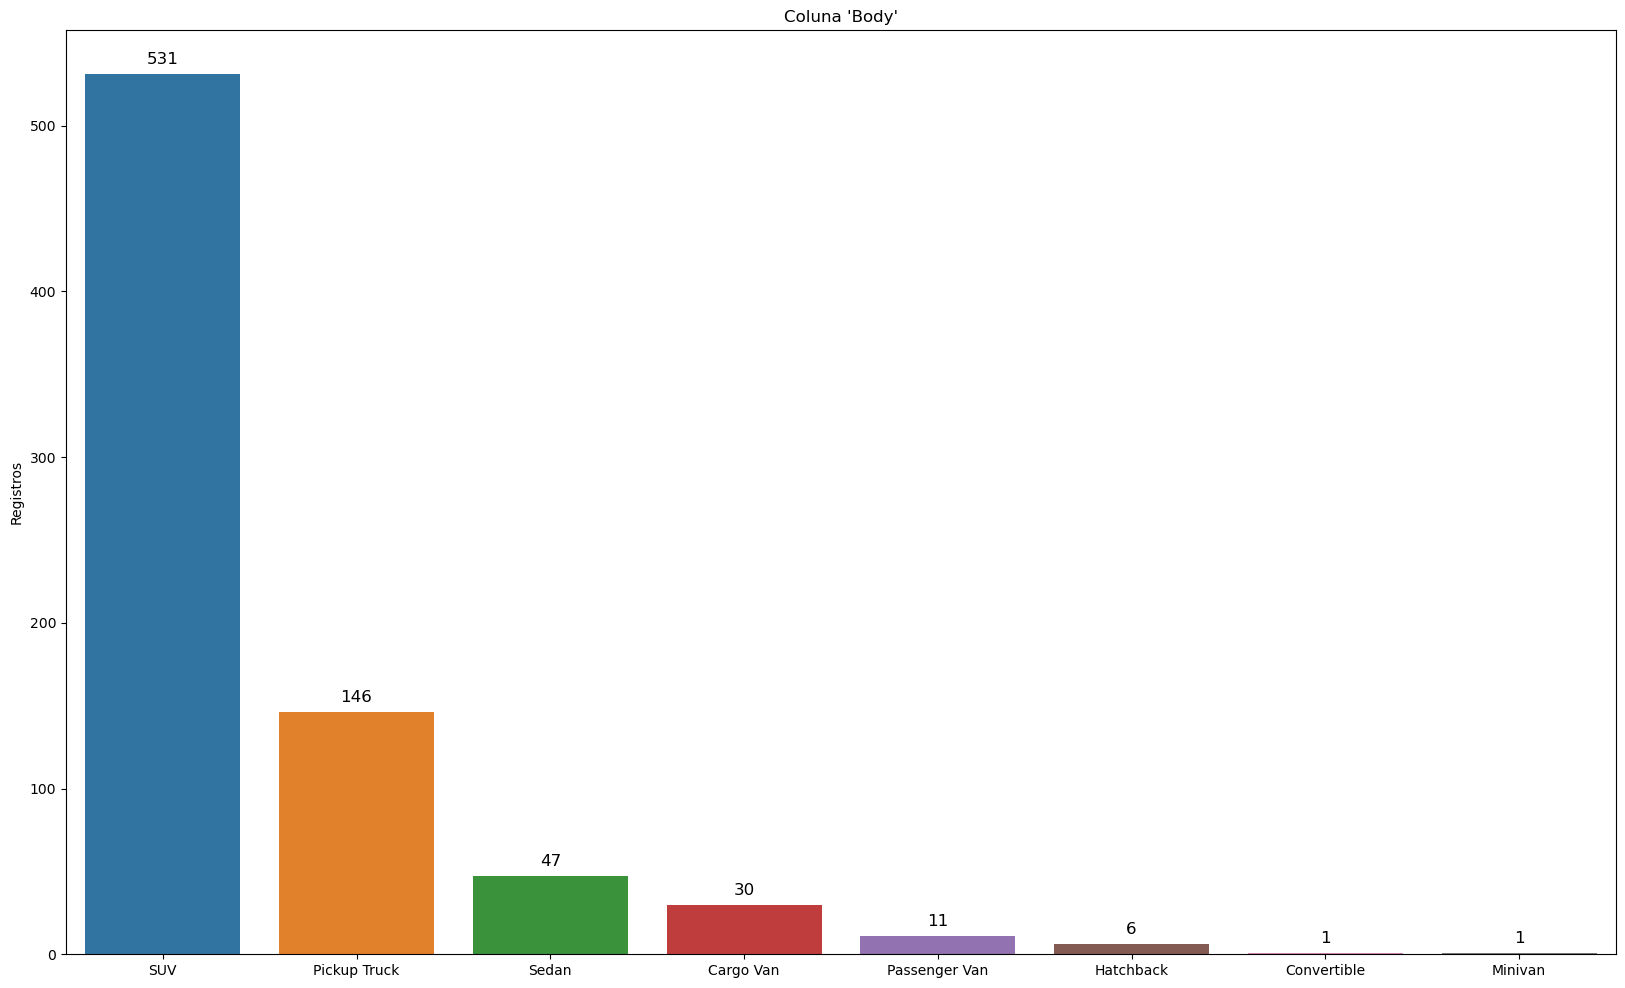

In [112]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x = "body",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Registros")
plt.title("Coluna 'Body'")
plt.show()

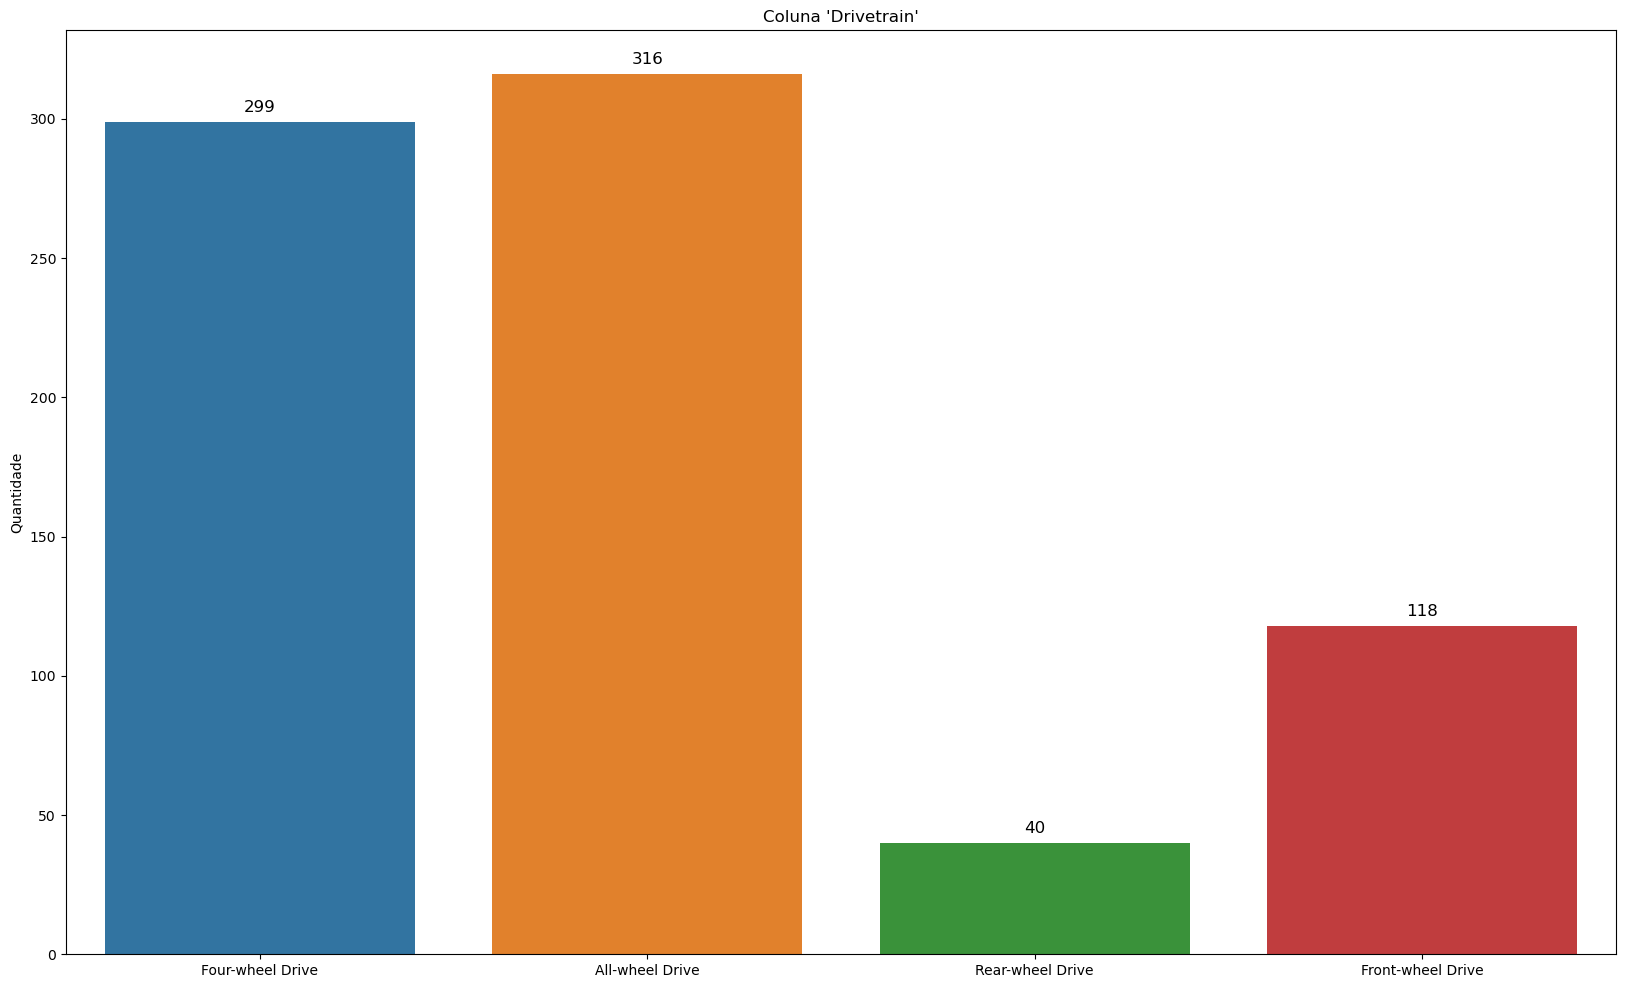

In [113]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x = "drivetrain",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Coluna 'Drivetrain'")
plt.show()

### Agora vamos calcular a dispersão dos dados nas variáveis númericas

In [114]:
cv = lambda media, dp: (dp/media) * 100 #Formula para calcular o coeficiente de variação
colunas_numericas = df.describe().columns #Somente colunas númericas
resultados_cv = [cv(df[coluna].mean(), df[coluna].std()) for coluna in colunas_numericas]

In [115]:
for coluna,resultado in zip(colunas_numericas,resultados_cv):
    print(f"A variável {coluna} apresenta uma variação de {round(resultado,2)}%")
    

A variável year apresenta uma variação de 0.01%
A variável price apresenta uma variação de 35.34%
A variável cylinders apresenta uma variação de 27.63%
A variável mileage apresenta uma variação de 722.2%
A variável doors apresenta uma variação de 7.26%


In [116]:
# Média da variável mileage
df["mileage"].mean()

78.01164294954722

In [117]:
# Desvio Padrão da variável mileage
df["mileage"].std()

563.3984303448528

In [118]:
# Mediana da variável mileage
df["mileage"].median()

8.0

### Então podemos notar que a variável mileage apresenta uma variação extrema em torno da média. Isso pode ser notado tanto pelo CV (coeficiente de variação), quanto pela média e desvio padrão do mesmo
### Mais uma observação importante é que a média está distante da mediana, mas um indicador que implica na variabilidade dos dados da variável
### Com certeza essa variável tem valores extremos (outilers)

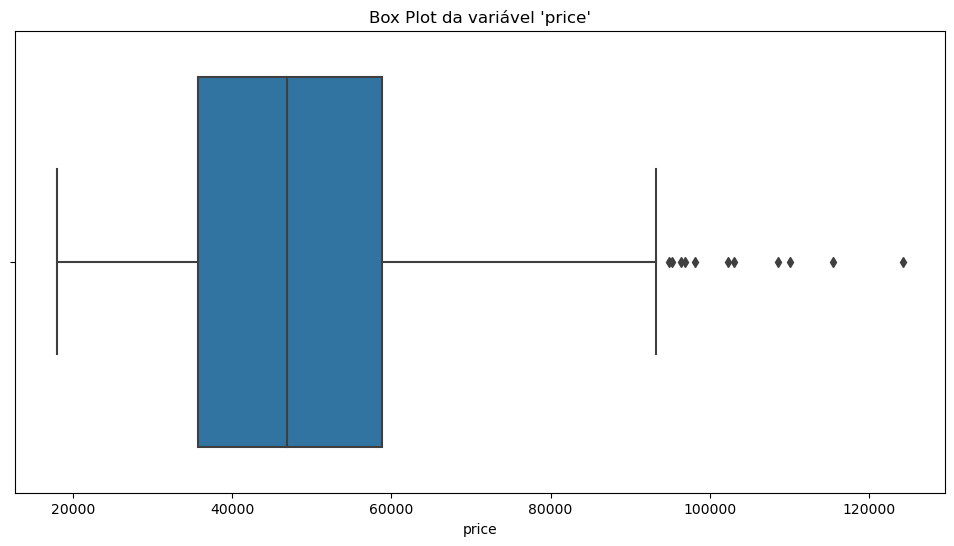

In [119]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["price"])
plt.title("Box Plot da variável 'price'")
plt.show()

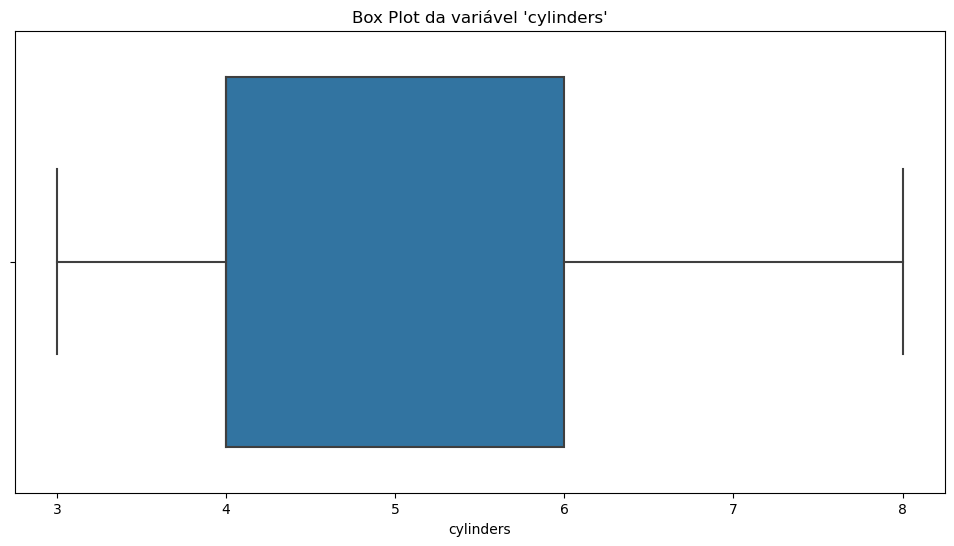

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["cylinders"])
plt.title("Box Plot da variável 'cylinders'")
plt.show()

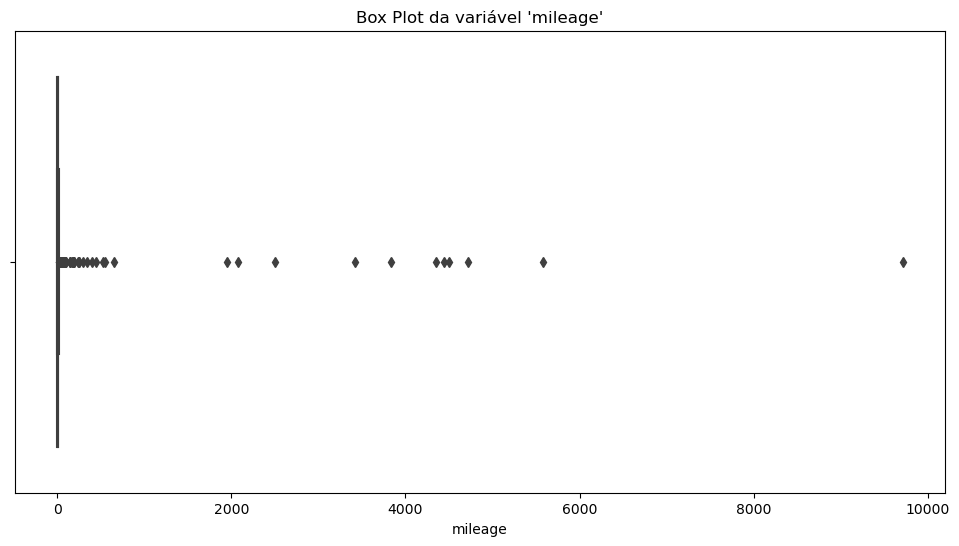

In [121]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["mileage"])
plt.title("Box Plot da variável 'mileage'")
plt.show()

### Podemos notar uma quantidade grande de valores extremos na variável mileage, na variável price também, vamos identificar esses registros.

In [122]:
IC = df["price"].quantile(0.75) - df["price"].quantile(0.25) #Tamanho da caixa do boxplot terceiro quartil menos 1 quartil
formula_price = df["price"].quantile(0.75) + (1.5 * IC) #Formula para encontrar os outliers que ultrapassam o ponto máximo do box plot

In [123]:
formula_price #Valor máximo do boxplot pelo calculo, todos valores que ultrapassar esse é considerado outliers

93575.5

In [124]:
outliers_price = df["price"] > formula_price

In [125]:
df_extremos_price = df.loc[outliers_price, ].copy()

In [126]:
df_extremos_price

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4,Summit White,Teak/Light Shale,Four-wheel Drive,0 - 347
405,2024 Mercedes-Benz GLS 450 4MATIC,Mercedes-Benz,GLS 450,2024,98180.0,24V GDI DOHC Turbo,6.0,Gasoline,5.0,9-Speed Automatic,4MATIC,SUV,4,Polar White,Beige / Black,All-wheel Drive,0 - 347
450,2024 BMW X7 M60i,BMW,X7,2024,115445.0,32V GDI DOHC Twin Turbo,8.0,Gasoline,447.0,8-Speed Automatic,M60i,SUV,4,Mineral White Metallic,Black,All-wheel Drive,347 - 694
538,2024 BMW 740 i,BMW,740,2024,103045.0,24V GDI DOHC Turbo,6.0,Gasoline,19.0,8-Speed Automatic,i,Sedan,4,Black Sapphire Metallic,Black,Rear-wheel Drive,0 - 347
611,2024 Jeep Grand Wagoneer Series III,Jeep,Grand Wagoneer,2024,124250.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,8-Speed Automatic,Series III,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,0 - 347
697,2024 Mercedes-Benz GLS 450 4MATIC,Mercedes-Benz,GLS 450,2024,95230.0,24V GDI DOHC Turbo,6.0,Gasoline,8.0,9-Speed Automatic,4MATIC,SUV,4,Polar White,Macchiato Beige,All-wheel Drive,0 - 347
720,2024 GMC Sierra 3500 Denali,GMC,Sierra 3500,2024,102287.0,32V DDI OHV Turbo Diesel,8.0,Diesel,4.0,10-Speed Automatic,Denali,Pickup Truck,4,Summit White,Jet Black,Four-wheel Drive,0 - 347
734,2023 Jeep Grand Wagoneer Series II,Jeep,Grand Wagoneer,2023,110150.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,650.0,8-Speed Automatic,Series II,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,347 - 694
769,2024 GMC Sierra 2500 Denali Ultimate,GMC,Sierra 2500,2024,96860.0,32V DDI OHV Turbo Diesel,8.0,Diesel,0.0,10-Speed Automatic,Denali Ultimate,Pickup Truck,4,White Frost Tri-Coat,Alpine Umber,Four-wheel Drive,0 - 347
829,2024 Jeep Grand Wagoneer Series III,Jeep,Grand Wagoneer,2024,108537.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,4501.0,8-Speed Automatic,Series III,SUV,4,Bright White Clearcoat,Tupelo,Four-wheel Drive,4164 - 4511


### Os modelos de veiculos que ultrapassam o valor extremo do box plot de price são esses:
### Com 11 registros

In [127]:
df_extremos_price["model"].value_counts()

Grand Wagoneer    3
GLS 450           2
X7                2
Yukon XL          1
740               1
Sierra 3500       1
Sierra 2500       1
Name: model, dtype: int64

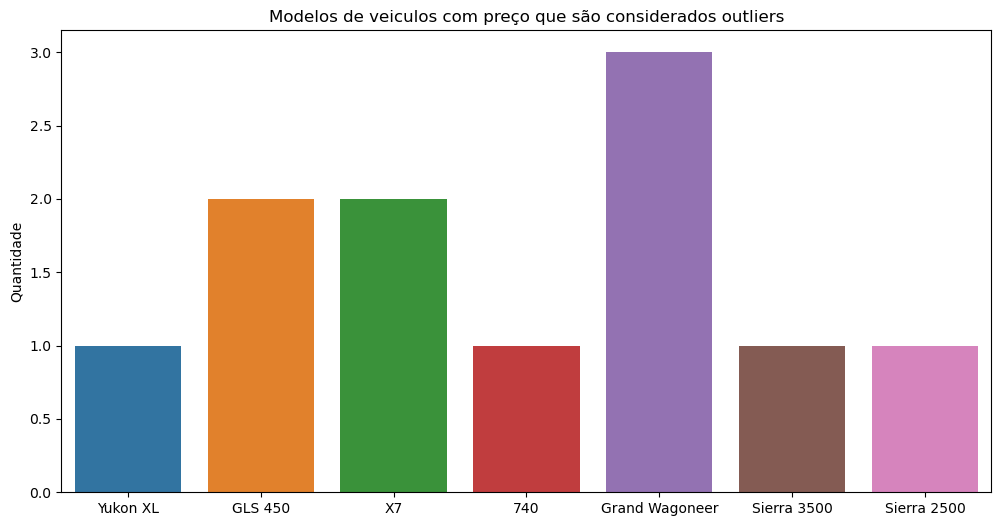

In [128]:
plt.figure(figsize=(12,6))
sns.countplot(x = "model",data = df_extremos_price)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Modelos de veiculos com preço que são considerados outliers")
plt.show()

### O veiculo que apresenta o maior preço de custo em (USD):

In [129]:
df[df["price"] == df_extremos_price["price"].max()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
611,2024 Jeep Grand Wagoneer Series III,Jeep,Grand Wagoneer,2024,124250.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,8-Speed Automatic,Series III,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,0 - 347


In [130]:
IC2 = df["mileage"].quantile(0.75) - df["mileage"].quantile(0.25)
formula_mileage = df["mileage"].quantile(0.75) + (1.5 * IC2)

In [131]:
formula_mileage

26.5

In [132]:
outliers_mileage = df["mileage"] > formula_mileage

In [133]:
df_extremos_mileage = df.loc[outliers_mileage,].copy()

In [134]:
df_extremos_mileage

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4,White Knuckle Clearcoat,Black,All-wheel Drive,0 - 347
5,2024 Nissan Murano Platinum,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4,White,Gray,All-wheel Drive,3817 - 4164
11,2024 RAM 3500 Tradesman,RAM,3500,2024,60904.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,532.0,Automatic,Tradesman,Pickup Truck,4,Granite Crystal Metallic Clearcoat,Black,Four-wheel Drive,347 - 694
16,2024 Nissan Murano Platinum,Nissan,Murano,2024,48000.0,24V MPFI DOHC,6.0,Gasoline,87.0,Automatic CVT,Platinum,SUV,4,Deep Ocean Blue,Beige,All-wheel Drive,0 - 347
20,2024 RAM 3500 Tradesman,RAM,3500,2024,65221.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,344.0,Automatic,Tradesman,Pickup Truck,4,Bright White Clearcoat,Black,Four-wheel Drive,0 - 347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2024 Jeep Grand Cherokee 4xe Base,Jeep,Grand Cherokee 4xe,2024,49082.0,"gasoline direct injection, DOHC, intercooled t...",4.0,Gasoline,51.0,8-Speed Automatic,Base,SUV,4,Bright White Clearcoat,Wicker Beige/Black,Four-wheel Drive,0 - 347
957,2024 Volkswagen Taos 1.5T S,Volkswagen,Taos,2024,28098.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,66.0,7-Speed DSG Automatic with Tiptronic,1.5T S,SUV,4,Deep Black Pearl,Gray/Black,All-wheel Drive,0 - 347
986,2024 Jeep Grand Cherokee 4xe Trailhawk,Jeep,Grand Cherokee 4xe,2024,67164.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,29.0,8-Speed Automatic,Trailhawk,SUV,4,Metallic,Global Black,Four-wheel Drive,0 - 347
992,2024 RAM 3500 Tradesman,RAM,3500,2024,67446.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,296.0,Automatic,Tradesman,Pickup Truck,4,Bright White Clearcoat,Diesel Gray/Black,Four-wheel Drive,0 - 347


### Temos 82 registros da variável "mileage" que ultrapassa o valor extremo do boxplot sendo de 26.5

### O veiculo que apresenta maior quilometragem rodada em (Milhas):

In [135]:
df[df["mileage"] == df_extremos_mileage["mileage"].max()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
371,2023 Jeep Wagoneer L Series III,Jeep,Wagoneer L,2023,86097.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,9711.0,8-Speed Automatic,Series III,SUV,4,Riverrock Green,Sea Salt,Four-wheel Drive,9369 - 9716


### Apesar de termos valores extremos (outilers) nas variáveis "price" e "mileage", não vamos remover ainda, queremos testar como o modelo de previsão vai performar e se ajustar com esses valores, se impactar em nosso modelo preditivo retiramos, pois esses valores são do mundo real, veiculos podem ter valores de custo bem mais alto que outros veiculos por conta de diversos fatores do veiculo mesma analise com quilometragem, veiculos podem ter rodado mais KM (no nosso dataset é Milhas) do que outros

### Qual a média de preço dos veiculos de cada marca?

In [136]:
df_media_marca = df.groupby("make")["price"].agg(["mean","count"]).reset_index()

In [137]:
df_media_marca = df_media_marca.sort_values(by="mean",ascending=False)

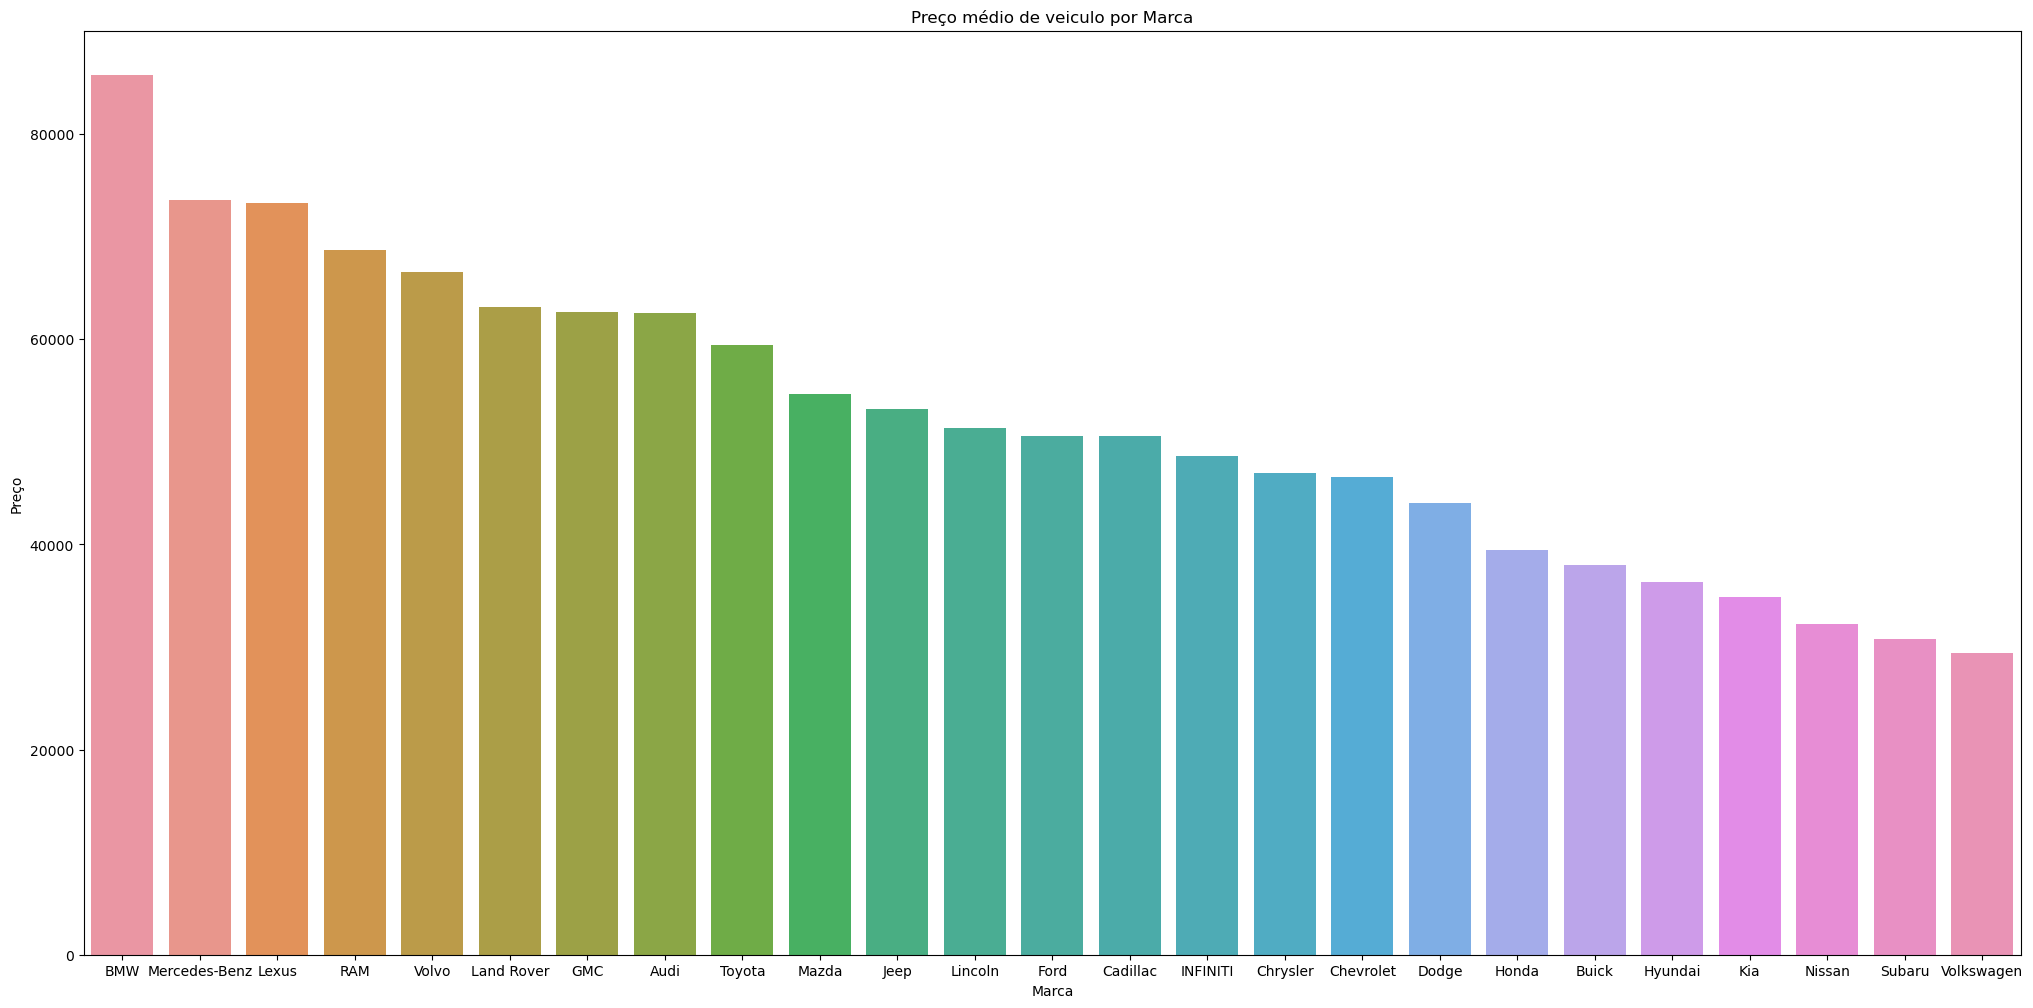

In [138]:
plt.figure(figsize=(25,12))
sns.barplot(x=df_media_marca["make"],y=df_media_marca["mean"])
plt.ylabel("Preço")
plt.xlabel("Marca")
plt.title("Preço médio de veiculo por Marca")
plt.show()

### Qual a quantidade de veiculos de cada marca?

In [139]:
df_media_marca["percentual"] = round((df_media_marca["count"] * 100) / df.shape[0],2)

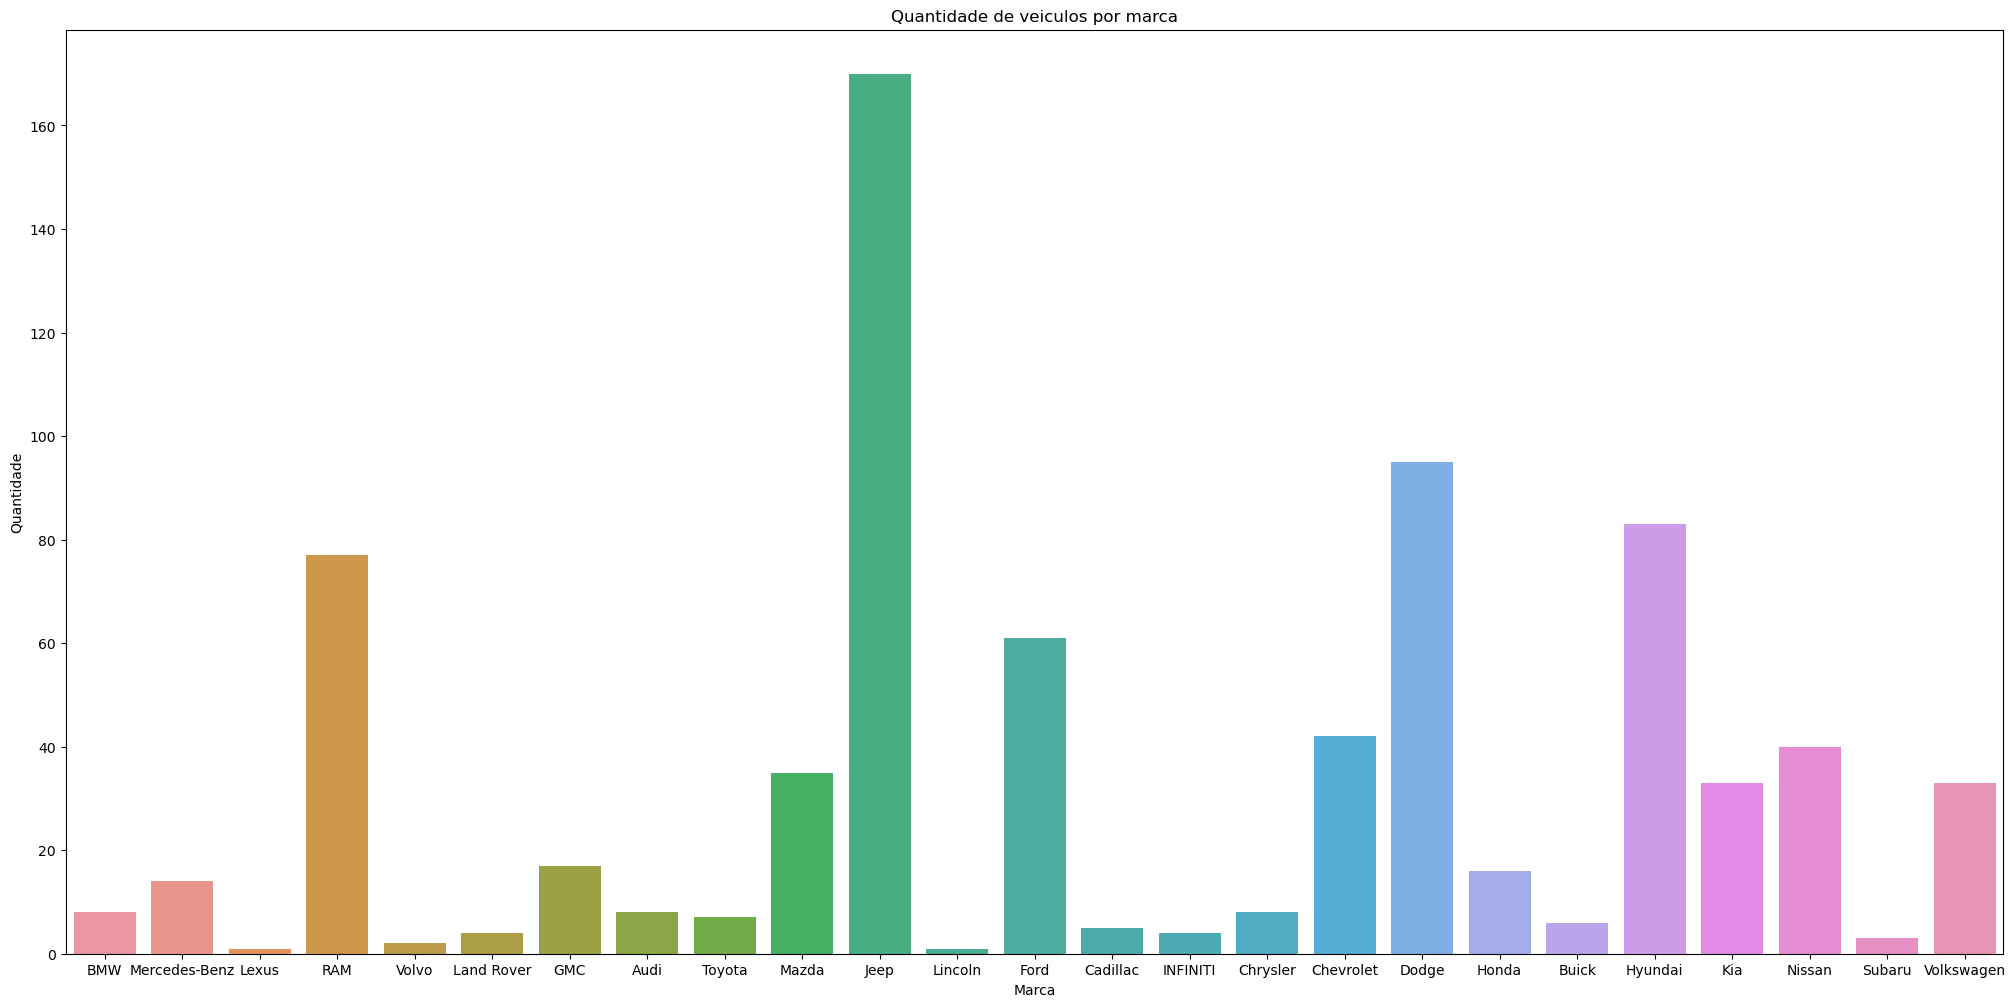

In [140]:
plt.figure(figsize=(25,12))
sns.barplot(x=df_media_marca["make"],y=df_media_marca["count"])
plt.ylabel("Quantidade")
plt.xlabel("Marca")
plt.title("Quantidade de veiculos por marca")
plt.show()

In [141]:
# Quantidade de veiculos de cada marca, juntamente com a média de preço e a representação em porcentagem de todos os veiculos
df_media_marca

,make,mean,count,percentual
1,BMW,85801.875000,8,1.03
18,Mercedes-Benz,73569.857143,14,1.81
15,Lexus,73270.000000,1,0.13
20,RAM,68712.233766,77,9.96
24,Volvo,66570.000000,2,0.26
14,Land Rover,63162.750000,4,0.52
8,GMC,62695.705882,17,2.20
0,Audi,62598.750000,8,1.03
22,Toyota,59428.714286,7,0.91
17,Mazda,54663.942857,35,4.53


### Mesmo a marca BMW representando apenas 1% de todos os veiculos, ela apresenta um preço médio de veiculo maior que as concorrentes de 85.801,00 mil doláres.
### A marca Jeep foi a que mais fabricou carros (22%) com um preço médio de 53.168,00 mil doláres.

### Bem interessante pois a Jeep possui o veiculo de maior valor fabricado

In [142]:
df_jeep = df[df["make"]=="Jeep"].sort_values(by="price",ascending=False).copy()

In [143]:
df_jeep

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
611,2024 Jeep Grand Wagoneer Series III,Jeep,Grand Wagoneer,2024,124250.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,8-Speed Automatic,Series III,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,0 - 347
734,2023 Jeep Grand Wagoneer Series II,Jeep,Grand Wagoneer,2023,110150.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,650.0,8-Speed Automatic,Series II,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,347 - 694
829,2024 Jeep Grand Wagoneer Series III,Jeep,Grand Wagoneer,2024,108537.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,4501.0,8-Speed Automatic,Series III,SUV,4,Bright White Clearcoat,Tupelo,Four-wheel Drive,4164 - 4511
751,2024 Jeep Wagoneer Series III,Jeep,Wagoneer,2024,89595.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series III,SUV,4,Bright White Clearcoat,Global Black,Four-wheel Drive,0 - 347
923,2024 Jeep Wagoneer L Series II,Jeep,Wagoneer L,2024,88135.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,21.0,8-Speed Automatic,Series II,SUV,4,Velvet Red Pearlcoat,Black,Four-wheel Drive,0 - 347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2024 Jeep Compass Latitude,Jeep,Compass,2024,28265.0,16V GDI DOHC Turbo,4.0,Gasoline,11.0,8-Speed Automatic,Latitude,SUV,4,Bright White Clearcoat,Black,Four-wheel Drive,0 - 347
570,2024 Jeep Compass Latitude,Jeep,Compass,2024,28265.0,16V GDI DOHC Turbo,4.0,Gasoline,7.0,8-Speed Automatic,Latitude,SUV,4,Bright White Clearcoat,Black,Four-wheel Drive,0 - 347
703,2024 Jeep Compass Sport,Jeep,Compass,2024,27087.0,16V GDI DOHC Turbo,4.0,Gasoline,9.0,8-Speed Automatic,Sport,SUV,4,Diamond Black,Black,Four-wheel Drive,0 - 347
456,2024 Jeep Compass Latitude,Jeep,Compass,2024,26860.0,16V GDI DOHC Turbo,4.0,Gasoline,3.0,8-Speed Automatic,Latitude,SUV,4,Silver Zynith,Black,Four-wheel Drive,0 - 347


### Qual foi a média de preço dos veiculos de cada ano?

In [144]:
df_ano = df.groupby("year")["price"].agg(["mean","count"]).reset_index()

In [145]:
df_ano["percentual"] = round((df_ano["count"] * 100) / df.shape[0])

In [146]:
df_ano

,year,mean,count,percentual
0,2023,49663.203125,64,8.0
1,2024,48901.590071,705,91.0
2,2025,56328.750000,4,1.0


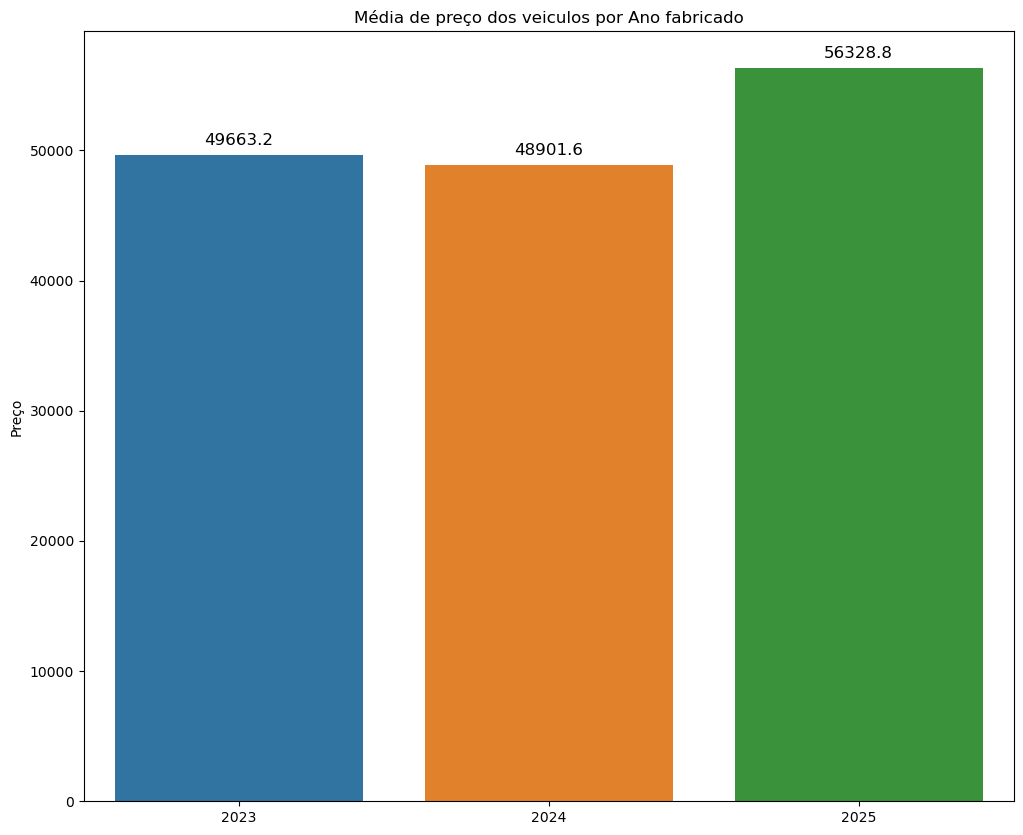

In [147]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_ano["year"], y =df_ano["mean"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Preço")
plt.title("Média de preço dos veiculos por Ano fabricado")
plt.show()

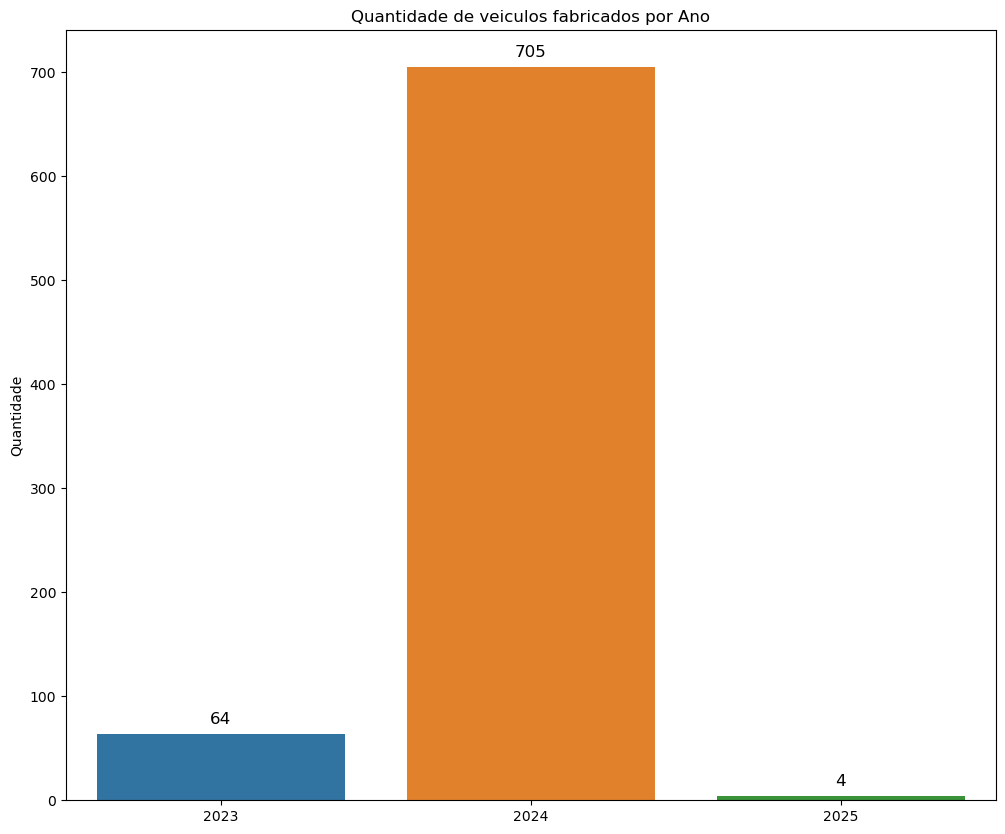

In [148]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_ano["year"], y =df_ano["count"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Quantidade de veiculos fabricados por Ano")
plt.show()

### Mesmo 2025 ter somente 4 carros fabricados o valor médio de preço ultrapassa os anos anteriores
### Muito pelo fato de ter somente 4 carros e a força da média ser maior mesmo

In [149]:
df[df["year"] == 2025]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
524,2025 BMW X7 xDrive40i,BMW,X7,2025,90945.0,24V DOHC,6.0,Gasoline,4.0,8-Speed Automatic,xDrive40i,SUV,4,Aventurin Red Metallic,Black,All-wheel Drive,0 - 347
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,16V GDI DOHC Hybrid,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,4,Canyon,Black,All-wheel Drive,0 - 347
685,2025 Ford Explorer Platinum,Ford,Explorer,2025,53915.0,16V GDI DOHC Turbo,4.0,Gasoline,8.0,10-Speed Automatic,Platinum,SUV,4,Star White Metallic Tri-Coat,Mojave Dusk/Onyx,Rear-wheel Drive,0 - 347
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,16V GDI DOHC Turbo,4.0,Gasoline,0.0,Automatic CVT,EX-L,SUV,4,Urban Gray Pearl,Black,All-wheel Drive,0 - 347


### Podemos observar também que mesmo os veiculos fabricados em 2023 que representam (8% de todos os veiculos) a média de preço também é superior a carros fabricados em 2024

In [150]:
df[df["year"] == 2023].sort_values("price", ascending=False)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
734,2023 Jeep Grand Wagoneer Series II,Jeep,Grand Wagoneer,2023,110150.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,650.0,8-Speed Automatic,Series II,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,347 - 694
371,2023 Jeep Wagoneer L Series III,Jeep,Wagoneer L,2023,86097.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,9711.0,8-Speed Automatic,Series III,SUV,4,Riverrock Green,Sea Salt,Four-wheel Drive,9369 - 9716
930,2023 Jeep Wagoneer L Base,Jeep,Wagoneer L,2023,72835.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4,Diamond Black,Global Black,Four-wheel Drive,0 - 347
518,2023 RAM 3500 Tradesman,RAM,3500,2023,71999.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,252.0,Automatic,Tradesman,Pickup Truck,4,Bright White Clearcoat,Black,Four-wheel Drive,0 - 347
841,2023 Jeep Grand Cherokee 4xe Trailhawk,Jeep,Grand Cherokee 4xe,2023,67650.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,555.0,8-Speed Automatic,Trailhawk,SUV,4,Midnight Sky,Global Black,Four-wheel Drive,347 - 694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,2023 Chrysler 300 Touring L,Chrysler,300,2023,35994.0,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring L,Sedan,4,Gloss Black,Black,Rear-wheel Drive,0 - 347
166,2023 Dodge Charger SXT,Dodge,Charger,2023,35913.0,24V MPFI DOHC,6.0,Gasoline,15.0,8-Speed Automatic,SXT,Sedan,4,Blue,Black,Rear-wheel Drive,0 - 347
140,2023 Dodge Charger SXT,Dodge,Charger,2023,35821.0,24V MPFI DOHC,6.0,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4,Black,Black,Rear-wheel Drive,0 - 347
112,2023 Jeep Compass Latitude,Jeep,Compass,2023,30000.0,DOHC,4.0,Gasoline,0.0,8-Speed Automatic,Latitude,SUV,4,Red Line,Steel Gry Premium Cl,Four-wheel Drive,0 - 347


### Variação de preço em relação a média de preço por cada ano:

In [151]:
result_2025 = df["price"][df["year"] == 2025].agg(["mean","std"])
(result_2025.values[1] / result_2025.values[0]) * 100

42.631709290617536

In [152]:
result_2024 = df["price"][df["year"] == 2024].agg(["mean","std"])
(result_2024.values[1] / result_2024.values[0]) * 100

36.09403097574174

In [153]:
result_2023 = df["price"][df["year"] == 2023].agg(["mean","std"])
(result_2023.values[1] / result_2023.values[0]) * 100

25.7093367196696

### Qual a cilindrada de motor mais fabricado e suas respectivas média de preço e será que quanto maior a cilindrada do motor mais caro tende a ser o preço do carro?

In [154]:
df_cilindrada = df.groupby("cylinders")["price"].agg(["mean","count"]).reset_index()

In [155]:
df_cilindrada

,cylinders,mean,count
0,3.0,33067.916667,24
1,4.0,41040.256881,436
2,6.0,62351.677966,236
3,8.0,58145.493506,77


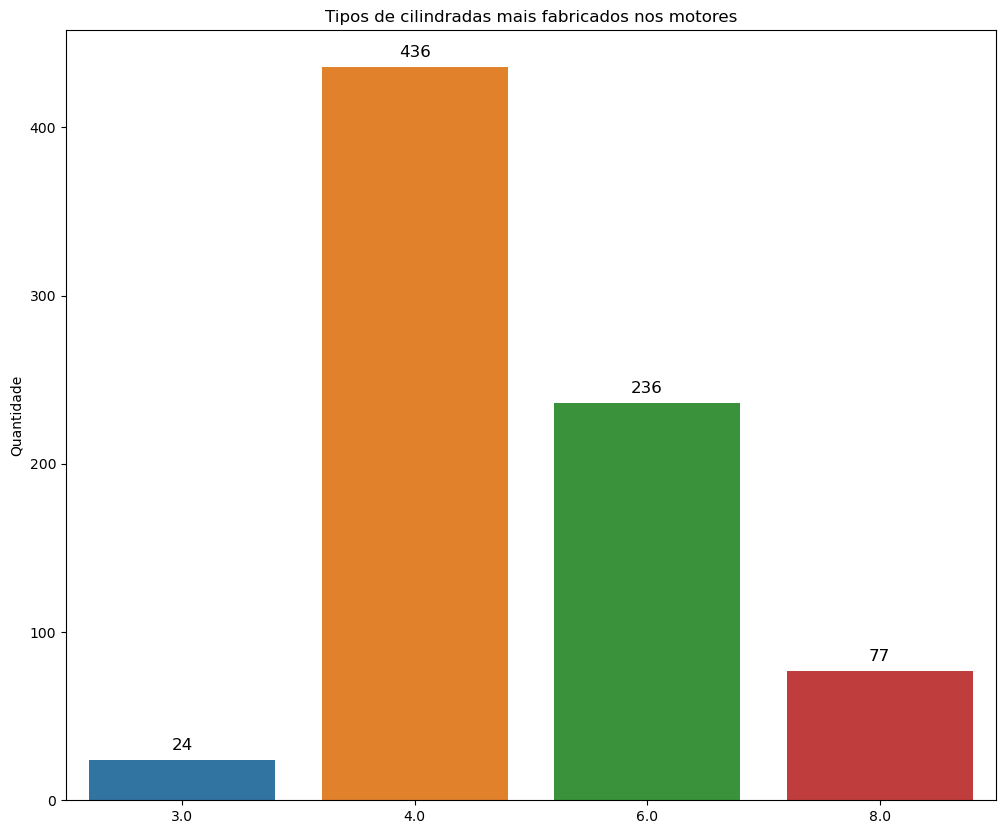

In [156]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_cilindrada["cylinders"], y =df_cilindrada["count"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Tipos de cilindradas mais fabricados nos motores")
plt.show()

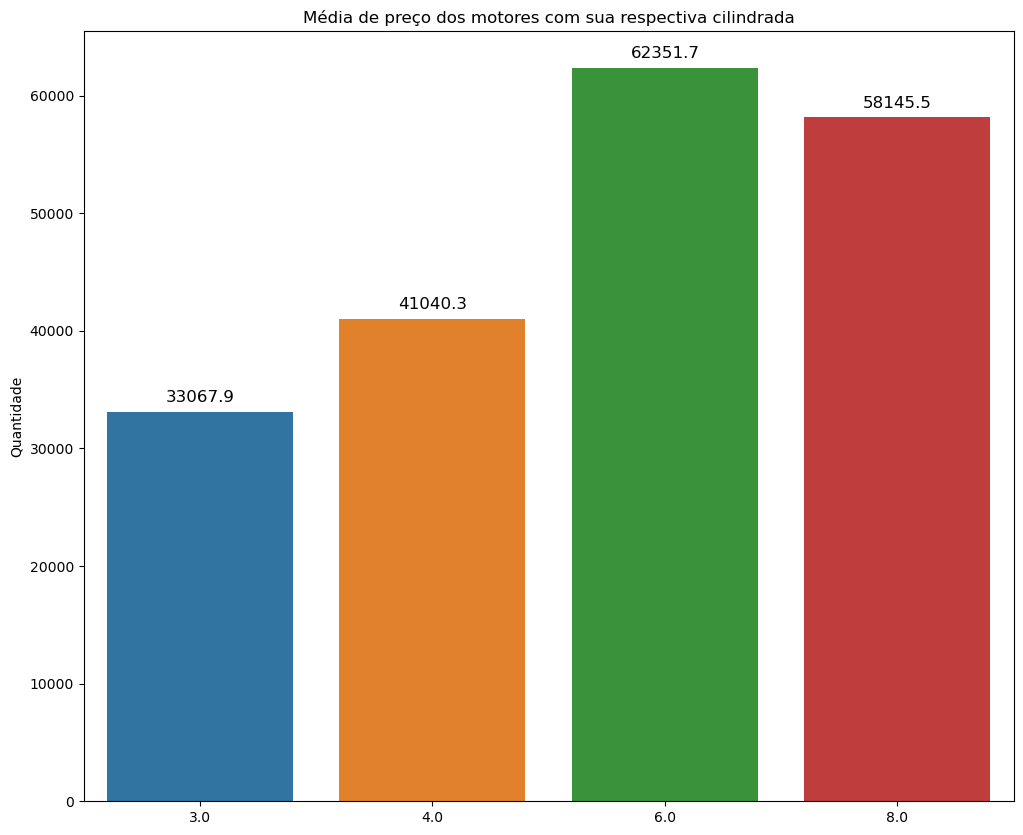

In [157]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_cilindrada["cylinders"], y =df_cilindrada["mean"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Média de preço dos motores com sua respectiva cilindrada")
plt.show()

### Apesar dos motores serem mais fabricados com cilindradas de 4.0, motores com 6.0 tem um preço médio maior que os outros. E quem são as marcas que mais fabricam motores com cilindradas de 6.0?

In [158]:
df_marca_cilindradas = df.groupby(["make","cylinders"])["price"].agg(["count"]).reset_index()

In [159]:
df_marca_cilindradas.sort_values(by="count",ascending=False)

,make,cylinders,count
29,Jeep,4.0,85
30,Jeep,6.0,85
26,Hyundai,4.0,81
45,RAM,6.0,67
14,Dodge,4.0,56
50,Volkswagen,4.0,33
37,Mazda,4.0,33
31,Kia,4.0,32
16,Dodge,8.0,29
19,Ford,6.0,23


### As marcas Jeep e Ram levam esse posto de fabricarem seus motores com cilindradas de 6.0
### Agora a grande questão. A cilindrada do motor influencia no preço do veiculo (no geral)?

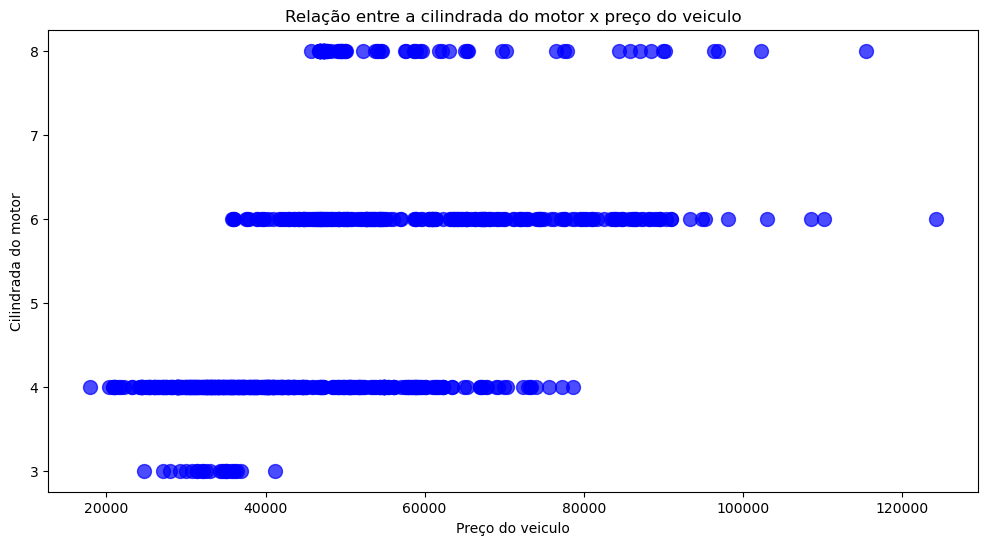

In [160]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df["price"], y=df["cylinders"], color="blue", s=100, alpha=0.7)
plt.xlabel("Preço do veiculo")
plt.ylabel("Cilindrada do motor")
plt.title("Relação entre a cilindrada do motor x preço do veiculo")
plt.show()

### Olha no contexto geral a cilindrada do motor não influencia no preço do veiculo, pode existir outros fatores mais importantes que influencia no preço do veiculo
### Porém para validarmos essa afirmação, vamos fazer um teste de hipótese, com nossas hipóteses formuladas:
### H0: A cilindrada dos motores não influencia no preço do veiculo
### H1: A cilindrafa dos motores influencia no preço do veiculo
### alfa(nível de significância) : 5%

### Agora vamos decidir qual teste usar:

In [161]:
teste_price = shapiro(df["price"])

In [162]:
teste_cylinders = shapiro(df["cylinders"])

In [163]:
if teste_cylinders.pvalue < 0.05 and teste_price.pvalue < 0.05:
    print("Nossas variáveis não seguem uma distribuição normal")

Nossas variáveis não seguem uma distribuição normal


### Certo por nossas variáveis não seguirem uma distribuição normal, vamos usar um teste não parametrico (spearmanr) que mede a força e direção entre duas variáveis

In [164]:
coeficiente, p_valor = spearmanr(df["cylinders"],df["price"])

In [165]:
if p_valor < 0.05:
    print("Rejeitamos a H0 e aceitamos nossa H1, ou seja a cilindrada do motor influencia no preço do veiculo")
else:
    print("Não temos evidencias para rejeitar H0, portanto ela é verdadeira")

Rejeitamos a H0 e aceitamos nossa H1, ou seja a cilindrada do motor influencia no preço do veiculo


In [166]:
coeficiente

0.5843883654121527

### Nosso coeficiente de correlação mostra também que temos uma correlação moderada entre as variáveis

### Quais combustiveis os veiculos mais utilizam?

In [167]:
df_combustivel = df.groupby("fuel")["make"].agg(["count"]).reset_index()

In [168]:
df_combustivel = df_combustivel.sort_values(by="count",ascending=False)

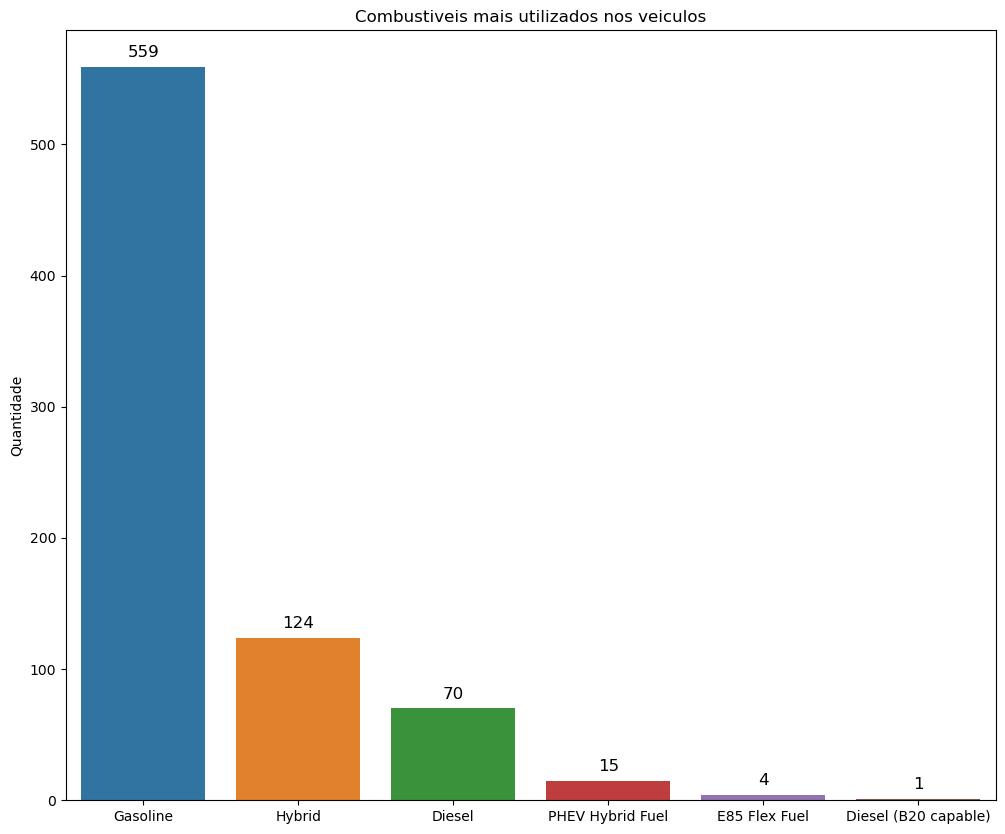

In [169]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_combustivel["fuel"], y =df_combustivel["count"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Combustiveis mais utilizados nos veiculos")
plt.show()

### E quem são as marca que mais utilizam esses tipos de combustivel no seus veiculos?

In [170]:
df_combustivel2 = df.groupby(["fuel","make"])["make"].agg(["count"]).reset_index()

In [171]:
df_combustivel2 = df_combustivel2.sort_values(by="count",ascending=False)

In [172]:
df_combustivel3 = df_combustivel2.pivot_table(
    index="make",      # serão as linhas
    columns="fuel",   # serão as colunas
    values="count"   # Os valores 
)

In [173]:
df_combustivel3.fillna(0,inplace=True)
df_combustivel3 = df_combustivel3.reset_index()
df_combustivel3

fuel,make,Diesel,Diesel (B20 capable),E85 Flex Fuel,Gasoline,Hybrid,PHEV Hybrid Fuel
0,Audi,0.0,0.0,0.0,8.0,0.0,0.0
1,BMW,0.0,0.0,0.0,8.0,0.0,0.0
2,Buick,0.0,0.0,0.0,6.0,0.0,0.0
3,Cadillac,0.0,0.0,0.0,5.0,0.0,0.0
4,Chevrolet,4.0,0.0,0.0,38.0,0.0,0.0
5,Chrysler,0.0,0.0,0.0,7.0,1.0,0.0
6,Dodge,0.0,0.0,0.0,70.0,25.0,0.0
7,Ford,1.0,0.0,4.0,55.0,1.0,0.0
8,GMC,4.0,1.0,0.0,12.0,0.0,0.0
9,Honda,0.0,0.0,0.0,12.0,4.0,0.0


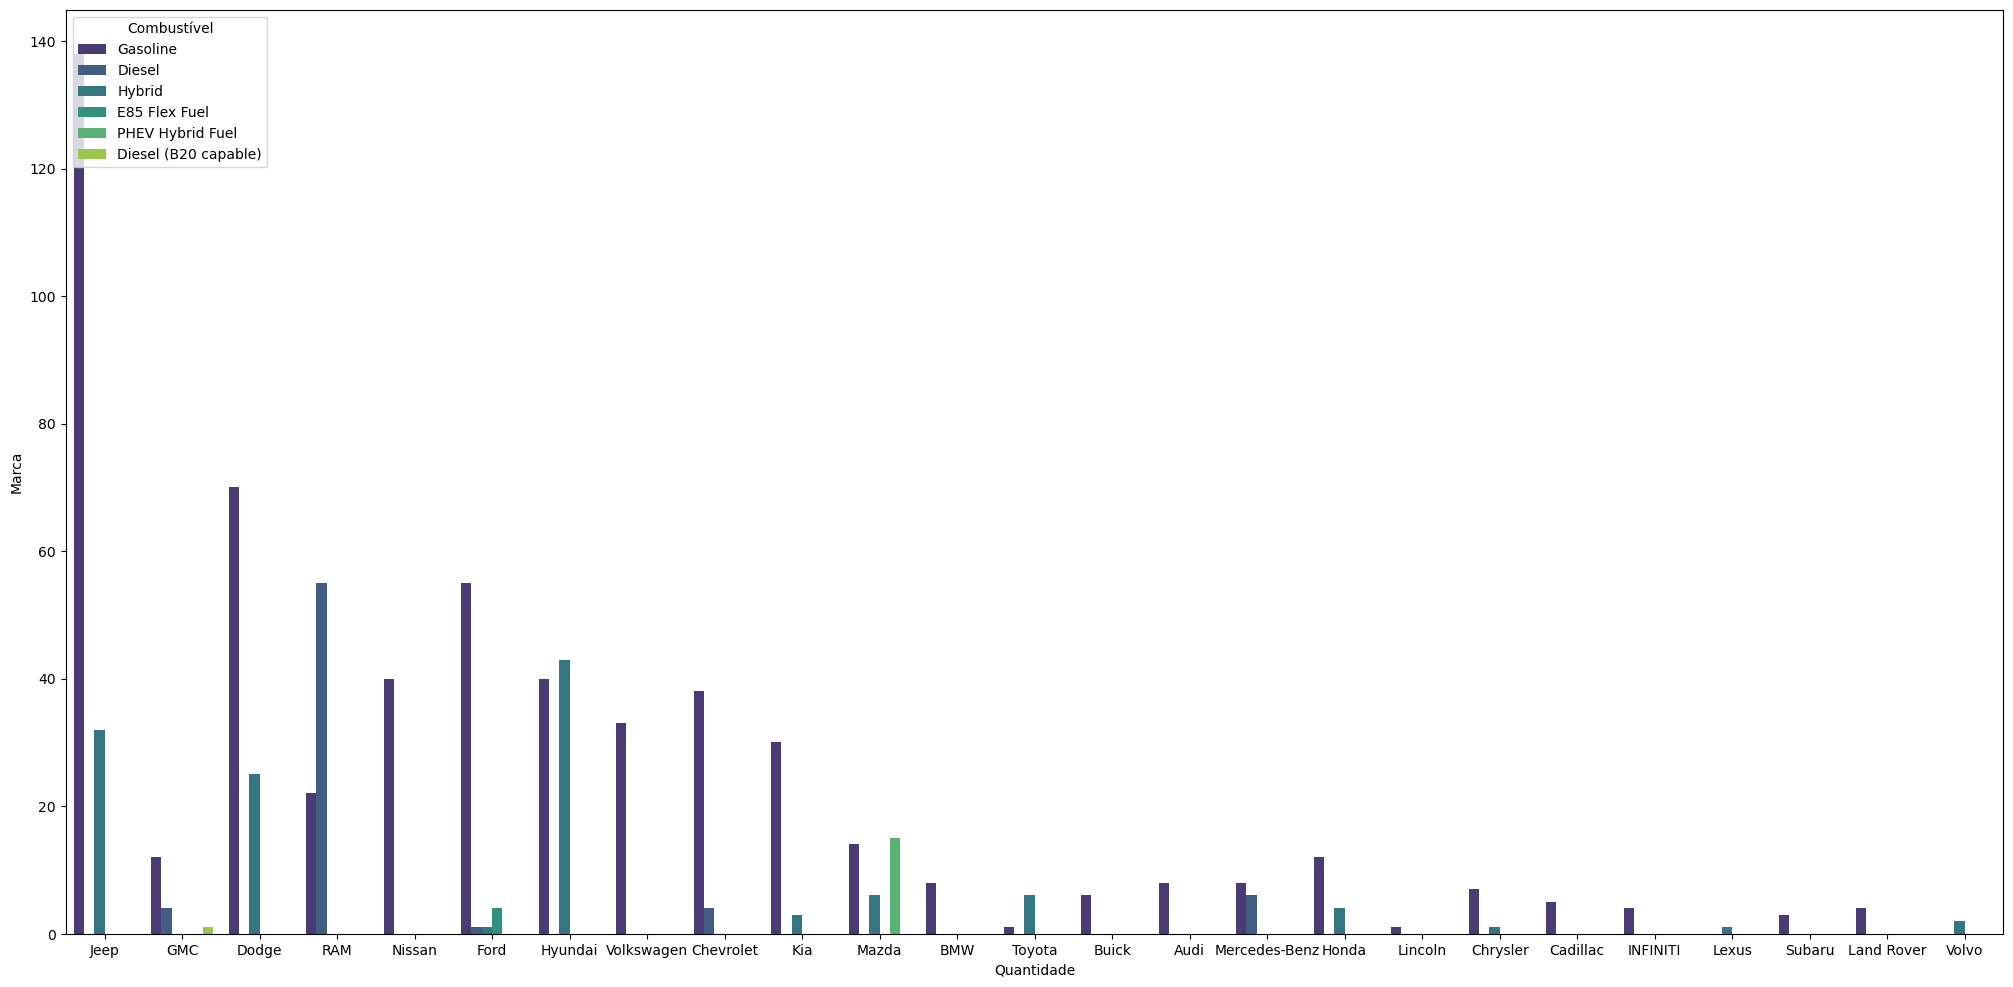

In [174]:
plt.figure(figsize=(25,12))
ax = sns.countplot(
    data=df,
    x="make",
    hue="fuel",
    palette="viridis"
)
plt.xlabel("Quantidade")
plt.ylabel("Marca")
plt.legend(title="Combustível")
plt.show()

In [175]:
df_combustivel2

,fuel,make,count
19,Gasoline,Jeep,138
13,Gasoline,Dodge,70
4,Diesel,RAM,55
14,Gasoline,Ford,55
34,Hybrid,Hyundai,43
25,Gasoline,Nissan,40
17,Gasoline,Hyundai,40
11,Gasoline,Chevrolet,38
29,Gasoline,Volkswagen,33
35,Hybrid,Jeep,32


### Agora vamos analisar a quilometragem dos veiculos, qual o preço médio de um veiculo com determinado quilometragem rodada? O fato do carro ter mais quilometragem influência no preço do carro? Quais marcas possuem veiculos com quilometragem alta? 

In [176]:
df_quilometragem = df.groupby("mileage interval")["price"].agg(["count","mean"]).reset_index().sort_values(by="mean",ascending=False)

In [177]:
df_quilometragem.dropna(inplace=True)

In [178]:
df_quilometragem

,mileage interval,count,mean
27,9369 - 9716,1,86097.000000
1,347 - 694,5,78256.800000
12,4164 - 4511,3,68292.666667
5,1735 - 2082,2,63760.000000
16,5552 - 5899,1,57000.000000
0,0 - 347,757,48667.089828
7,2429 - 2776,1,46870.000000
11,3817 - 4164,1,46000.000000
13,4511 - 4858,1,45995.000000
9,3123 - 3470,1,32750.000000


### O veiculo com mais quilometragem rodada:

In [179]:
df[df["mileage interval"] == "9369 - 9716"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
371,2023 Jeep Wagoneer L Series III,Jeep,Wagoneer L,2023,86097.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,9711.0,8-Speed Automatic,Series III,SUV,4,Riverrock Green,Sea Salt,Four-wheel Drive,9369 - 9716


### O veiculo com mais quilometragem rodada é o que detém o maior preço médio, porém como só tem ele nessa categoria de quilometragem rodada acima de 9000 é compreensível que seja o de maior preço médio

### Vamos analisar a faixa onde está a maioria dos veiculos (0 - 347):

In [180]:
df_quilometragem2 = df[df["mileage interval"] == "0 - 347"].groupby("make")["price"].agg(["count","mean"]).reset_index()

In [181]:
df_quilometragem2 = df_quilometragem2.sort_values(by="count",ascending=False)

In [182]:
df_quilometragem2

,make,count,mean
12,Jeep,166,52206.024096
6,Dodge,94,44132.372340
10,Hyundai,81,36446.728395
20,RAM,76,68814.973684
7,Ford,58,50658.896552
4,Chevrolet,42,46540.857143
19,Nissan,39,31865.717949
17,Mazda,35,54663.942857
23,Volkswagen,33,29389.030303
13,Kia,32,34819.031250


### A marca que tem mais veiculos na faixa de quilometragem entre 0 - 347 é a Jeep, portanto aquela que obtém maior preço médio é a BMW

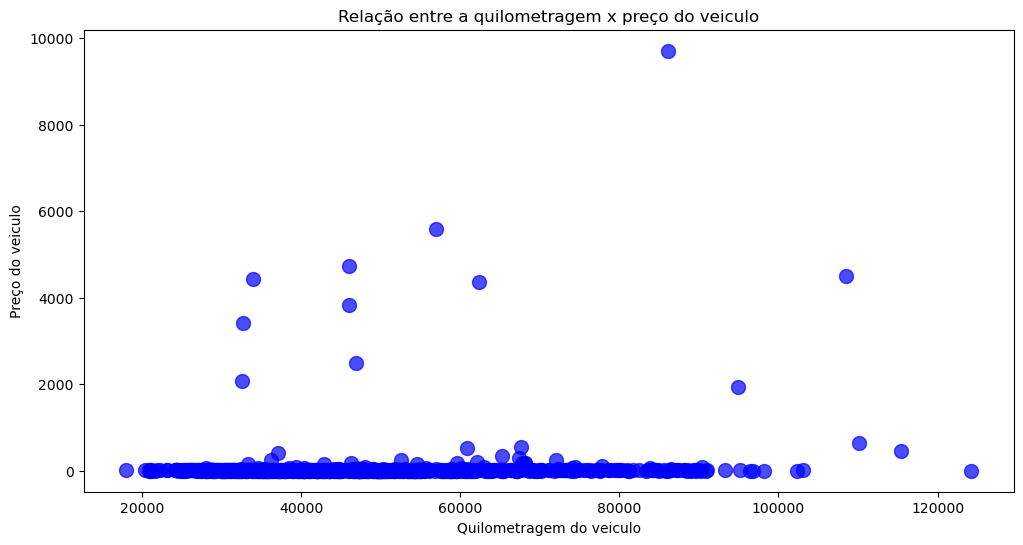

In [183]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df["price"], y=df["mileage"], color="blue", s=100, alpha=0.7)
plt.xlabel("Quilometragem do veiculo")
plt.ylabel("Preço do veiculo")
plt.title("Relação entre a quilometragem x preço do veiculo")
plt.show()

### Vamos validar essa suposição com um teste de hipótese:
### H0: A quilometragem não influencia no preço do veiculo
### H1: A quilometragem influencia no preço do veiculo
### nível de significância: 5%

### Vamos usar um teste parametrico ou não parametrico?
### Não parametrico pois nossas variáveis não apresentam uma distribuição normal

In [184]:
teste_mileage = shapiro(df["mileage"])

In [185]:
if teste_mileage.pvalue < 0.05 and teste_price.pvalue < 0.05:
    print("Nossas variáveis não seguem uma distribuição normal")

Nossas variáveis não seguem uma distribuição normal


In [186]:
coeficiente, p_valor = spearmanr(df["mileage"],df["price"])

In [187]:
if p_valor < 0.05:
    print("Rejeitamos a H0 e aceitamos nossa H1, ou seja a quilometragem do veiculo influencia no preço do veiculo")
else:
    print("Não temos evidencias para rejeitar H0, portanto ela é verdadeira")

Rejeitamos a H0 e aceitamos nossa H1, ou seja a quilometragem do veiculo influencia no preço do veiculo


In [188]:
coeficiente

0.07720939760112203

### Portanto nosso coeficiente apresenta uma correlação fraca entre as variáveis
### Ou seja a quilometragem pode até influenciar no preço do veiculo, porem em poucos casos e extremos

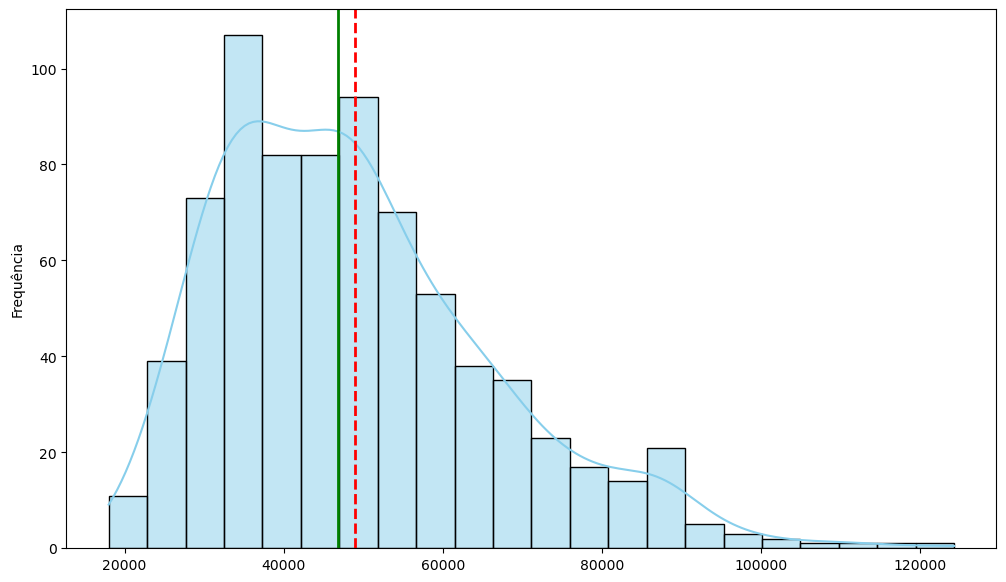

In [189]:
plt.figure(figsize=(12, 7))
media_price = df["price"].mean()
mediana_price = df["price"].median()
sns.histplot(data=df, x="price", kde=True, color="skyblue")
plt.axvline(
    x=media_price,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Média: {media_price:.2f}"
)
plt.axvline(
    x=mediana_price,
    color="green",
    linestyle="-",
    linewidth=2,
    label=f"Mediana: {mediana_price:.2f}"
)
plt.ylabel("Frequência")
plt.xlabel("")
plt.show()

### Analisando o qual perto nossa mediana está sobre a média da variável price

### Vamos analisar agora os tipos de carroceria dos veiculos

In [190]:
df_carroceria = df.groupby("body")["price"].agg(["count","mean"]).reset_index()

In [191]:
df_carroceria

,body,count,mean
0,Cargo Van,30,57324.533333
1,Convertible,1,38040.000000
2,Hatchback,6,41418.500000
3,Minivan,1,45300.000000
4,Passenger Van,11,49651.545455
5,Pickup Truck,146,60944.719178
6,SUV,531,46742.858757
7,Sedan,47,33260.425532


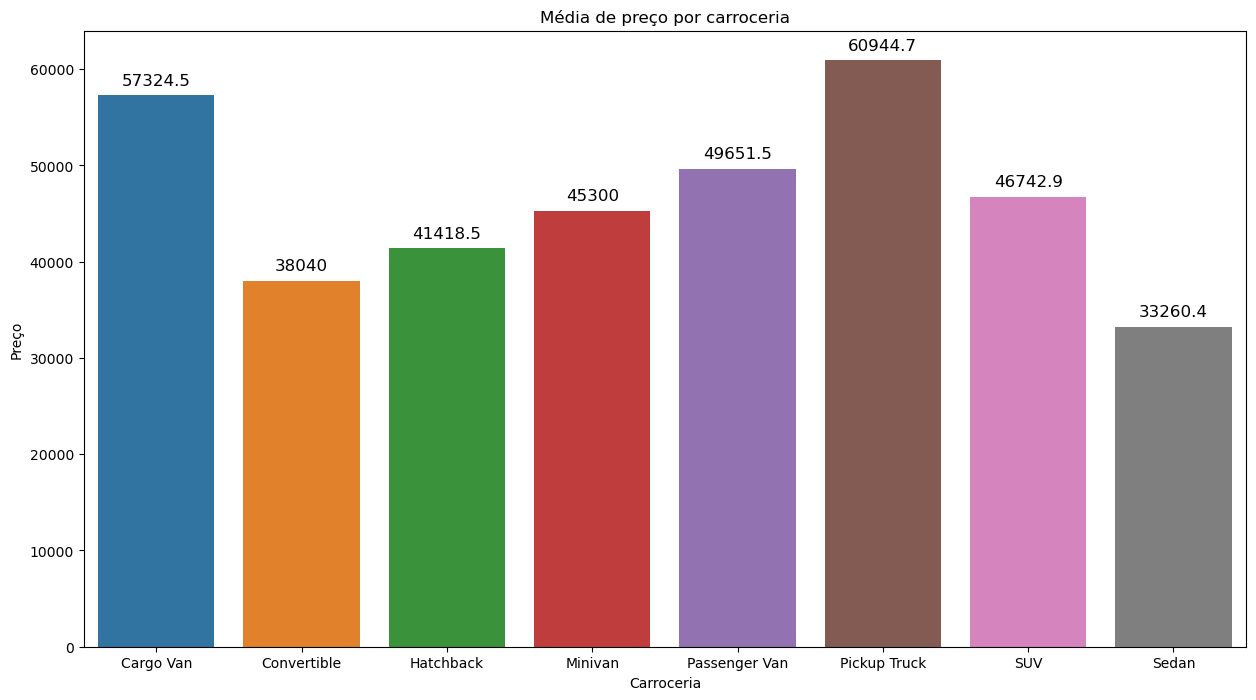

In [192]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df_carroceria["body"], y=df_carroceria["mean"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.ylabel("Preço")
plt.xlabel("Carroceria")
plt.title("Média de preço por carroceria")
plt.show()

In [193]:
df_carroceria2 = df.groupby(["body","make"])["price"].agg(["count","mean"])

In [194]:
df_carroceria3 = df_carroceria2.pivot_table(index="make",columns="body",values="count")

In [195]:
df_carroceria3 = df_carroceria3.reset_index()

In [196]:
df_carroceria3.fillna(0,inplace=True)

In [197]:
df_carroceria3.index.name = "index"

In [198]:
df_carroceria3

body,make,Cargo Van,Convertible,Hatchback,Minivan,Passenger Van,Pickup Truck,SUV,Sedan
index,,,,,,,,,
0,Audi,0.0,0.0,3.0,0.0,0.0,0.0,4.0,1.0
1,BMW,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0
2,Buick,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
3,Cadillac,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,Chevrolet,0.0,0.0,0.0,0.0,0.0,27.0,15.0,0.0
5,Chrysler,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0
6,Dodge,0.0,0.0,0.0,0.0,0.0,0.0,89.0,6.0
7,Ford,12.0,0.0,0.0,0.0,0.0,6.0,43.0,0.0
8,GMC,1.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0


In [199]:
df_insight = df.groupby("make")["price"].count().reset_index()

In [200]:
df_insight.rename(columns={"make":"Marca","price":"Quantidade"},inplace=True)
df_insight["Percentual"] = round((df_insight["Quantidade"] * 100) / df.shape[0],2)
df_insight

,Marca,Quantidade,Percentual
0,Audi,8,1.03
1,BMW,8,1.03
2,Buick,6,0.78
3,Cadillac,5,0.65
4,Chevrolet,42,5.43
5,Chrysler,8,1.03
6,Dodge,95,12.29
7,Ford,61,7.89
8,GMC,17,2.20
9,Honda,16,2.07


### Só a marca Jeep representa com 22% de todos os veiculos, juntamente com a Dodge com seus 12% e a Hyundai com 10% só essas 3 marcas juntas detém quase 50% de todos os veiculos

In [201]:
df_insight1 = df.groupby("year")["price"].count().reset_index()

In [202]:
df_insight1.rename(columns={"year":"Ano","price":"Quantidade"},inplace=True)
df_insight1["Percentual"] = round((df_insight1["Quantidade"] * 100) / df.shape[0],2)
df_insight1

,Ano,Quantidade,Percentual
0,2023,64,8.28
1,2024,705,91.20
2,2025,4,0.52


### 90% dos veiculos são do ano de 2024

In [203]:
df_insight2 = df.groupby("year")["price"].sum().reset_index()

In [204]:
df_insight2.rename(columns={"year":"Ano","price":"ValorTotal"},inplace=True)
df_insight2

,Ano,ValorTotal
0,2023,3178445.0
1,2024,34475621.0
2,2025,225315.0


### Veiculos do ano de 2024 somam um valor total de 34.475.621,0 milhões de doláres

In [205]:
df_insight3 = df.groupby("year")["price"].mean().reset_index()

In [206]:
df_insight3.rename(columns={"year":"Ano","price":"MédiadePreço"},inplace=True)
df_insight3

,Ano,MédiadePreço
0,2023,49663.203125
1,2024,48901.590071
2,2025,56328.750000


### Portanto a média de preço dos veiculos do ano de 2025 são maiores que os outros anos

In [207]:
df_insight4 = df.groupby("cylinders")["price"].count().reset_index()

In [208]:
df_insight4.rename(columns={"cylinders":"Cilindrada","price":"Quantidade"},inplace=True)
df_insight4["Percentual"] = round((df_insight4["Quantidade"] * 100) / df.shape[0],2)
df_insight4

,Cilindrada,Quantidade,Percentual
0,3.0,24,3.10
1,4.0,436,56.40
2,6.0,236,30.53
3,8.0,77,9.96


### Nos motores dos veiculos 56% são colocados cilindradas de 4.0, enquanto a fabricação de motores com 3.0 de cilindradas representa apenas 3%

In [209]:
df_insight5 = df.groupby(["cylinders","make"])["price"].count().reset_index()
df_insight5.rename(columns={"make":"Marca","cylinders":"Cilindrada","price":"Quantidade"},inplace=True)
df_insight5["Percentual"] = round((df_insight5["Quantidade"] * 100) / df.shape[0],2)
df_insight5.sort_values(by="Quantidade",ascending=False)

,Cilindrada,Marca,Quantidade,Percentual
37,6.0,Jeep,85,11.00
15,4.0,Jeep,85,11.00
13,4.0,Hyundai,81,10.48
43,6.0,RAM,67,8.67
9,4.0,Dodge,56,7.24
25,4.0,Volkswagen,33,4.27
20,4.0,Mazda,33,4.27
16,4.0,Kia,32,4.14
47,8.0,Dodge,29,3.75
33,6.0,Ford,23,2.98


### Só a Jeep e Hyundai contribui com 21% de toda a fabricação de motores com 4.0 cilindradas

In [210]:
df_insight5[df_insight5["Cilindrada"] == 3.0]

,Cilindrada,Marca,Quantidade,Percentual
0,3.0,Buick,3,0.39
1,3.0,Chevrolet,2,0.26
2,3.0,Ford,15,1.94
3,3.0,Nissan,4,0.52


### Enquanto somente marcas como Buick, Chevrolet, Ford e Nissan fabricam motores com 3.0 cilindradas

In [211]:
df_insight6 = df.groupby(["fuel"])["price"].count().reset_index()
df_insight6.rename(columns={"fuel":"Combustível","price":"Quantidade"},inplace=True)
df_insight6["Percentual"] = round((df_insight6["Quantidade"] * 100) / df.shape[0],2)
df_insight6.sort_values(by="Quantidade",ascending=False)

,Combustível,Quantidade,Percentual
3,Gasoline,559,72.32
4,Hybrid,124,16.04
0,Diesel,70,9.06
5,PHEV Hybrid Fuel,15,1.94
2,E85 Flex Fuel,4,0.52
1,Diesel (B20 capable),1,0.13


### 72% dos veiculos são do tipo de combustível gasolina, enquanto veiculos híbridos representam apenas de 16%

In [212]:
df_insight7 = df.groupby(["body"])["price"].count().reset_index()
df_insight7.rename(columns={"body":"Carroceria","price":"Quantidade"},inplace=True)
df_insight7["Percentual"] = round((df_insight7["Quantidade"] * 100) / df.shape[0],2)
df_insight7.sort_values(by="Quantidade",ascending=False)

,Carroceria,Quantidade,Percentual
6,SUV,531,68.69
5,Pickup Truck,146,18.89
7,Sedan,47,6.08
0,Cargo Van,30,3.88
4,Passenger Van,11,1.42
2,Hatchback,6,0.78
1,Convertible,1,0.13
3,Minivan,1,0.13


### 68% dos veiculos são do tipo SUV, as únicas marcas que não fabricam modelos de veiculos SUV são: 
### RAM, Subaru e Chrysler

In [213]:
df_carroceria3[["make","SUV"]][df_carroceria3["SUV"] == 0]

body,make,SUV
index,,
5,Chrysler,0.0
20,RAM,0.0
21,Subaru,0.0


# Modelo Preditivo

### Certo chegamos na etapa de construirmos nosso modelo preditivo, nosso objetivo vai ser através de nossos coeficientes treinados prever novos preços de veiculos.

### Vamos identificar se nossas variáveis quantitativas seguem uma distribuição normal, através de um teste estastístico (teste de shapiro) onde temos nossas hipóteses:

### H0: Nossos dados seguem uma distribuição normal
### H1: Nossos dados não seguem uma distribuição normal

### nível de significância 5% (0,05)

In [214]:
for coluna in df.columns:
    if df[coluna].dtype == "float64" or df[coluna].dtype == "int64":
        teste = shapiro(df[coluna])
        if teste.pvalue > 0.05:
            print(f"Nossa variável {coluna} assume uma distribuição normal")
        else:
            print(f"Nossa variável {coluna} não assume uma distribuição normal")

Nossa variável year não assume uma distribuição normal
Nossa variável price não assume uma distribuição normal
Nossa variável cylinders não assume uma distribuição normal
Nossa variável mileage não assume uma distribuição normal
Nossa variável doors não assume uma distribuição normal


### Certo por conta disso vamos ter que usar um teste de correlação não parametrico entre as variáveis, para medir a força e direção entre duas variáveis

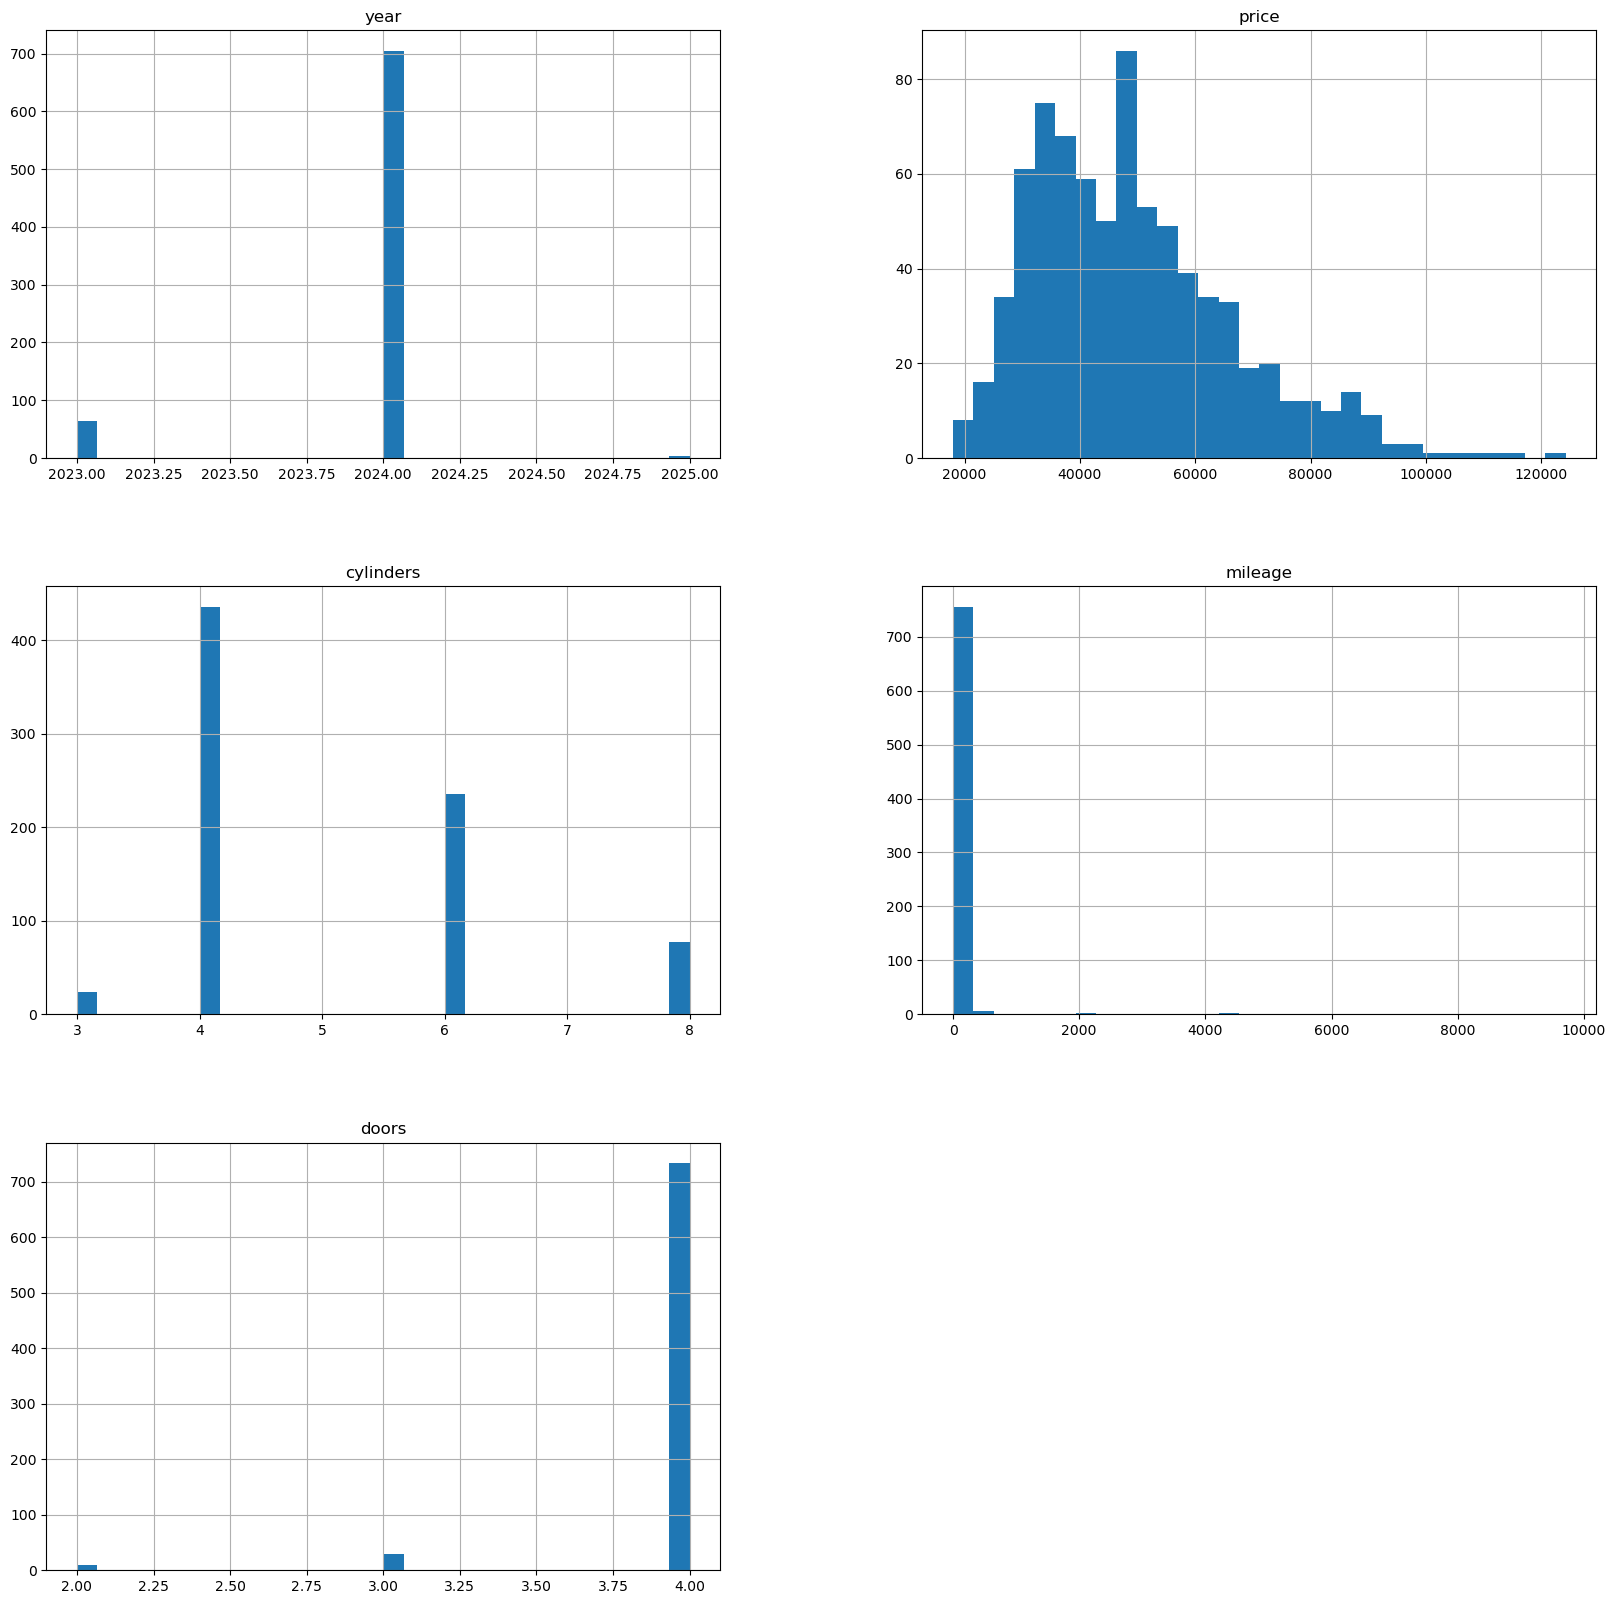

In [215]:
df.hist(bins=30,figsize=(20,20))
plt.show()

<AxesSubplot:>

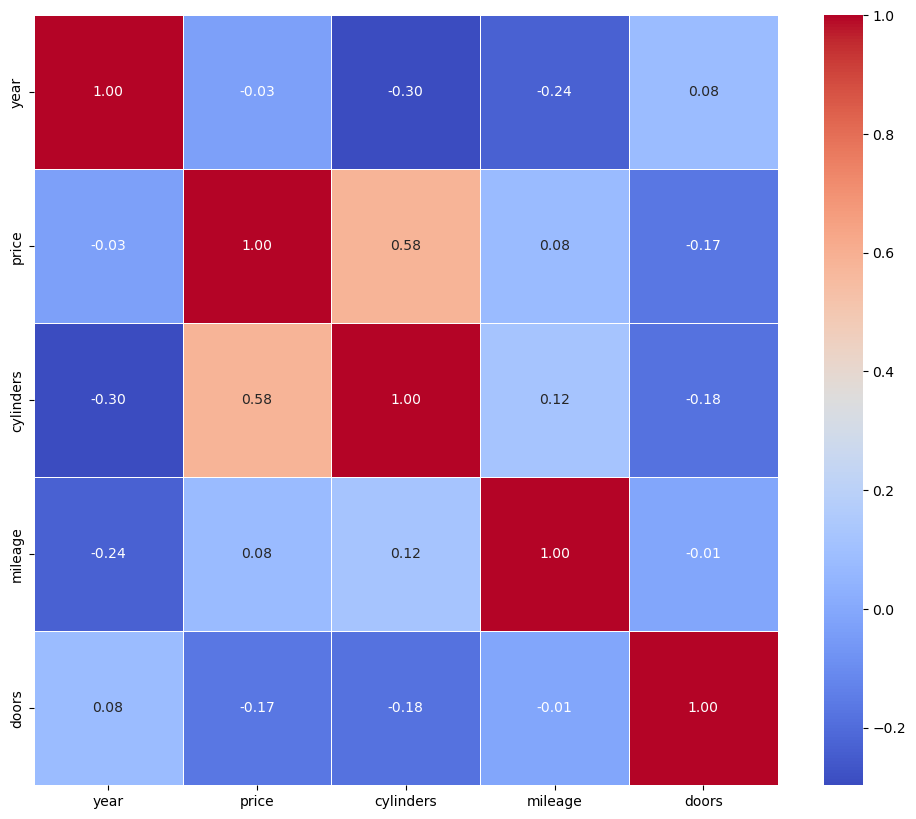

In [216]:
corr_matrix = df.corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

### Certo aqui só estamos visualizando a correlação entre as variáveis quantitativas, porém e nossas variáveis qualitativas (categoricas)? Bom para podermos conseguir visualizar a correlação entre elas também, vamos usar uma técnica de transformação de variável categorica para númerica, portanto mantendo a informação da variável, vamos usar o Label Encoder, seria uma opção utilizarmos o One Hot Enconding, porém como temos muitos valores distintos nas variáveis qualitativas ficaria com uma quantidade muito grande de colunas

## 1° Modelo

In [217]:
transformador = LabelEncoder() #Transformador

In [218]:
df_modelo = df.copy()

In [219]:
#Transformando variáveis categoricas em numericas
df_modelo["make"] = transformador.fit_transform(df_modelo["make"])
df_modelo["fuel"] = transformador.fit_transform(df_modelo["fuel"])
df_modelo["transmission"] = transformador.fit_transform(df_modelo["transmission"])
df_modelo["body"] = transformador.fit_transform(df_modelo["body"])
df_modelo["drivetrain"] = transformador.fit_transform(df_modelo["drivetrain"])

<AxesSubplot:>

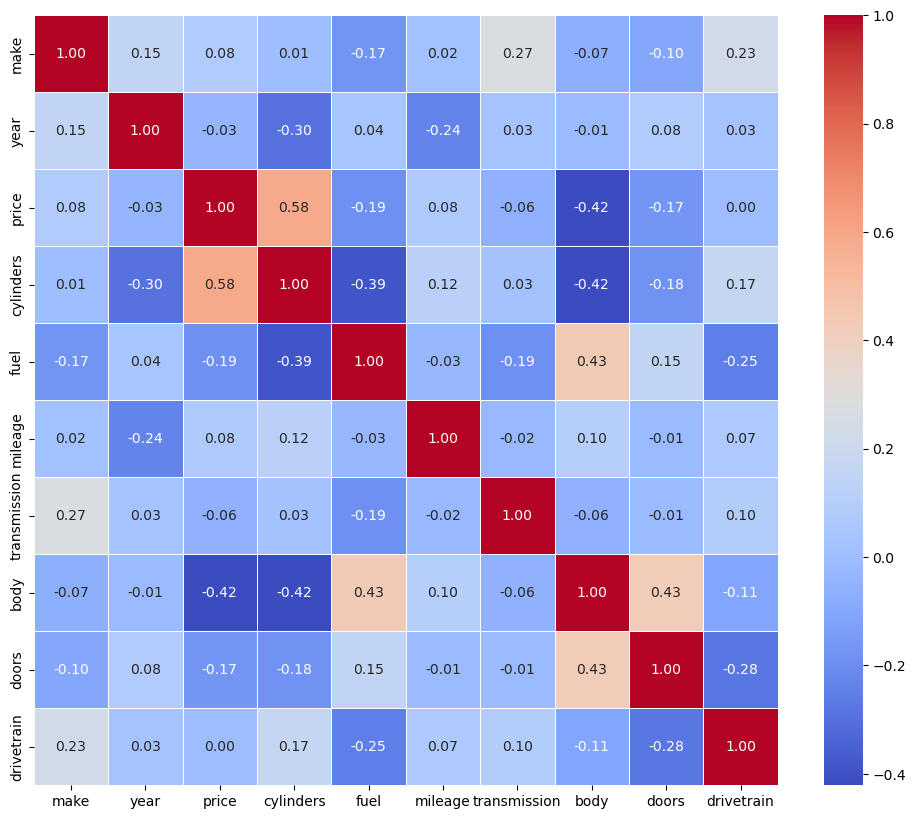

In [220]:
corr_matrix = df_modelo.corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

In [221]:
df_modelo.head(5) #Exibindo o dataframe que vamos usar no modelo

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,mileage interval
0,2024 Jeep Wagoneer Series II,12,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,3,10.0,15,Series II,6,4,White,Global Black,1,0 - 347
1,2024 Jeep Grand Cherokee Laredo,12,Grand Cherokee,2024,50170.0,OHV,6.0,3,1.0,15,Laredo,6,4,Metallic,Global Black,1,0 - 347
2,2024 GMC Yukon XL Denali,8,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,3,0.0,27,Denali,6,4,Summit White,Teak/Light Shale,1,0 - 347
3,2023 Dodge Durango Pursuit,6,Durango,2023,46835.0,16V MPFI OHV,8.0,3,32.0,15,Pursuit,6,4,White Knuckle Clearcoat,Black,0,0 - 347
4,2024 RAM 3500 Laramie,20,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,0,10.0,7,Laramie,5,4,Silver,Black,1,0 - 347


### Separando nossas variáveis independentes e nossa variável dependente (target)

In [222]:
x = df_modelo[["make","year","cylinders","fuel","mileage","transmission","body","doors","drivetrain"]]
Y = df_modelo["price"]

In [223]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, Y, test_size=0.20,random_state=42) #Separando os dados de treino e teste

In [224]:
X_const_treino = sm.add_constant(X_treino)
X_const_teste = sm.add_constant(X_teste)

In [225]:
modelo_sm = sm.OLS(Y_treino, X_const_treino).fit() #Treinando o modelo

In [226]:
print(modelo_sm.summary()) #Visualizando as metricas do modelo

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     39.34
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.41e-55
Time:                        23:07:03   Log-Likelihood:                -6760.5
No. Observations:                 618   AIC:                         1.354e+04
Df Residuals:                     608   BIC:                         1.359e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.104e+07   4.33e+06     -4.859   

In [227]:
modelo_sk = LinearRegression()

In [228]:
modelo_sk.fit(X_treino,Y_treino) #Treinando o modelo

LinearRegression()

In [229]:
modelo_sk.coef_ #Visualizando os coeficientes do modelo

array([ 1.97720981e+02,  1.04105752e+04,  6.38262438e+03, -3.42772751e+03,
        3.08207021e+00, -1.91130284e+02, -1.22710173e+03,  1.94106070e+03,
       -2.33946813e+03])

In [230]:
modelo_sk.intercept_ #Visualizando a constante da equação de regressão

-21041123.829300653

In [231]:
modelo_sk.score(X_treino,Y_treino) #Metricas do modelo de treino

0.3680497731882104

In [232]:
modelo_sk.score(X_teste,Y_teste) #Metricas do modelo de teste

0.3885073537416508

### Certo de primeira instância usamos o algoritmo regressão linear de duas bibliotecas diferentes, uma da stats model e outra da sklearn e analisando os resultados vemos que como primeiro modelo ele não perfomou bem, tanto que nosso R2 (coeficiente de determinação) deu um valor baixo, indicando que nossas variáveis independentes explicam apenas 36% da variabilidade de nossa variável dependente (target), portanto nossos p-valor de algumas variáveis independentes estão indicando pra gente que não devemos aceitar elas no nosso modelo de regressão, são elas: "make" e "doors".

## 2° Modelo

In [233]:
x1 = df_modelo[["year","cylinders","fuel","mileage","transmission","body","drivetrain"]]
Y1 = df_modelo["price"]

In [234]:
X_treino1, X_teste1, Y_treino1, Y_teste1 = train_test_split(x1, Y1, test_size=0.20,random_state=42)

In [235]:
X_const_treino1 = sm.add_constant(X_treino1)
X_const_teste1 = sm.add_constant(X_teste1)

In [236]:
modelo_sm1 = sm.OLS(Y_treino1, X_const_treino1).fit()

In [237]:
print(modelo_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     49.94
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.92e-56
Time:                        23:07:05   Log-Likelihood:                -6762.4
No. Observations:                 618   AIC:                         1.354e+04
Df Residuals:                     610   BIC:                         1.358e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.228e+07   4.29e+06     -5.198   

In [238]:
modelo_sk1 = LinearRegression()

In [239]:
modelo_sk1.fit(X_treino1,Y_treino1)

LinearRegression()

In [240]:
modelo_sk1.coef_

array([ 1.10256283e+04,  6.30430775e+03, -3.78821967e+03,  3.14560267e+00,
       -1.56770840e+02, -9.72046946e+02, -2.31954631e+03])

In [241]:
modelo_sk1.intercept_

-22276535.48680638

In [242]:
modelo_sk1.score(X_treino1,Y_treino1)

0.36431730400317797

In [243]:
modelo_sk1.score(X_teste1,Y_teste1)

0.39212159658205237

### Certo não tivemos um avanço significativo, as metricas se manteram quase as mesmas, porém nenhuma de nossas variáveis independentes recusou nosso modelo de regressão. Agora vamos construir outro modelo, porém removendo os outliers que tinhamos encontrados na Analise Exploratoria

## 3° Modelo

<AxesSubplot:>

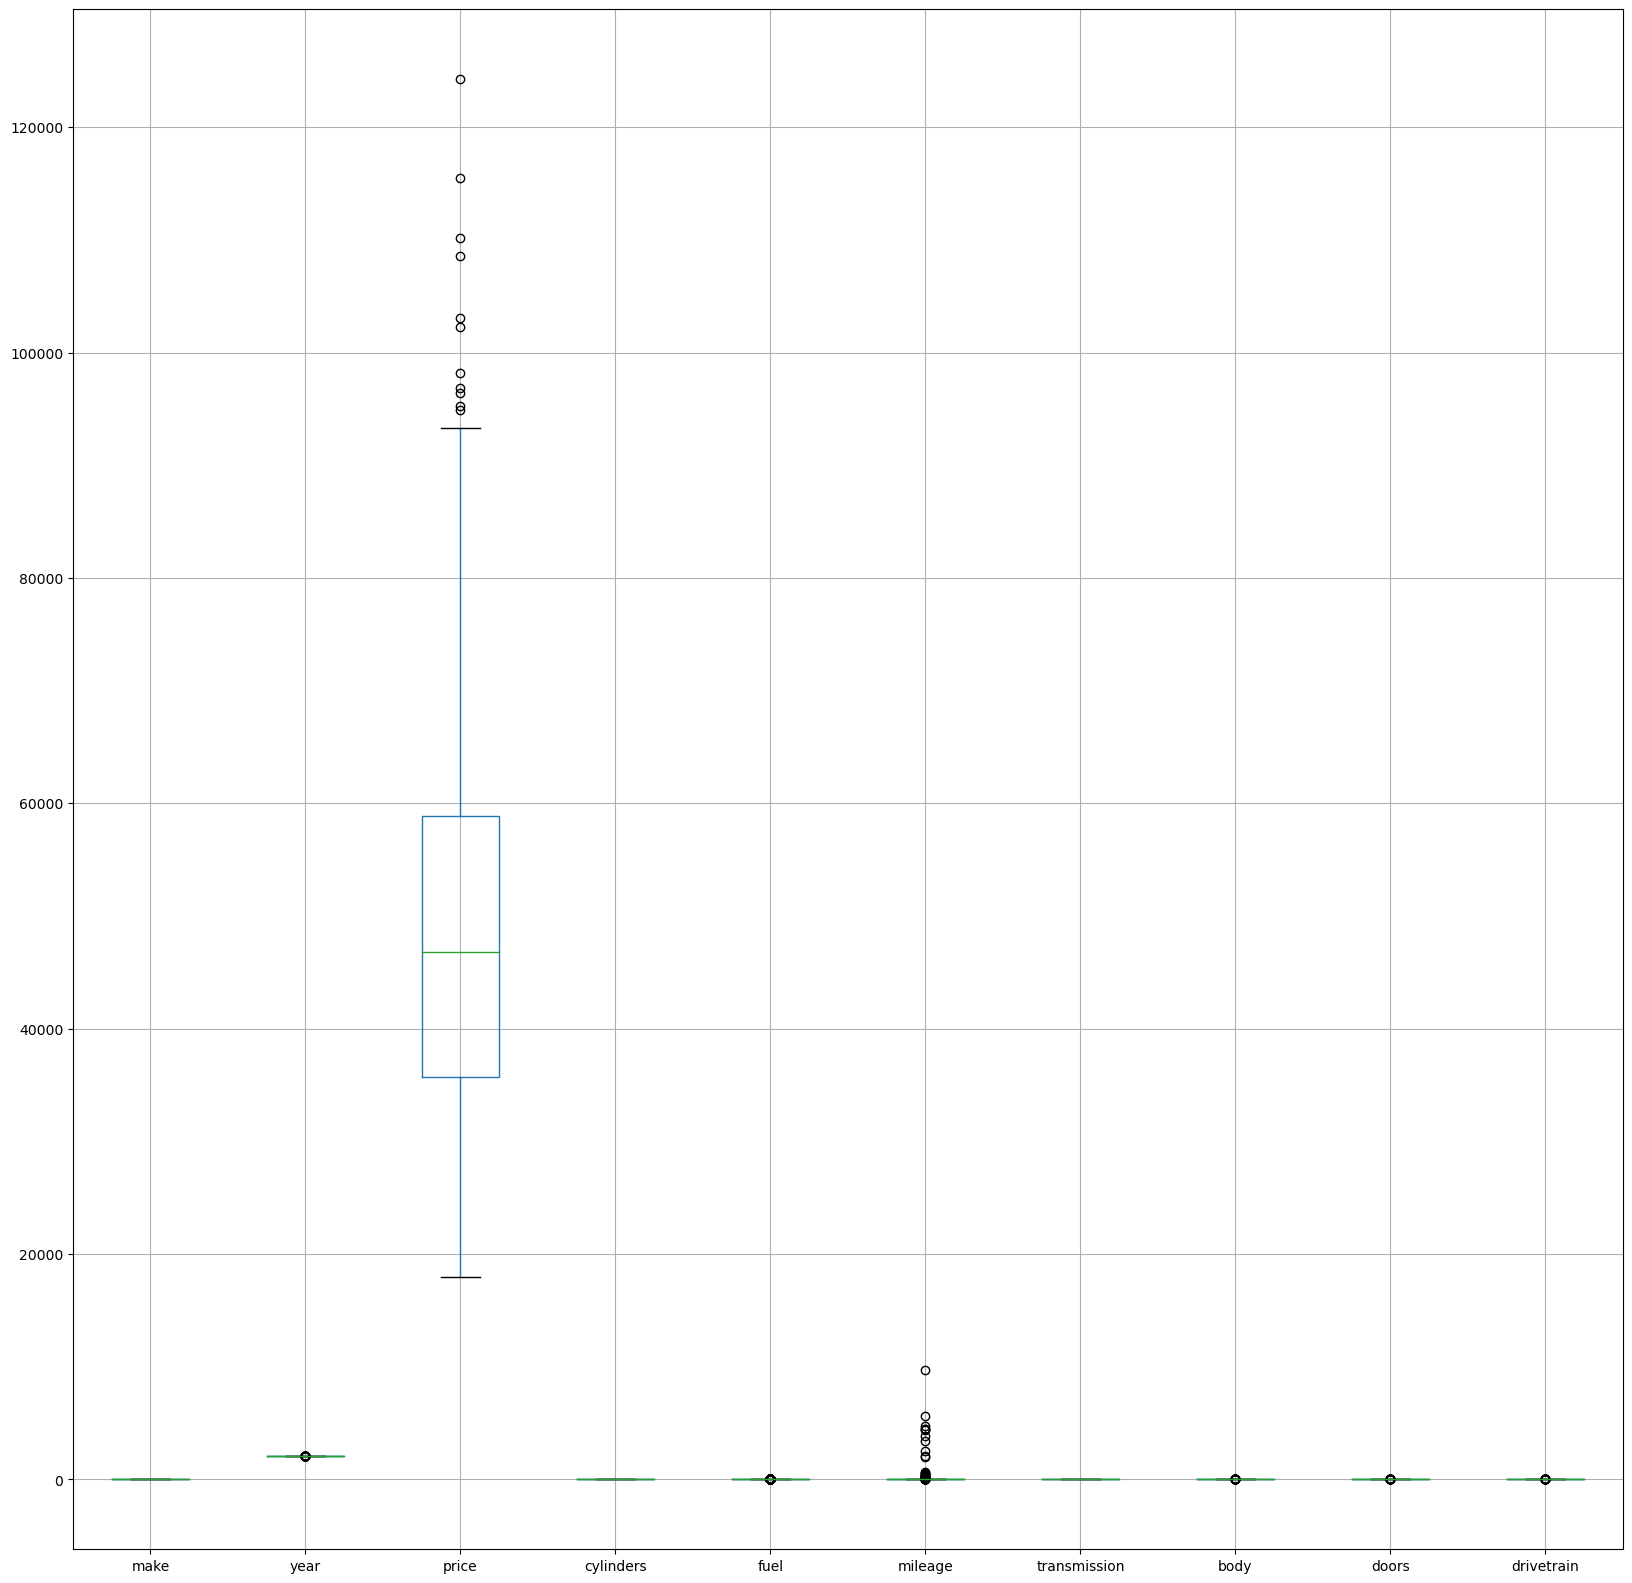

In [244]:
df_modelo.boxplot(figsize=(20,20))

In [245]:
# Valor extremo da variável price
formula_price

93575.5

In [246]:
# Valor extremo da variável mileage
formula_mileage

26.5

In [247]:
drop_price = df_extremos_price.index # Registros para remover da variável price
drop_mileage = df_extremos_mileage.index # Registros para remover da variável mileage
drop_outliers = set(drop_mileage) | set(drop_price) # Juntando todos os registros para remover de ambas as variáveis
drop_outliers = list(drop_outliers)

In [248]:
df_modelo.drop(drop_outliers,inplace=True) #Removendo do nosso dataframe de modelo
df.drop(drop_outliers,inplace=True) #Removendo de nosso dataframe principal

In [249]:
x2 = df_modelo[["year","cylinders","fuel","mileage","transmission","body","drivetrain"]]
Y2 = df_modelo["price"]

In [250]:
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(x2, Y2, test_size=0.20,random_state=42)

In [251]:
X_const_treino2 = sm.add_constant(X_treino2)
X_const_teste2 = sm.add_constant(X_teste2)

In [252]:
modelo_sm2 = sm.OLS(Y_treino2, X_const_treino2).fit()

In [253]:
print(modelo_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     50.97
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.29e-55
Time:                        23:07:09   Log-Likelihood:                -5941.4
No. Observations:                 547   AIC:                         1.190e+04
Df Residuals:                     539   BIC:                         1.193e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.305e+07   4.59e+06     -5.027   

### Certo ainda não atingimos métricas aceitáveis portanto vamos fazer mais um treinamento de mais um modelo porém sem a variável "transmission"

## 4° Modelo

In [254]:
x3 = df_modelo[["year","cylinders","fuel","mileage","body","drivetrain"]]
Y3 = df_modelo["price"]

In [255]:
X_treino3, X_teste3, Y_treino3, Y_teste3 = train_test_split(x3, Y3, test_size=0.20,random_state=42)

In [256]:
X_const_treino3 = sm.add_constant(X_treino3)
X_const_teste3 = sm.add_constant(X_teste3)

In [257]:
modelo_sm3 = sm.OLS(Y_treino3, X_const_treino3).fit()

In [258]:
print(modelo_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     58.09
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.29e-55
Time:                        23:07:11   Log-Likelihood:                -5944.1
No. Observations:                 547   AIC:                         1.190e+04
Df Residuals:                     540   BIC:                         1.193e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.35e+07    4.6e+06     -5.109      0.0

### Por enquanto o 3° modelo é o que melhor explica a variabilidade da variável preditora (price), vamos agora fazer um modelo somente com as variáveis númericas que não passaram por transformação de categorica para númerica

## 5° Modelo

In [259]:
x4 = df_modelo[["year","cylinders","mileage",]]
Y4 = df_modelo["price"]

In [260]:
X_treino4, X_teste4, Y_treino4, Y_teste4 = train_test_split(x4, Y4, test_size=0.20,random_state=42)

In [261]:
X_const_treino4 = sm.add_constant(X_treino4)
X_const_teste4 = sm.add_constant(X_teste4)

In [262]:
modelo_sm4 = sm.OLS(Y_treino4, X_const_treino4).fit()

In [263]:
print(modelo_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     90.72
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.34e-47
Time:                        23:07:12   Log-Likelihood:                -5969.2
No. Observations:                 547   AIC:                         1.195e+04
Df Residuals:                     543   BIC:                         1.196e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.502e+07   4.74e+06     -5.277      0.0

### O 5° modelo foi o pior em termos de métricas, vamos seguir adiante com o 3° modelo e fazer a avaliação do mesmo e as previsões, vamos até usar a biblioteca Sklearn para fazer o treinamento do 3° modelo também

In [264]:
modelo_sk2 = LinearRegression()
modelo_sk2.fit(X_treino2,Y_treino2)

LinearRegression()

In [265]:
modelo_sk2.intercept_

-23053126.15300222

In [266]:
modelo_sk2.coef_

array([11408.62067581,  6358.29534691, -2949.72404901,   244.3797068 ,
        -153.42836329, -1483.33545393, -3258.29748605])

In [267]:
modelo_sk2.score(X_treino2,Y_treino2)

0.3983070354021788

In [268]:
modelo_sk2.score(X_teste2,Y_teste2)

0.387218493542676

In [269]:
print(modelo_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     50.97
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.29e-55
Time:                        23:07:13   Log-Likelihood:                -5941.4
No. Observations:                 547   AIC:                         1.190e+04
Df Residuals:                     539   BIC:                         1.193e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.305e+07   4.59e+06     -5.027   

In [270]:
Y_previsto_sm2 = modelo_sm2.predict(X_const_teste2) #Previsões do price com o modelo StatsModels

In [271]:
Y_previsto_sk2 = modelo_sk2.predict(X_teste2) #Previsões do price com o modelo Sklearn

In [272]:
sqe_sm2 = mean_squared_error(Y_teste2,Y_previsto_sm2) #Soma do quadrado dos erros do modelo StatsModels

In [273]:
sqe_sk2 = mean_squared_error(Y_teste2,Y_previsto_sk2) #Soma do quadrado dos erros do modelo Sklearn

In [274]:
print(f"Soma do quadrado dos erros do modelo do Stats Models {sqe_sm2:.8f}")
print(f"Soma do quadrado dos erros do modelo do Sklearn {sqe_sk2:.8f}")

Soma do quadrado dos erros do modelo do Stats Models 149749606.66056401
Soma do quadrado dos erros do modelo do Sklearn 149749606.66056284


### Soma do quadrado dos erros deu um valor bem alto, indicando que nosso Y estimado está bem longe do Y observado

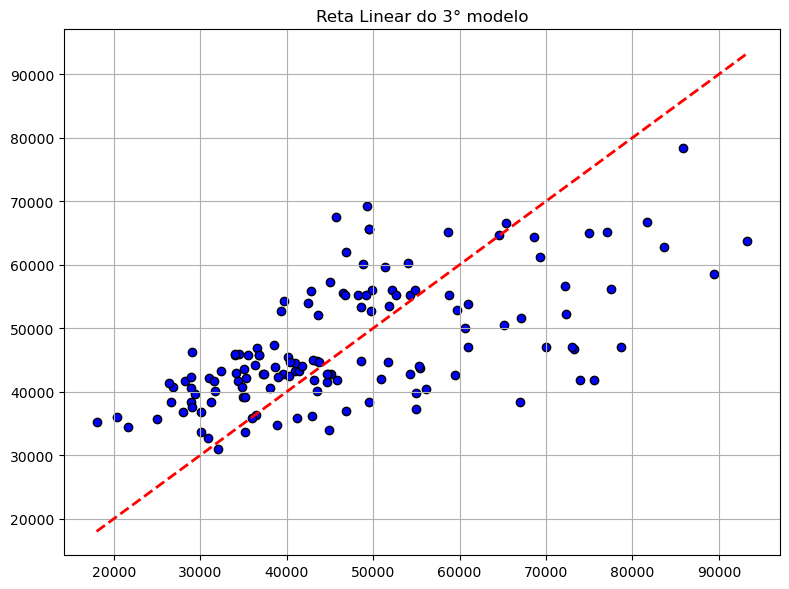

In [275]:
# Avaliando o modelo pela reta linear
plt.figure(figsize=(8, 6))
plt.scatter(Y_teste2, Y_previsto_sm2, color='blue', edgecolors='k')
plt.plot([Y_teste2.min(), Y_teste2.max()], [Y_teste2.min(), Y_teste2.max()], 'r--', lw=2)
plt.xlabel("")
plt.ylabel("")
plt.title("Reta Linear do 3° modelo")
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculando os residuos do 3° Modelo

In [276]:
Y_previsto_sk2 = pd.DataFrame(Y_previsto_sk2)
Y_previsto_sm2 = pd.DataFrame(Y_previsto_sm2)

In [277]:
modelo2_erros = Y_previsto_sm2.copy()
modelo2_erros["Y observado"] = Y_teste2
modelo2_erros.rename(columns = {0:"Y estimado"},inplace=True)
modelo2_erros["Y estimado"] = round(modelo2_erros["Y estimado"],2)
modelo2_erros["Erros"] = (modelo2_erros["Y observado"] - modelo2_erros["Y estimado"])

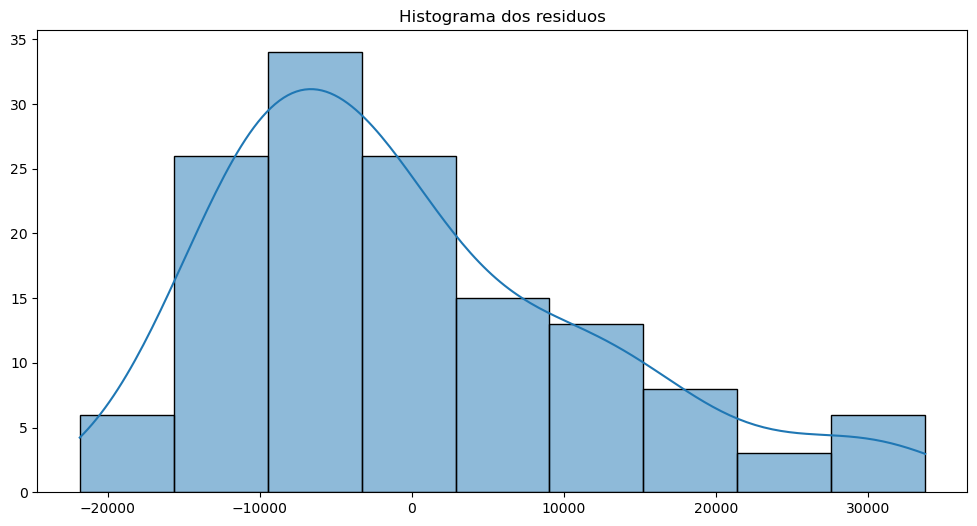

In [278]:
plt.figure(figsize=(12,6))
sns.histplot(x=modelo2_erros["Erros"],kde=True)
plt.title("Histograma dos residuos")
plt.xlabel("")
plt.ylabel("")
plt.show()

### Os residuos são quanto o modelo erros em cada previsão (Y observado - Y estimado) diferente do SQE (soma do quadrado dos erros) que mede um pontuação geral de quando o modelo errou

### Certo nenhum de nossos modelos teve uma boa performarce, por causa disso vamos retomar a parte de transformação dos dados para o modelo, utilizando de outra técnica (One Hot Enconding) que consiste transformar uma coluna categorica em colunas binárias de acordo com os seus valores distintos

## 6° Modelo

In [279]:
categorias_body = df["body"].value_counts() # Registros agrupados de toda a coluna
limiar_body = 10 # Define um limiar (corte) para separar registros mais frequentes
categorias_frequentes_body =  categorias_body[categorias_body > limiar_body].index # Separando por registros mais frequentes
df["body group"] = np.where(df["body"].isin(categorias_frequentes_body),df["body"],"Outros") # Criando uma nova variável
# Aqueles registros que não entraram como mais frequente se transforma em um grupo de "Outros"

In [280]:
categorias_transmission = df["transmission"].value_counts()
limiar_transmission = 10
categorias_frequentes_transmission = categorias_transmission[categorias_transmission > limiar_transmission].index
df["transmission group"] = np.where(df["transmission"].isin(categorias_frequentes_transmission), df["transmission"],"Outros")

In [281]:
categorias_trim = df["trim"].value_counts()
limiar_trim = 25
categorias_frequentes_trim = categorias_trim[categorias_trim >= limiar_trim].index
df["trim group"] = np.where(df["trim"].isin(categorias_frequentes_trim), df["trim"],"Outros")

In [282]:
categorias_engine = df["engine"].value_counts()
limiar_engine = 32
categorias_frequentes_engine = categorias_engine[categorias_engine >= limiar_engine].index
df["engine group"] = np.where(df["engine"].isin(categorias_frequentes_engine), df["engine"],"Outros")

In [283]:
categorias_make = df["make"].value_counts()
limiar_make = 40
categorias_frequentes_make = categorias_make[categorias_make >= limiar_make].index
df["make group"] = np.where(df["make"].isin(categorias_frequentes_make), df["make"],"Outros")

In [284]:
df_modelo2 = pd.get_dummies(df, columns=["fuel","drivetrain","body group","transmission group","trim group",
                            "engine group","make group"], prefix=["fue","drive","bodyg","transmissiong","trimg","engineg",
                            "makeg"], drop_first=True)
# Cria as novas variáveis binárias a partir das nossas separações por frequência em nosso dataframe que vamos usar para o modelo

In [285]:
Y = df_modelo2["price"] # Variável dependente (target)
X = df_modelo2.drop(columns=["make","model","exterior_color","interior_color","price","name","engine","trim","body",
                             "transmission","mileage interval"]) # Variáveis independentes

In [286]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25,random_state=42) # Separando por dados de treino e teste

In [287]:
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)

In [290]:
modelo_sm_novo = sm.OLS(Y_treino,X_treino_const).fit()
modelo_sk_novo1 = LinearRegression()
modelo_sk_novo1.fit(X_treino,Y_treino)

LinearRegression()

In [291]:
print(modelo_sm_novo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     32.22
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          2.40e-103
Time:                        23:08:10   Log-Likelihood:                -5393.1
No. Observations:                 513   AIC:                         1.086e+04
Df Residuals:                     477   BIC:                         1.101e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [293]:
modelo_sk_novo1.score(X_teste,Y_teste) # Pode ter ocorrido um caso de overfitting, pois mesmo esse modelo tendo um R2 de 70%
# temos variáveis que não foram significativas para a variável dependente causando um pessimo desempenho nos dados de teste

0.5514593147831403

### Certo já podemos ver um avanço em nosso 6° modelo que aprensentou boas métricas, pulamos de um R2 de 40% para 70%, mas claro temos algumas variáveis para remover por conta do p-valor ser maior que 0.05, porém já apresentou um modelo bem mais explicativo que os outros

## 7° Modelo

In [294]:
variaveis_remover = pd.DataFrame(modelo_sm_novo.pvalues > 0.05) # Variáveis que deram um p-valor > 0.05

In [295]:
variaveis_remover.rename(columns = {0:"Remover"},inplace=True)
remover_modelo_sm_novo = variaveis_remover[variaveis_remover["Remover"]].index

In [296]:
X.drop(columns = remover_modelo_sm_novo, inplace=True) # Removendo essas variáveis do nosso X (variáveis independentes)

### Treinando o 7° Modelo

In [297]:
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(X, Y, test_size=0.25,random_state=42)

In [298]:
X_treino_const2 = sm.add_constant(X_treino2)
X_teste_const2 = sm.add_constant(X_teste2)

In [299]:
modelo_sm_novo2 = sm.OLS(Y_treino2,X_treino_const2).fit()

In [300]:
print(modelo_sm_novo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     55.38
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          4.38e-112
Time:                        23:10:57   Log-Likelihood:                -5401.9
No. Observations:                 513   AIC:                         1.085e+04
Df Residuals:                     492   BIC:                         1.093e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [301]:
modelo_sk_novo2 = LinearRegression()

In [302]:
modelo_sk_novo2.fit(X_treino2,Y_treino2)

LinearRegression()

In [303]:
modelo_sk_novo2.score(X_treino2,Y_treino2) #R2 nos dados de treino

0.6924316877467694

In [304]:
modelo_sk_novo2.score(X_teste2,Y_teste2) #R2 nos dados de teste

0.5392349429059995

## 8° Modelo

In [305]:
variaveis_remover2 = pd.DataFrame(modelo_sm_novo2.pvalues > 0.05)

In [307]:
variaveis_remover2.rename(columns = {0:"Remover"},inplace=True)
remover_modelo_sm_novo2 = variaveis_remover2[variaveis_remover2["Remover"]].index

In [308]:
X.drop(columns = remover_modelo_sm_novo2,inplace=True)

### Treinando o 8° Modelo

In [309]:
X_treino3, X_teste3, Y_treino3, Y_teste3 = train_test_split(X, Y, test_size=0.20,random_state=42)

In [310]:
X_treino_const3 = sm.add_constant(X_treino3)
X_teste_const3 = sm.add_constant(X_teste3)

In [311]:
modelo_sm_novo3 = sm.OLS(Y_treino3, X_treino_const3).fit()

In [312]:
print(modelo_sm_novo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     58.53
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          1.22e-119
Time:                        23:11:47   Log-Likelihood:                -5760.0
No. Observations:                 547   AIC:                         1.156e+04
Df Residuals:                     526   BIC:                         1.165e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [313]:
modelo_sk_novo3 = LinearRegression()

In [314]:
modelo_sk_novo3.fit(X_treino3, Y_treino3)

LinearRegression()

In [315]:
modelo_sk_novo3.score(X_treino3, Y_treino3) #R2 nos dados de treino

0.6899798930563457

In [316]:
modelo_sk_novo3.score(X_teste3, Y_teste3) #R2 nos dados de teste

0.5295967889789331

### Avaliando o 8° modelo

In [317]:
Y_previsto_sm_novo3 = modelo_sm_novo3.predict(X_teste_const3) #Fazendo as previsões com o dados de teste

In [318]:
#Calculando a soma do quadrado dos erros
mean_squared_error(Y_teste3,Y_previsto_sm_novo3)

114955649.08537969

### Um valor bem alto ainda da soma dos erros, indicando que nosso Y estimado está longe do Y observado

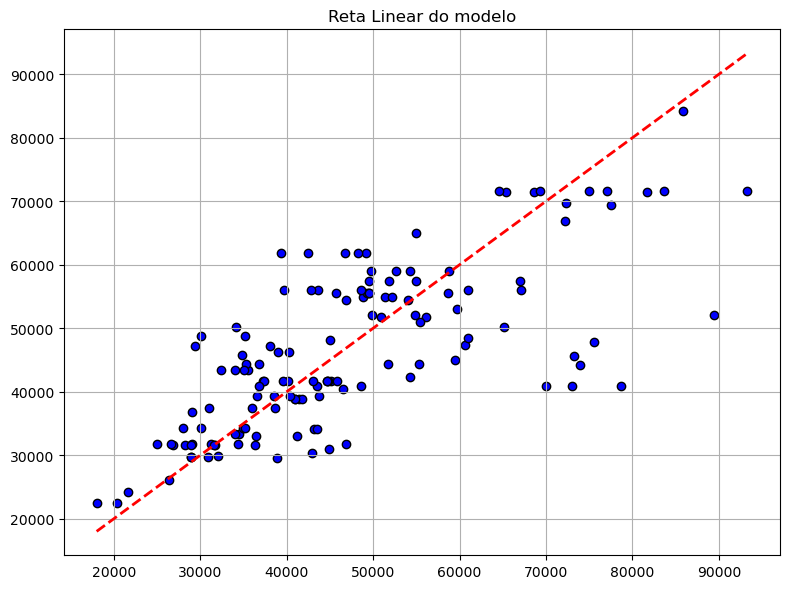

In [319]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_teste3, Y_previsto_sm_novo3, color='blue', edgecolors='k')
plt.plot([Y_teste3.min(), Y_teste3.max()], [Y_teste3.min(), Y_teste3.max()], 'r--', lw=2)
plt.xlabel("")
plt.ylabel("")
plt.title("Reta Linear do modelo")
plt.grid(True)
plt.tight_layout()
plt.show()

### Não é um modelo tão acertivo ainda, vamos construir mais um modelo com novas variáveis e removendo alguns outliers

<AxesSubplot:>

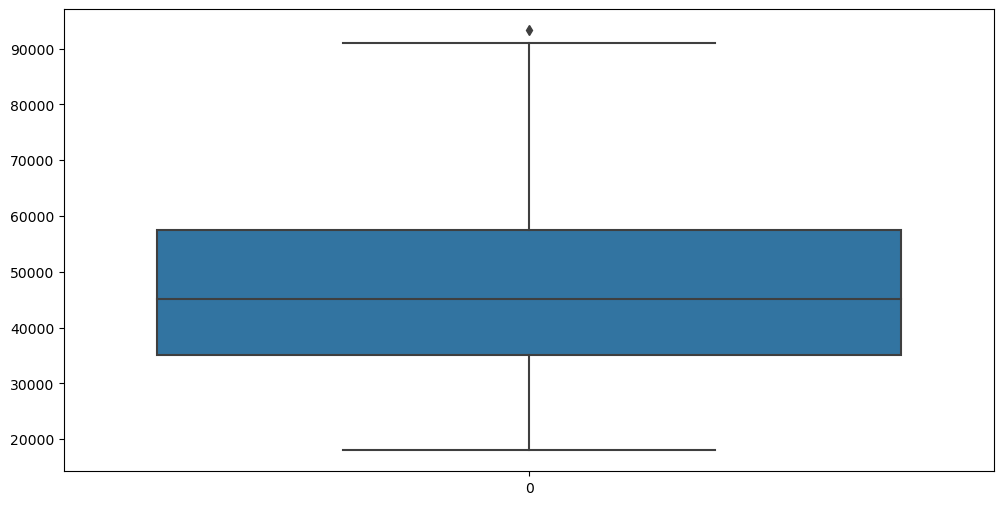

In [320]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_modelo2["price"]) #Visualizando outliers na variável "price"

In [321]:
formula_price = df_modelo2["price"].quantile(0.75) + (1.5 * (df_modelo2["price"].quantile(0.75) - df_modelo2["price"].quantile(0.25)))

In [322]:
outlier_price = df_modelo2["price"] > formula_price

In [323]:
df_modelo2.loc[outlier_price, "price"]

873    93303.0
Name: price, dtype: float64

In [324]:
df_modelo2.drop(873, inplace=True)
df.drop(873,inplace=True) #Removendo outlier

<AxesSubplot:>

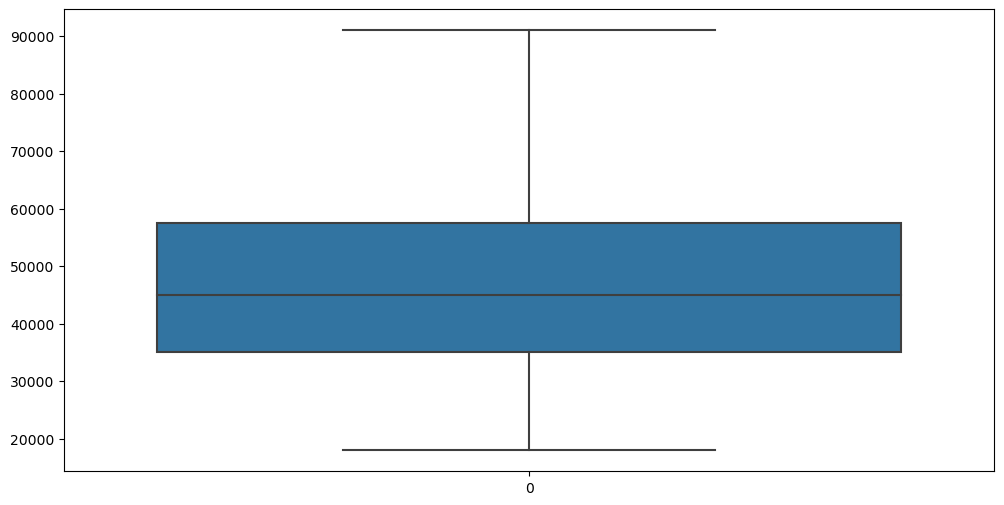

In [325]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_modelo2["price"]) #Verificando a existencia de mais outliers depois da remoção

<AxesSubplot:>

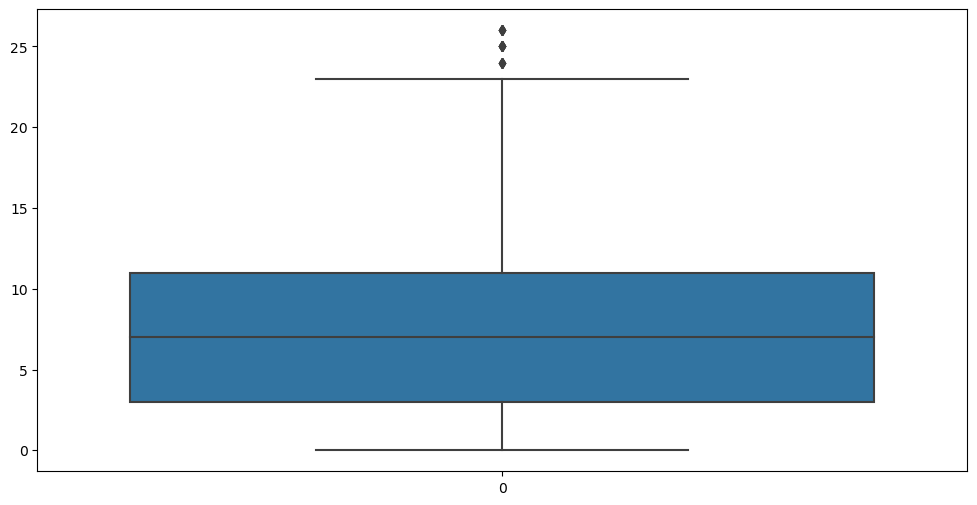

In [326]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_modelo2["mileage"]) #Visualizando outliers na variável "mileage"

In [327]:
formula_mileage = df_modelo2["mileage"].quantile(0.75) + (1.5 * (df_modelo2["mileage"].quantile(0.75) - df_modelo2["mileage"].quantile(0.25)))

In [328]:
outlier_mileage = df_modelo2["mileage"] > formula_mileage

In [329]:
remover_mileage = df_modelo2.loc[outlier_mileage, "mileage"].index

In [330]:
df_modelo2.drop(remover_mileage,inplace=True)
df.drop(remover_mileage,inplace=True)

<AxesSubplot:>

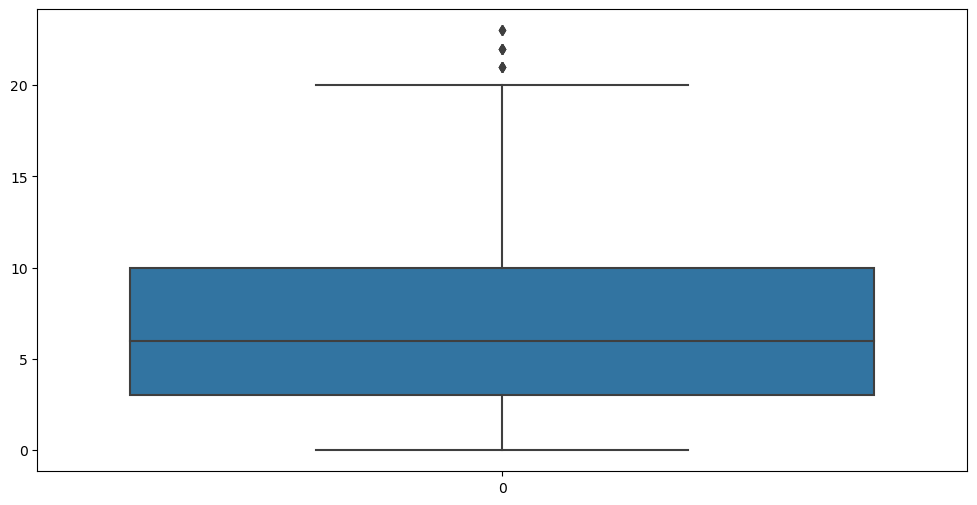

In [331]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_modelo2["mileage"]) #Verificando a existencia de mais outliers depois da remoção

In [332]:
formula_mileage = df_modelo2["mileage"].quantile(0.75) + (1.5 * (df_modelo2["mileage"].quantile(0.75) - df_modelo2["mileage"].quantile(0.25)))

In [333]:
outlier_mileage = df_modelo2["mileage"] > formula_mileage

In [334]:
remover_mileage = df_modelo2.loc[outlier_mileage, "mileage"].index

In [335]:
df_modelo2.drop(remover_mileage,inplace=True)
df.drop(remover_mileage,inplace=True)

<AxesSubplot:>

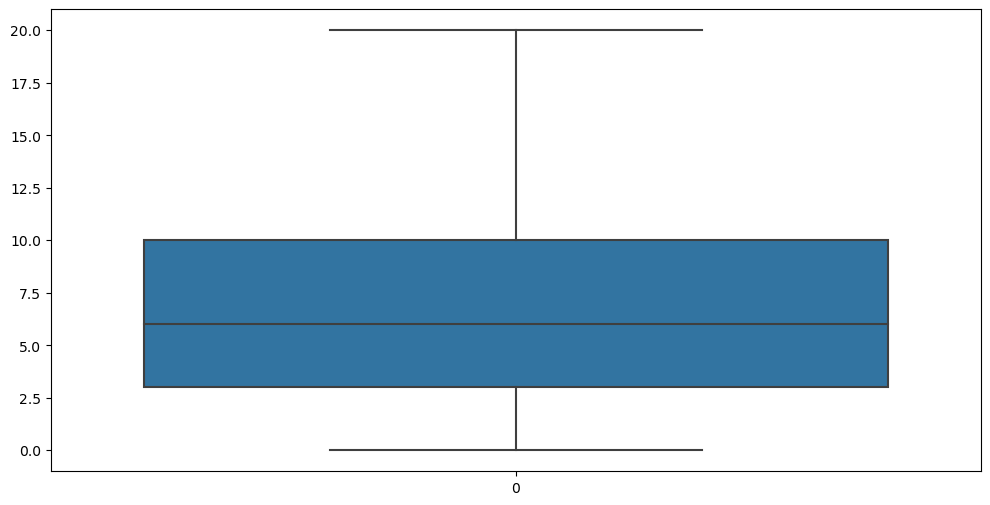

In [336]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_modelo2["mileage"])

### Transformando novas variáveis para One Hot Enconding

In [337]:
categorias_exterior_color = df["exterior_color"].value_counts()
limiar_exterior_color = 17
categorias_frequentes_exterior_color = categorias_exterior_color[categorias_exterior_color >= limiar_exterior_color].index
df["exterior_color group"] = np.where(df["exterior_color"].isin(categorias_frequentes_exterior_color),df["exterior_color"],"Outros")

In [338]:
categorias_interior_color = df["interior_color"].value_counts()
limiar_interior_color = 30
categorias_frequentes_interior_color = categorias_interior_color[categorias_interior_color > limiar_interior_color].index
df["interior_color group"] = np.where(df["interior_color"].isin(categorias_frequentes_interior_color),df["interior_color"],"Outros")

In [339]:
df_modelo2 = pd.get_dummies(df, columns=["fuel","drivetrain","body group","transmission group","trim group",
                            "engine group","make group","exterior_color group","interior_color group"], 
                            prefix=["fue","drive","bodyg","transmissiong","trimg","engineg",
                            "makeg","exteriorg","interiorg"], drop_first=True)

In [340]:
df_modelo2.drop(columns=["name","make","model","engine","transmission","trim","body","exterior_color",
                         "interior_color","mileage interval"],inplace=True)

## 9° Modelo

In [341]:
Y = df_modelo2["price"]
X = df_modelo2.drop(columns=["price"])

In [342]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)

In [343]:
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)

In [344]:
modelo_sm_novo4 = sm.OLS(Y_treino, X_treino_const).fit()

In [345]:
print(modelo_sm_novo4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     23.90
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           6.32e-93
Time:                        23:12:39   Log-Likelihood:                -5470.3
No. Observations:                 520   AIC:                         1.103e+04
Df Residuals:                     476   BIC:                         1.122e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

## 10° Modelo

In [346]:
variaveis_remover3 = pd.DataFrame(modelo_sm_novo4.pvalues > 0.05)

In [347]:
variaveis_remover3.rename(columns={0:"Remover"},inplace=True)

In [348]:
remover_modelo_sm_novo4 = variaveis_remover3[variaveis_remover3["Remover"]].index

In [349]:
X.drop(columns=remover_modelo_sm_novo4,inplace=True)

In [350]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)

In [351]:
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)

In [352]:
modelo_sm_novo5 = sm.OLS(Y_treino, X_treino_const).fit()

In [353]:
print(modelo_sm_novo5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     38.01
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.96e-96
Time:                        23:12:54   Log-Likelihood:                -5497.7
No. Observations:                 520   AIC:                         1.105e+04
Df Residuals:                     495   BIC:                         1.115e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [354]:
modelo_sk_novo4 = LinearRegression()

In [355]:
modelo_sk_novo4.fit(X_treino,Y_treino)

LinearRegression()

In [356]:
modelo_sk_novo4.score(X_treino,Y_treino)

0.6482630752543121

In [357]:
modelo_sk_novo4.score(X_teste,Y_teste)

0.6626683133592423

## 11° Modelo

In [358]:
variaveis_remover4 = pd.DataFrame(modelo_sm_novo5.pvalues > 0.05)
variaveis_remover4.rename(columns={0:"Remover"},inplace=True)
remover_modelo_sm_novo5 = variaveis_remover4[variaveis_remover4["Remover"]].index
X.drop(columns=remover_modelo_sm_novo5,inplace=True)

In [359]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)
modelo_sm_novo6 = sm.OLS(Y_treino, X_treino_const).fit()

In [360]:
print(modelo_sm_novo6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     39.61
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           7.89e-97
Time:                        23:13:16   Log-Likelihood:                -5498.3
No. Observations:                 520   AIC:                         1.104e+04
Df Residuals:                     496   BIC:                         1.115e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [361]:
modelo_sk_novo5 = LinearRegression()
modelo_sk_novo5.fit(X_treino,Y_treino)

LinearRegression()

In [362]:
modelo_sk_novo5.score(X_teste,Y_teste)

0.6632207002651562

## Avaliando o 11° Modelo

In [363]:
Y_previsto_sk_novo5 = modelo_sk_novo5.predict(X_teste)
Y_previsto_sm_novo6 = modelo_sm_novo6.predict(X_teste_const)

In [364]:
mean_squared_error(Y_teste, Y_previsto_sk_novo5) #Soma do quadrado dos erros

90496658.70431656

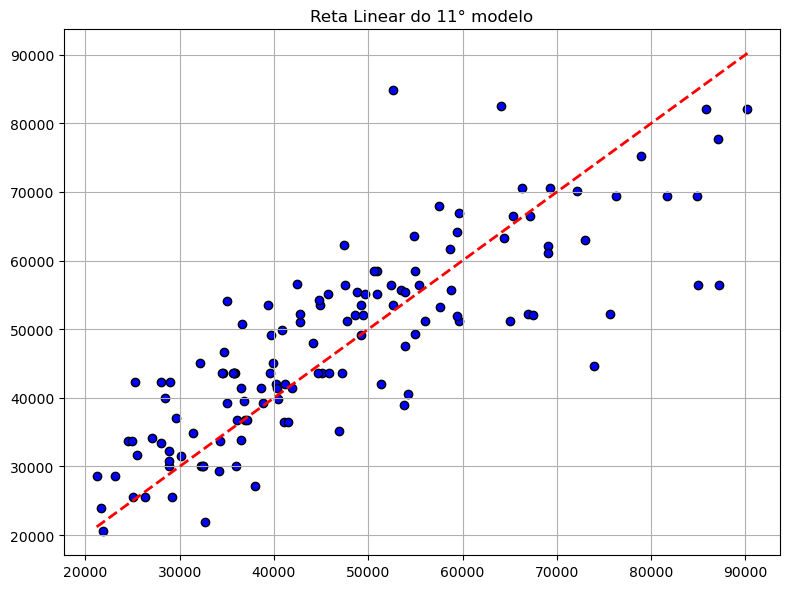

In [365]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_teste, Y_previsto_sk_novo5, color='blue', edgecolors='k')
plt.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'r--', lw=2)
plt.xlabel("")
plt.ylabel("")
plt.title("Reta Linear do 11° modelo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [366]:
residuos = pd.DataFrame({"Y observado":Y_teste, "Y estimado": Y_previsto_sk_novo5})

In [367]:
residuos["Residuo"] = (residuos["Y observado"] - residuos["Y estimado"]) 

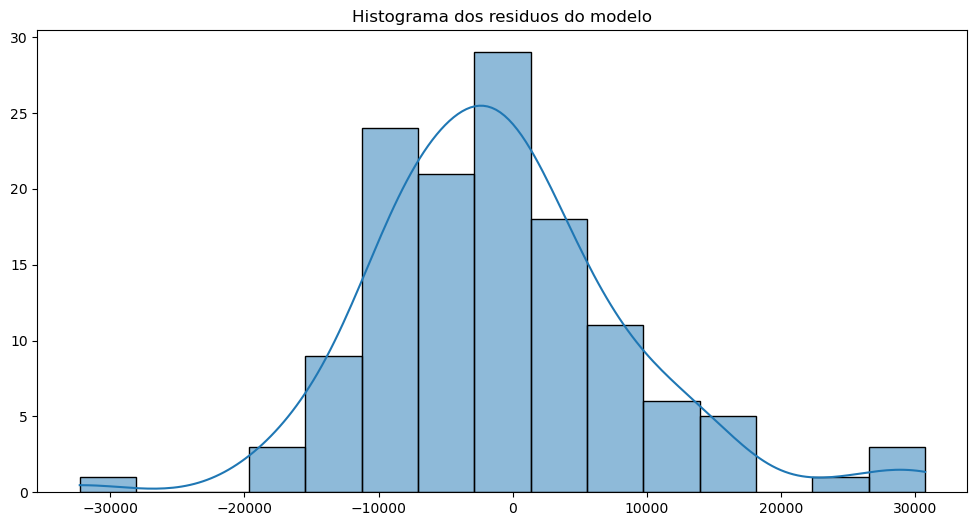

In [368]:
plt.figure(figsize=(12,6))
sns.histplot(x=residuos["Residuo"],kde=True)
plt.xlabel("")
plt.ylabel("")
plt.title("Histograma dos residuos do modelo")
plt.show()

In [369]:
teste_residuo = shapiro(residuos["Residuo"])
if teste_residuo.pvalue > 0.05:
    print(f"Os residuos seguem uma normalidade")
else:
    print("Os residuos não seguem uma normalidade")

Os residuos não seguem uma normalidade


### Calculando o VIF para encontramos multicolinearidade

In [370]:
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["feature"] = X_const.columns

In [371]:
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(len(X_const.columns))]

In [372]:
vif

,feature,VIF
0,const,8.757258e+07
1,year,1.172141e+00
2,cylinders,1.813809e+00
3,fue_Gasoline,4.204525e+00
4,fue_Hybrid,4.212634e+00
5,drive_Front-wheel Drive,1.516085e+00
6,drive_Rear-wheel Drive,1.238322e+00
7,bodyg_Pickup Truck,2.077434e+00
8,bodyg_Sedan,1.325545e+00
9,transmissiong_6-Speed Automatic,2.279660e+00


### Encontramos uma variável que pode estar representando multicolinearidade: "exteriorg_Outros"

In [373]:
X.drop(columns = "exteriorg_Outros",inplace = True) # Removendo essa variável

## 12° Modelo

In [374]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)
modelo_sm_novo7 = sm.OLS(Y_treino, X_treino_const).fit()

In [375]:
print(modelo_sm_novo7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     39.89
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           5.82e-95
Time:                        23:13:37   Log-Likelihood:                -5504.9
No. Observations:                 520   AIC:                         1.106e+04
Df Residuals:                     497   BIC:                         1.115e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## 13° Modelo

In [376]:
variaveis_remover5 = pd.DataFrame(modelo_sm_novo7.pvalues > 0.05)
variaveis_remover5.rename(columns={0:"Remover"},inplace=True)
remover_modelo_sm_novo6 = variaveis_remover5[variaveis_remover5["Remover"]].index

In [377]:
X.drop(columns=remover_modelo_sm_novo6,inplace=True)

In [378]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)
modelo_sm_novo8 = sm.OLS(Y_treino, X_treino_const).fit()

In [379]:
print(modelo_sm_novo8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     48.48
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.25e-97
Time:                        23:13:45   Log-Likelihood:                -5507.1
No. Observations:                 520   AIC:                         1.105e+04
Df Residuals:                     501   BIC:                         1.113e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## 14° Modelo

In [380]:
X.drop(columns = "bodyg_Sedan",inplace=True) # Removendo variável que não aceitou o modelo

In [381]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.20, random_state=42)
X_treino_const = sm.add_constant(X_treino)
X_teste_const = sm.add_constant(X_teste)
modelo_sm_novo9 = sm.OLS(Y_treino, X_treino_const).fit()

In [382]:
modelo_sk_novo6 = LinearRegression()
modelo_sk_novo6.fit(X_treino,Y_treino)

LinearRegression()

In [383]:
modelo_sk_novo6.score(X_teste,Y_teste) #R2 nos dados de teste, podemos ver que não ocorreu overfitting

0.6673836682581679

In [384]:
print(modelo_sm_novo9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     50.82
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.99e-97
Time:                        23:14:04   Log-Likelihood:                -5509.1
No. Observations:                 520   AIC:                         1.105e+04
Df Residuals:                     502   BIC:                         1.113e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Checando multicolinearidade

In [385]:
X_const2 = sm.add_constant(X)
vif2 = pd.DataFrame()
vif2["feature"] = X_const2.columns 
vif2["VIF"] = [variance_inflation_factor(X_const2.values, i) for i in range(len(X_const2.columns))]

In [386]:
vif2

,feature,VIF
0,const,8.428565e+07
1,year,1.128190e+00
2,cylinders,1.679089e+00
3,fue_Gasoline,4.140026e+00
4,fue_Hybrid,4.165459e+00
5,drive_Front-wheel Drive,1.334133e+00
6,drive_Rear-wheel Drive,1.178966e+00
7,bodyg_Pickup Truck,1.954439e+00
8,transmissiong_6-Speed Automatic,2.243186e+00
9,transmissiong_8-Speed Automatic,2.506909e+00


### Avaliando nosso 14° Modelo

In [387]:
Y_previsto_sm_novo9 = modelo_sm_novo9.predict(X_teste_const) # Fazendo as previsões
Y_previsto_sk_novo6 = modelo_sk_novo6.predict(X_teste)

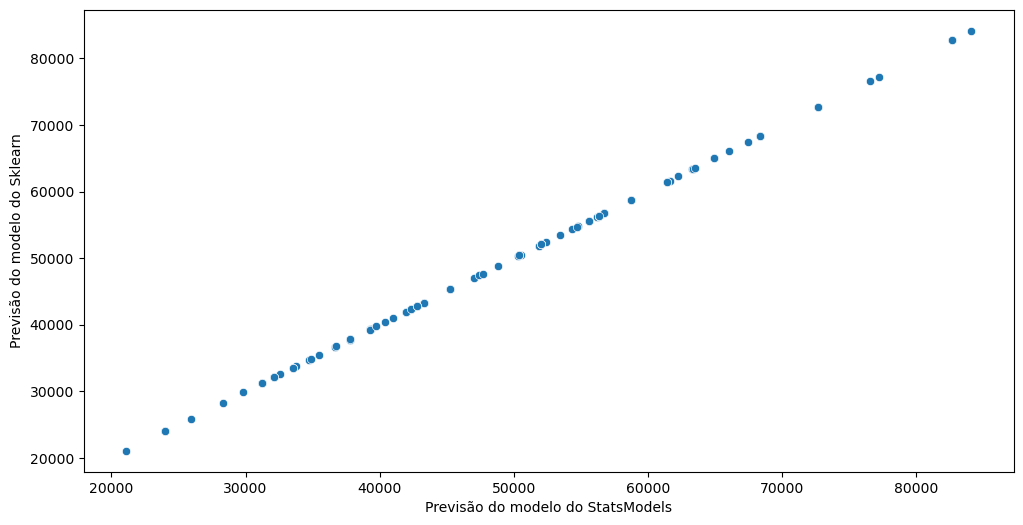

In [389]:
#Comparando a previsão dos dois modelo
plt.figure(figsize=(12,6))
sns.scatterplot(x=Y_previsto_sm_novo9,y=Y_previsto_sk_novo6)
plt.xlabel("Previsão do modelo do StatsModels")
plt.ylabel("Previsão do modelo do Sklearn")
plt.show()

### Avaliando com os dados de teste

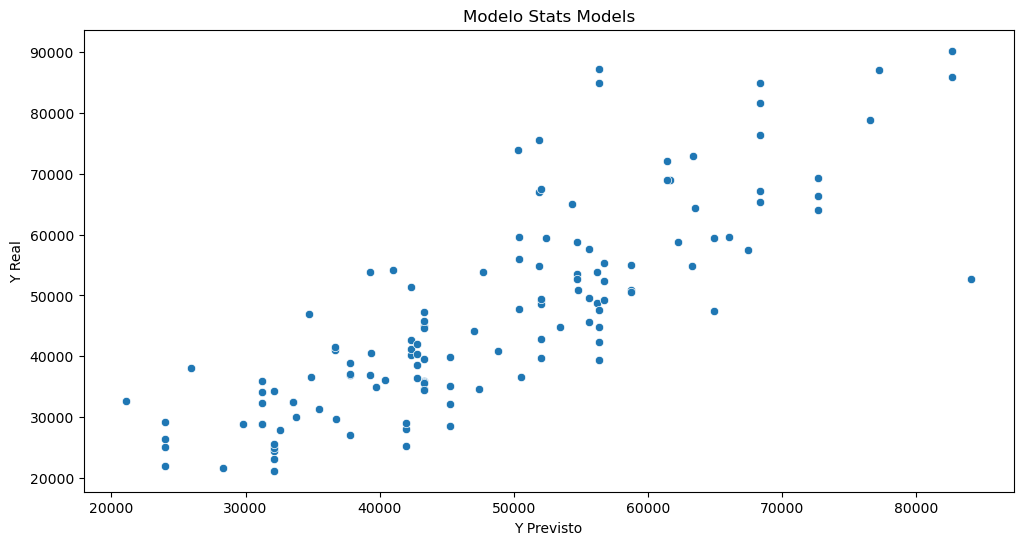

In [393]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=Y_previsto_sm_novo9,y=Y_teste)
plt.xlabel("Y Previsto")
plt.ylabel("Y Real")
plt.title("Modelo Stats Models")
plt.show()

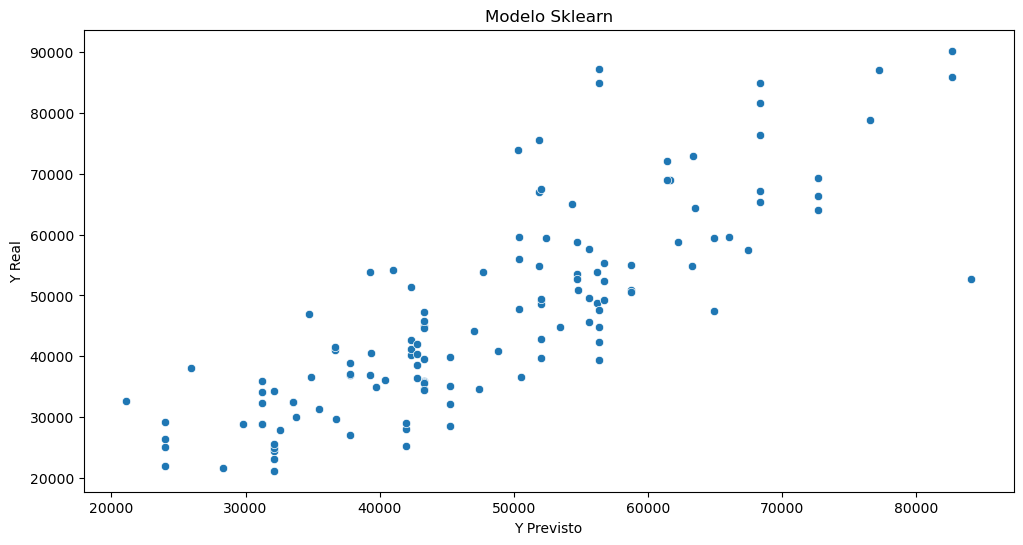

In [394]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=Y_previsto_sk_novo6,y=Y_teste)
plt.xlabel("Y Previsto")
plt.ylabel("Y Real")
plt.title("Modelo Sklearn")
plt.show()

In [396]:
# Calculando o SQE (Soma do quadrado dos erros)
print(mean_squared_error(Y_teste,Y_previsto_sk_novo6)) # Sklearn
print(mean_squared_error(Y_teste,Y_previsto_sm_novo9)) # StatsModels

89378019.00776398
89378019.00754675


In [403]:
# Calculando os residuos do modelo
residuos1 = pd.DataFrame()
residuos1["Y observado"] = Y_teste
residuos1["Y estimado Sklearn"] = Y_previsto_sk_novo6
residuos1["Y estimado Stats Models"] = Y_previsto_sm_novo9

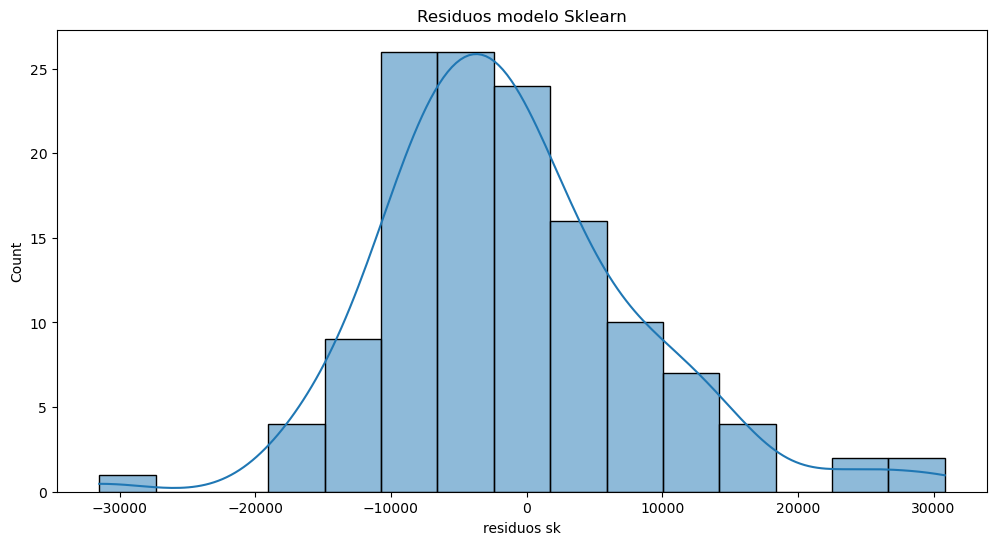

In [404]:
# Residuos Modelo Sklearn
residuos1["residuos sk"] = residuos1["Y observado"] - residuos1["Y estimado Sklearn"]
plt.figure(figsize=(12,6))
sns.histplot(x=residuos1["residuos sk"], kde = True)
plt.title("Residuos modelo Sklearn")
plt.show()

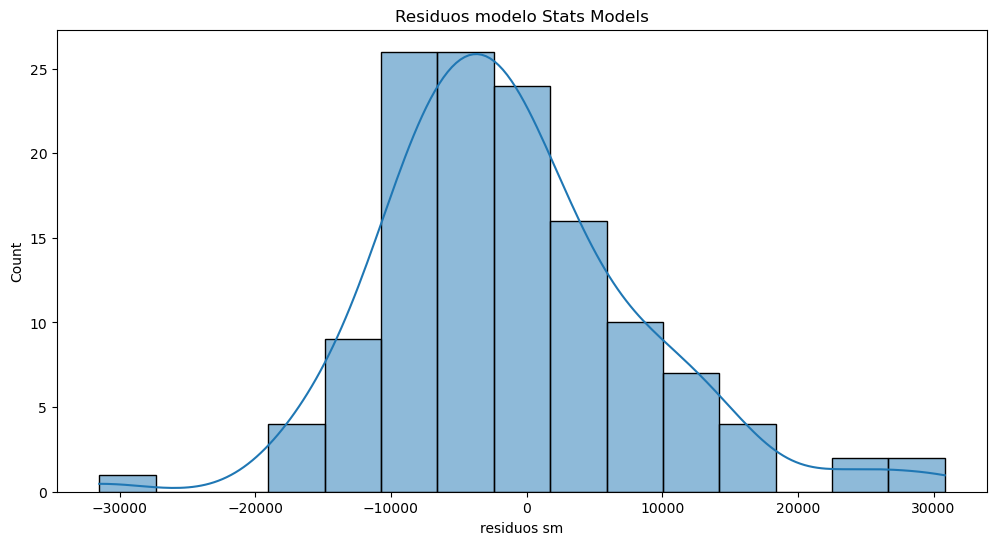

In [405]:
# Residuos Modelo StatsModels
residuos1["residuos sm"] = residuos1["Y observado"] - residuos1["Y estimado Stats Models"]
plt.figure(figsize=(12,6))
sns.histplot(x=residuos1["residuos sm"], kde = True)
plt.title("Residuos modelo Stats Models")
plt.show()

In [408]:
teste_sk = shapiro(residuos1["residuos sk"])
teste_sm = shapiro(residuos1["residuos sm"])

0.0007664342992939055

In [407]:
if teste_sk.pvalue < 0.05 and teste_sm.pvalue < 0.05:
    print(f"Os residuos não seguem uma normalidade")

Os residuos não seguem uma normalidade


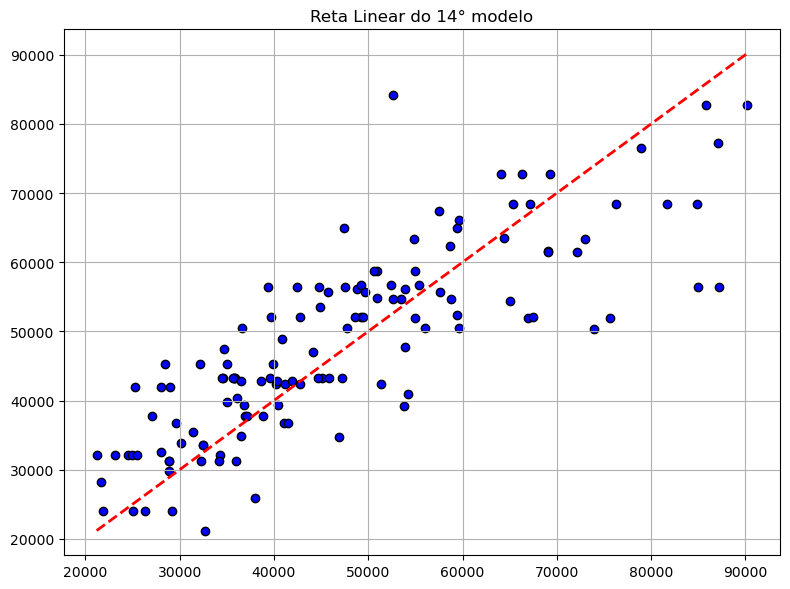

In [409]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_teste, Y_previsto_sk_novo6, color='blue', edgecolors='k')
plt.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'r--', lw=2)
plt.xlabel("")
plt.ylabel("")
plt.title("Reta Linear do 14° modelo")
plt.grid(True)
plt.tight_layout()
plt.show()